In [1]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

## Import Data

In [2]:
data = pd.read_csv("breast-cancer.csv")
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

## Pre Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Checking for missing values
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

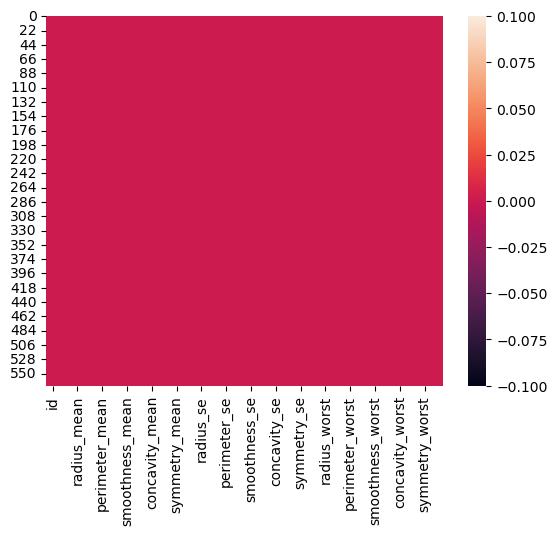

In [5]:
sns.heatmap(data.isnull())

In [6]:
#Check duplicated
sum(data.duplicated())

0

In [7]:
duplicates=data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]


In [8]:
data.drop(['id'],axis=1,inplace=True)
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [9]:
data.shape

(569, 31)

In [10]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
# Membuat mapping
mapping = {'M': 0, 'B': 1}

# Mengonversi variabel kategorik menjadi numerik
data['diagnosis'] = data['diagnosis'].map(mapping)

In [12]:
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            0        17.99         10.38          122.80     1001.0   
1            0        20.57         17.77          132.90     1326.0   
2            0        19.69         21.25          130.00     1203.0   
3            0        11.42         20.38           77.58      386.1   
4            0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          0        21.56         22.39          142.00     1479.0   
565          0        20.13         28.25          131.20     1261.0   
566          0        16.60         28.08          108.30      858.1   
567          0        20.60         29.33          140.10     1265.0   
568          1         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

## Feature Selection

In [13]:
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, f_regression, mutual_info_regression, RFE
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

In [14]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

In [16]:
# 1. SelectKBest with f_classif
selector_f = SelectKBest(score_func=f_classif, k=10)
X_f = selector_f.fit_transform(X, y)
selected_features_f = X.columns[selector_f.get_support(indices=True)].tolist()

data_f = pd.DataFrame(X_f, columns=selected_features_f)
data_f['diagnosis'] = y
data_f

radius_mean  perimeter_mean  area_mean  concavity_mean  \
0          17.99          122.80     1001.0         0.30010   
1          20.57          132.90     1326.0         0.08690   
2          19.69          130.00     1203.0         0.19740   
3          11.42           77.58      386.1         0.24140   
4          20.29          135.10     1297.0         0.19800   
..           ...             ...        ...             ...   
564        21.56          142.00     1479.0         0.24390   
565        20.13          131.20     1261.0         0.14400   
566        16.60          108.30      858.1         0.09251   
567        20.60          140.10     1265.0         0.35140   
568         7.76           47.92      181.0         0.00000   

     concave points_mean  radius_worst  perimeter_worst  area_worst  \
0                0.14710        25.380           184.60      2019.0   
1                0.07017        24.990           158.80      1956.0   
2                0.12790        23.570           152.50      1709.0   
3                0.10520        14.910            98.87       567.7   
4                0.10430        22.540           152.20      1575.0   
..                   ...           ...              ...         ...   
564              0.13890        25.450           166.10      2027.0   
565              0.09791        23.690           155.00      1731.0   
566              0.05302        18.980           126.70      1124.0   
567              0.15200        25.740           184.60      1821.0   
568              0.00000         9.456            59.16       268.6   

     concavity_worst  concave points_worst  diagnosis  
0             0.7119                0.2654          0  
1             0.2416                0.1860          0  
2             0.4504                0.2430          0  
3             0.6869                0.2575          0  
4             0.4000                0.1625          0  
..               ...                   ...        ...  
564           0.4107                0.2216          0  
565           0.3215                0.1628          0  
566           0.3403                0.1418          0  
567           0.9387                0.2650          0  
568           0.0000                0.0000          1  

[569 rows x 11 columns]

In [17]:
# 2. SelectKBest with mutual_info_classif
selector_mutual_info = SelectKBest(score_func=mutual_info_classif, k=10)
X_mutual_info = selector_mutual_info.fit_transform(X, y)
selected_features_mutual_info = X.columns[selector_mutual_info.get_support(indices=True)].tolist()

data_mutual_info = pd.DataFrame(X_mutual_info, columns=selected_features_mutual_info)
data_mutual_info['diagnosis'] = y
data_mutual_info

radius_mean  perimeter_mean  area_mean  concavity_mean  \
0          17.99          122.80     1001.0         0.30010   
1          20.57          132.90     1326.0         0.08690   
2          19.69          130.00     1203.0         0.19740   
3          11.42           77.58      386.1         0.24140   
4          20.29          135.10     1297.0         0.19800   
..           ...             ...        ...             ...   
564        21.56          142.00     1479.0         0.24390   
565        20.13          131.20     1261.0         0.14400   
566        16.60          108.30      858.1         0.09251   
567        20.60          140.10     1265.0         0.35140   
568         7.76           47.92      181.0         0.00000   

     concave points_mean  area_se  radius_worst  perimeter_worst  area_worst  \
0                0.14710   153.40        25.380           184.60      2019.0   
1                0.07017    74.08        24.990           158.80      1956.0   
2                0.12790    94.03        23.570           152.50      1709.0   
3                0.10520    27.23        14.910            98.87       567.7   
4                0.10430    94.44        22.540           152.20      1575.0   
..                   ...      ...           ...              ...         ...   
564              0.13890   158.70        25.450           166.10      2027.0   
565              0.09791    99.04        23.690           155.00      1731.0   
566              0.05302    48.55        18.980           126.70      1124.0   
567              0.15200    86.22        25.740           184.60      1821.0   
568              0.00000    19.15         9.456            59.16       268.6   

     concave points_worst  diagnosis  
0                  0.2654          0  
1                  0.1860          0  
2                  0.2430          0  
3                  0.2575          0  
4                  0.1625          0  
..                    ...        ...  
564                0.2216          0  
565                0.1628          0  
566                0.1418          0  
567                0.2650          0  
568                0.0000          1  

[569 rows x 11 columns]

In [18]:
# 3. RFE with Logistic Regression
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.get_support(indices=True)].tolist()

df_rfe = pd.DataFrame(X_rfe, columns=selected_features_rfe)
df_rfe['diagnosis'] = y
df_rfe

radius_mean  compactness_mean  concavity_mean  texture_se  radius_worst  \
0          17.99           0.27760         0.30010      0.9053        25.380   
1          20.57           0.07864         0.08690      0.7339        24.990   
2          19.69           0.15990         0.19740      0.7869        23.570   
3          11.42           0.28390         0.24140      1.1560        14.910   
4          20.29           0.13280         0.19800      0.7813        22.540   
..           ...               ...             ...         ...           ...   
564        21.56           0.11590         0.24390      1.2560        25.450   
565        20.13           0.10340         0.14400      2.4630        23.690   
566        16.60           0.10230         0.09251      1.0750        18.980   
567        20.60           0.27700         0.35140      1.5950        25.740   
568         7.76           0.04362         0.00000      1.4280         9.456   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  diagnosis  
0                  0.2654          0.4601          0  
1                  0.1860          0.2750          0  
2                  0.2430          0.3613          0  
3                  0.2575          0.6638          0  
4                  0.1625          0.2364          0  
..                    ...             ...        ...  
564                0.2216          0.2060          0  
565                0.1628          0.2572          0  
566                0.1418          0.2218          0  
567                0.2650          0.4087          0  
568                0.0000          0.2871          1  

[569 rows x 11 columns]

In [19]:
# 4. Feature importance from Random Forest
forest = RandomForestClassifier()
forest.fit(X, y)
importances_rf = forest.feature_importances_
indices_rf = importances_rf.argsort()[-10:][::-1]
selected_features_rf = X.columns[indices_rf].tolist()

X_rf = X.iloc[:, indices_rf]
data_rf = pd.DataFrame(X_rf, columns=selected_features_rf)
data_rf['diagnosis'] = y
data_rf

radius_worst  concave points_worst  concave points_mean  area_worst  \
0          25.380                0.2654              0.14710      2019.0   
1          24.990                0.1860              0.07017      1956.0   
2          23.570                0.2430              0.12790      1709.0   
3          14.910                0.2575              0.10520       567.7   
4          22.540                0.1625              0.10430      1575.0   
..            ...                   ...                  ...         ...   
564        25.450                0.2216              0.13890      2027.0   
565        23.690                0.1628              0.09791      1731.0   
566        18.980                0.1418              0.05302      1124.0   
567        25.740                0.2650              0.15200      1821.0   
568         9.456                0.0000              0.00000       268.6   

     perimeter_worst  area_mean  concavity_mean  area_se  concavity_worst  \
0             184.60     1001.0         0.30010   153.40           0.7119   
1             158.80     1326.0         0.08690    74.08           0.2416   
2             152.50     1203.0         0.19740    94.03           0.4504   
3              98.87      386.1         0.24140    27.23           0.6869   
4             152.20     1297.0         0.19800    94.44           0.4000   
..               ...        ...             ...      ...              ...   
564           166.10     1479.0         0.24390   158.70           0.4107   
565           155.00     1261.0         0.14400    99.04           0.3215   
566           126.70      858.1         0.09251    48.55           0.3403   
567           184.60     1265.0         0.35140    86.22           0.9387   
568            59.16      181.0         0.00000    19.15           0.0000   

     radius_mean  diagnosis  
0          17.99          0  
1          20.57          0  
2          19.69          0  
3          11.42          0  
4          20.29          0  
..           ...        ...  
564        21.56          0  
565        20.13          0  
566        16.60          0  
567        20.60          0  
568         7.76          1  

[569 rows x 11 columns]

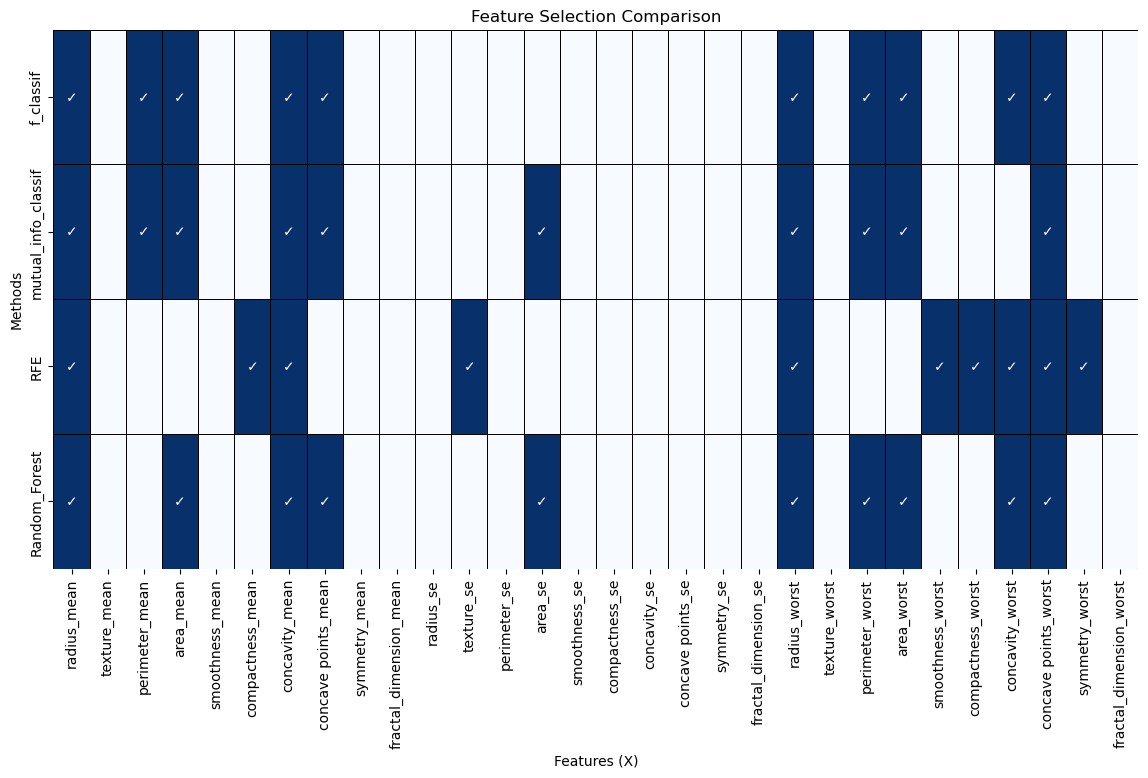

In [20]:
# All features
all_features = data.drop(['diagnosis'],axis=1).columns.tolist()

# Initialize comparison DataFrame
comparison_data = pd.DataFrame(columns=all_features, index=['f_classif', 'mutual_info_classif', 'RFE', 'Random_Forest'])

# Mark selected features
comparison_data.loc['f_classif', selected_features_f] = '✓'
comparison_data.loc['mutual_info_classif', selected_features_mutual_info] = '✓'
comparison_data.loc['RFE', selected_features_rfe] = '✓'
comparison_data.loc['Random_Forest', selected_features_rf] = '✓'

# Fill NaN with empty string
comparison_data = comparison_data.fillna('')

# Display the DataFrame
plt.figure(figsize=(14, 7))

# Draw a heatmap with the mask and correct aspect ratio
sns.heatmap(comparison_data.replace('✓', 1).replace('', 0), annot=comparison_data, fmt='', cmap='Blues', cbar=False, linewidths=.5, linecolor='black')

plt.title('Feature Selection Comparison')
plt.xlabel('Features (X)')
plt.ylabel('Methods')
plt.show()

In [23]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [24]:
df = data[['diagnosis', 'radius_mean', 'perimeter_mean','area_mean','concavity_mean','radius_worst',
          'perimeter_worst', 'area_worst','concavity_worst', 'concave points_worst']]

In [25]:
df

diagnosis  radius_mean  perimeter_mean  area_mean  concavity_mean  \
0            0        17.99          122.80     1001.0         0.30010   
1            0        20.57          132.90     1326.0         0.08690   
2            0        19.69          130.00     1203.0         0.19740   
3            0        11.42           77.58      386.1         0.24140   
4            0        20.29          135.10     1297.0         0.19800   
..         ...          ...             ...        ...             ...   
564          0        21.56          142.00     1479.0         0.24390   
565          0        20.13          131.20     1261.0         0.14400   
566          0        16.60          108.30      858.1         0.09251   
567          0        20.60          140.10     1265.0         0.35140   
568          1         7.76           47.92      181.0         0.00000   

     radius_worst  perimeter_worst  area_worst  concavity_worst  \
0          25.380           184.60      2019.0           0.7119   
1          24.990           158.80      1956.0           0.2416   
2          23.570           152.50      1709.0           0.4504   
3          14.910            98.87       567.7           0.6869   
4          22.540           152.20      1575.0           0.4000   
..            ...              ...         ...              ...   
564        25.450           166.10      2027.0           0.4107   
565        23.690           155.00      1731.0           0.3215   
566        18.980           126.70      1124.0           0.3403   
567        25.740           184.60      1821.0           0.9387   
568         9.456            59.16       268.6           0.0000   

     concave points_worst  
0                  0.2654  
1                  0.1860  
2                  0.2430  
3                  0.2575  
4                  0.1625  
..                    ...  
564                0.2216  
565                0.1628  
566                0.1418  
567                0.2650  
568                0.0000  

[569 rows x 10 columns]

In [26]:
df.describe()

diagnosis  radius_mean  perimeter_mean    area_mean  concavity_mean  \
count  569.000000   569.000000      569.000000   569.000000      569.000000   
mean     0.627417    14.127292       91.969033   654.889104        0.088799   
std      0.483918     3.524049       24.298981   351.914129        0.079720   
min      0.000000     6.981000       43.790000   143.500000        0.000000   
25%      0.000000    11.700000       75.170000   420.300000        0.029560   
50%      1.000000    13.370000       86.240000   551.100000        0.061540   
75%      1.000000    15.780000      104.100000   782.700000        0.130700   
max      1.000000    28.110000      188.500000  2501.000000        0.426800   

       radius_worst  perimeter_worst   area_worst  concavity_worst  \
count    569.000000       569.000000   569.000000       569.000000   
mean      16.269190       107.261213   880.583128         0.272188   
std        4.833242        33.602542   569.356993         0.208624   
min        7.930000        50.410000   185.200000         0.000000   
25%       13.010000        84.110000   515.300000         0.114500   
50%       14.970000        97.660000   686.500000         0.226700   
75%       18.790000       125.400000  1084.000000         0.382900   
max       36.040000       251.200000  4254.000000         1.252000   

       concave points_worst  
count            569.000000  
mean               0.114606  
std                0.065732  
min                0.000000  
25%                0.064930  
50%                0.099930  
75%                0.161400  
max                0.291000

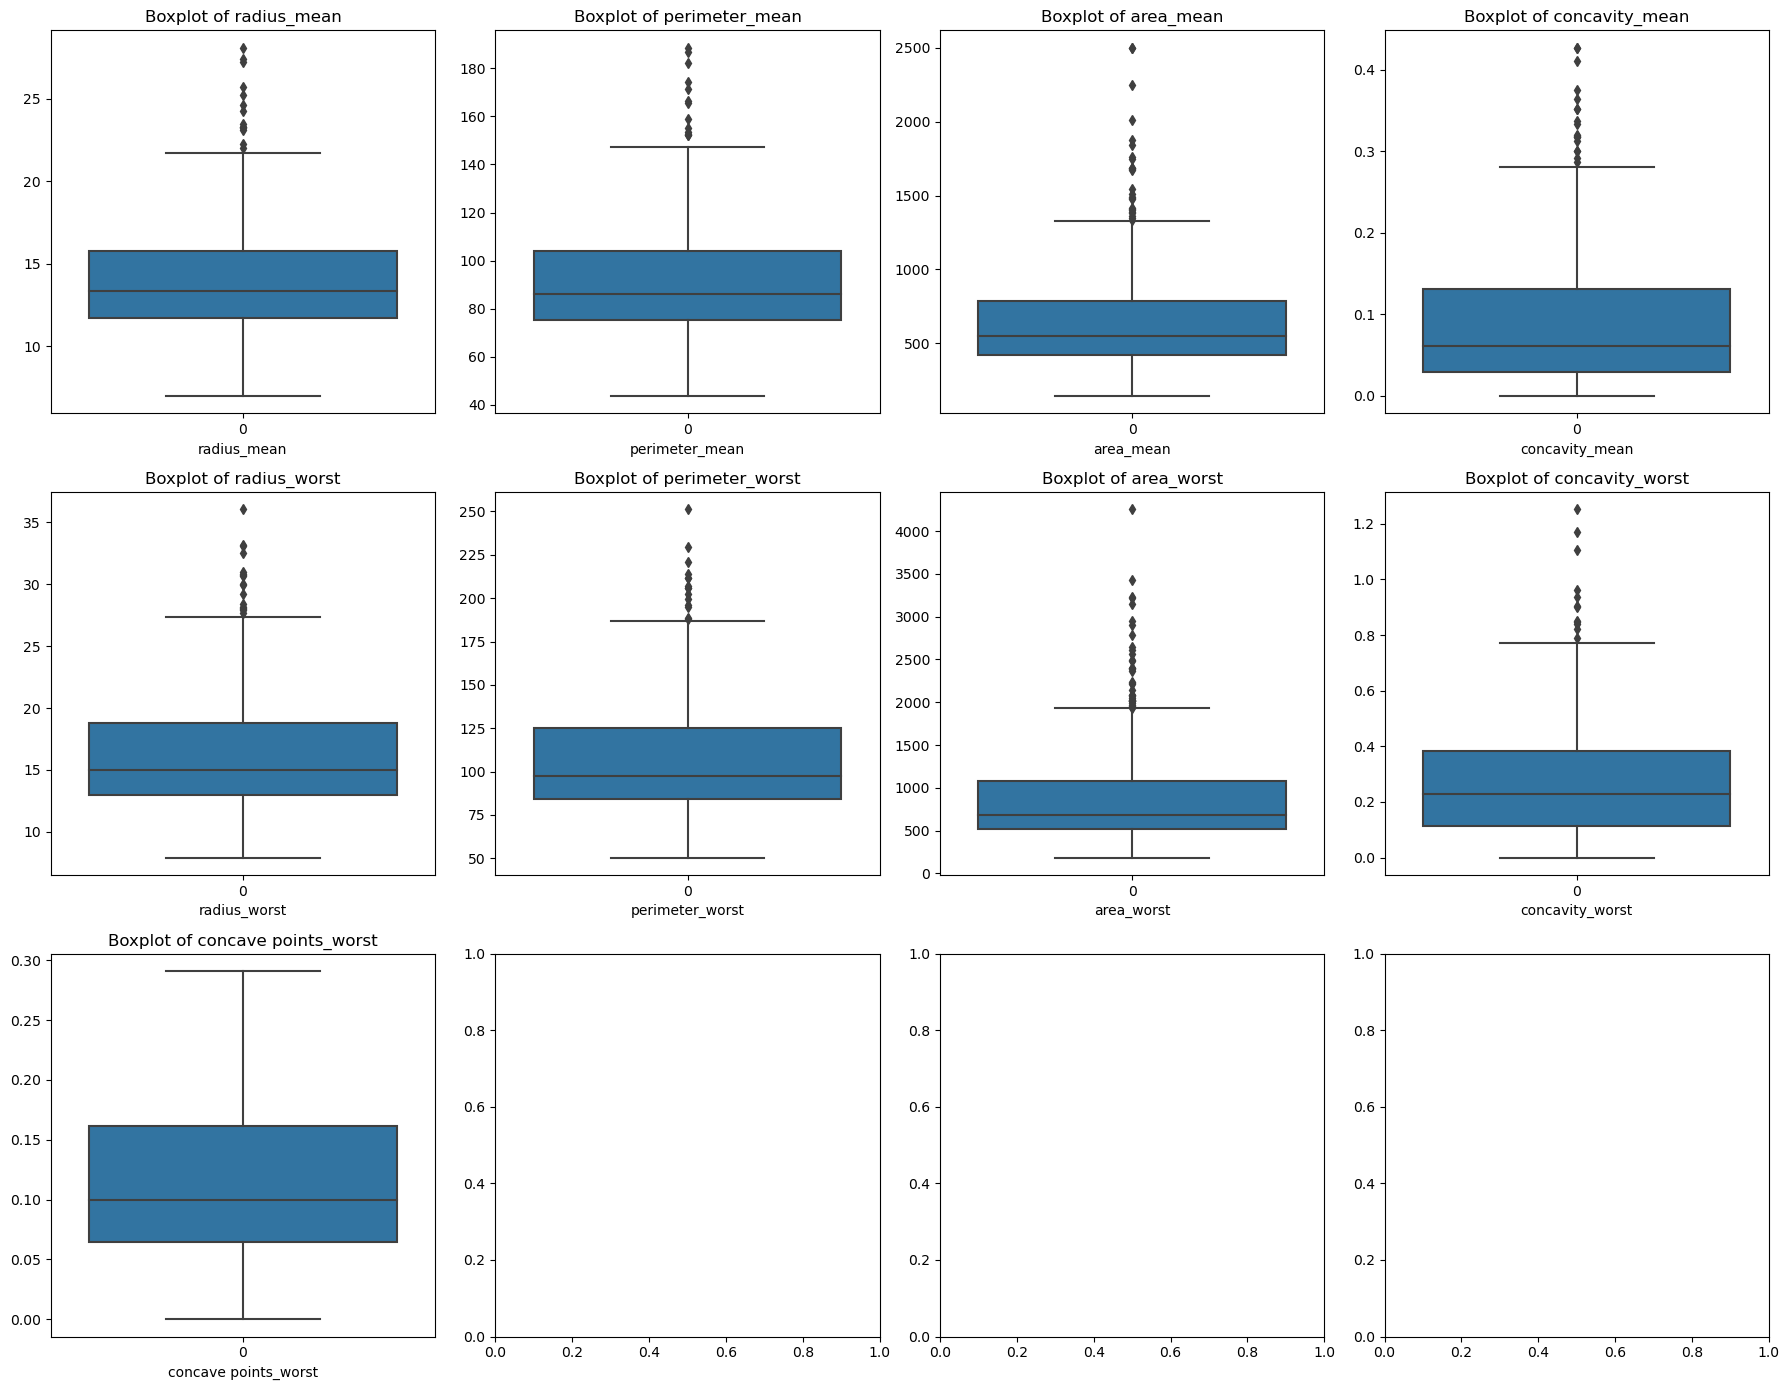

In [27]:
#Checking Outlier
variables = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'radius_worst', 
             'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']

fig, axs = plt.subplots(nrows=len(variables)//4 + 1, ncols=4, figsize=(18,6*len(variables)//4 + 1))

for i, var in enumerate(variables):
    sns.boxplot(df[var], ax=axs[i//4, i%4])
    axs[i//4, i%4].set_xlabel(var)
    axs[i//4, i%4].set_title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

In [28]:
variables = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'radius_worst', 
             'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']

df_clean = df.copy()

for var in variables:
    if var!= 'concave points_worst':
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[~((df_clean[var] < (Q1 - 1.5 * IQR)) | (df_clean[var] > (Q3 + 1.5 * IQR)))]

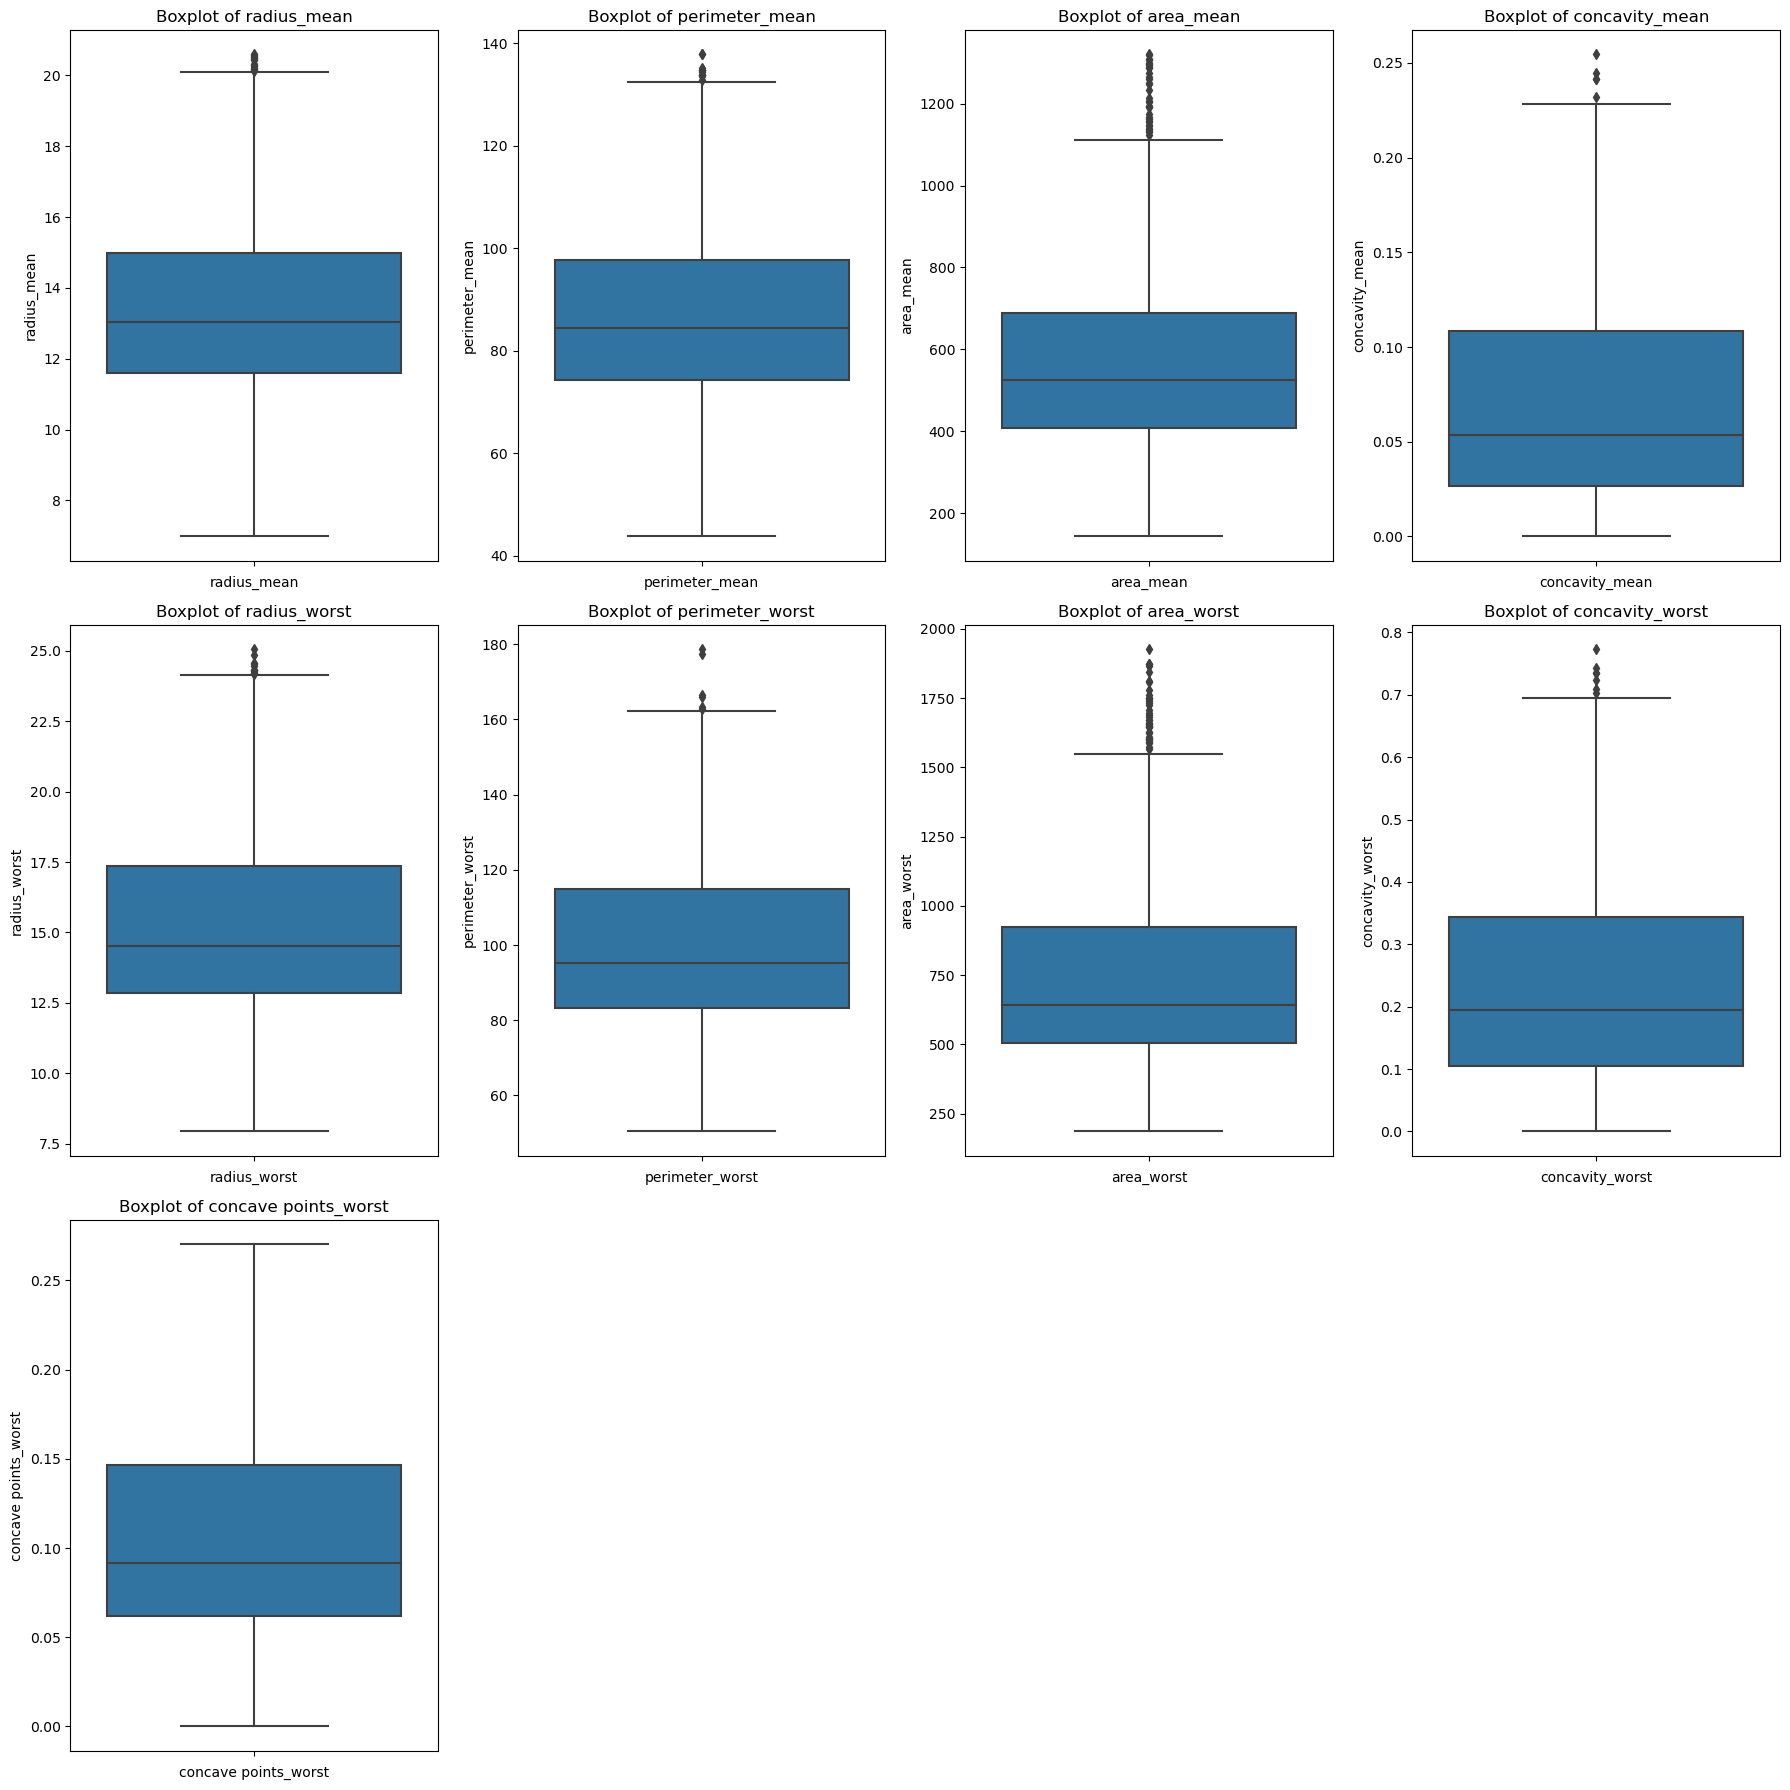

In [29]:
#Checking Outlier after Removal
variables = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 
             'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 
             'concave points_worst']

num_cols = 4
num_rows = (len(variables) + num_cols - 1) // num_cols

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6 * num_rows))
axs = axs.flatten()

# Plot the boxplots
for i, var in enumerate(variables):
    sns.boxplot(y=df_clean[var], ax=axs[i])
    axs[i].set_xlabel(var)
    axs[i].set_title(f'Boxplot of {var}')

# Remove any empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [30]:
df_clean

diagnosis  radius_mean  perimeter_mean  area_mean  concavity_mean  \
2            0        19.69          130.00     1203.0         0.19740   
3            0        11.42           77.58      386.1         0.24140   
4            0        20.29          135.10     1297.0         0.19800   
5            0        12.45           82.57      477.1         0.15780   
6            0        18.25          119.60     1040.0         0.11270   
..         ...          ...             ...        ...             ...   
560          1        14.05           91.38      600.4         0.04462   
561          1        11.20           70.67      386.0         0.00000   
565          0        20.13          131.20     1261.0         0.14400   
566          0        16.60          108.30      858.1         0.09251   
568          1         7.76           47.92      181.0         0.00000   

     radius_worst  perimeter_worst  area_worst  concavity_worst  \
2          23.570           152.50      1709.0           0.4504   
3          14.910            98.87       567.7           0.6869   
4          22.540           152.20      1575.0           0.4000   
5          15.470           103.40       741.6           0.5355   
6          22.880           153.20      1606.0           0.3784   
..            ...              ...         ...              ...   
560        15.300           100.20       706.7           0.1326   
561        11.920            75.19       439.6           0.0000   
565        23.690           155.00      1731.0           0.3215   
566        18.980           126.70      1124.0           0.3403   
568         9.456            59.16       268.6           0.0000   

     concave points_worst  
2                  0.2430  
3                  0.2575  
4                  0.1625  
5                  0.1741  
6                  0.1932  
..                    ...  
560                0.1048  
561                0.0000  
565                0.1628  
566                0.1418  
568                0.0000  

[518 rows x 10 columns]

In [31]:
df_clean.describe()

diagnosis  radius_mean  perimeter_mean    area_mean  concavity_mean  \
count  518.000000   518.000000      518.000000   518.000000      518.000000   
mean     0.683398    13.547141       87.842162   591.361583        0.073477   
std      0.465600     2.856190       19.493206   258.528053        0.059905   
min      0.000000     6.981000       43.790000   143.500000        0.000000   
25%      0.000000    11.600000       74.332500   409.250000        0.026880   
50%      1.000000    13.050000       84.365000   525.800000        0.053725   
75%      1.000000    14.997500       97.620000   690.025000        0.108500   
max      1.000000    20.590000      137.800000  1320.000000        0.254500   

       radius_worst  perimeter_worst   area_worst  concavity_worst  \
count    518.000000       518.000000   518.000000       518.000000   
mean      15.409361       101.135676   769.267761         0.237928   
std        3.767439        25.986679   389.987778         0.171639   
min        7.930000        50.410000   185.200000         0.000000   
25%       12.840000        83.150000   505.750000         0.104925   
50%       14.500000        95.260000   641.550000         0.194500   
75%       17.365000       114.900000   924.525000         0.343875   
max       25.050000       178.600000  1926.000000         0.772700   

       concave points_worst  
count            518.000000  
mean               0.103819  
std                0.057526  
min                0.000000  
25%                0.062078  
50%                0.091770  
75%                0.146350  
max                0.270100

In [32]:
df_clean.isnull().sum()

diagnosis               0
radius_mean             0
perimeter_mean          0
area_mean               0
concavity_mean          0
radius_worst            0
perimeter_worst         0
area_worst              0
concavity_worst         0
concave points_worst    0
dtype: int64

In [33]:
df_clean['diagnosis'].value_counts()

diagnosis
1    354
0    164
Name: count, dtype: int64

In [34]:
diagnosis_counts = df_clean['diagnosis'].value_counts()
diagnosis_proportion = diagnosis_counts / diagnosis_counts.sum()
diagnosis_proportion

diagnosis
1    0.683398
0    0.316602
Name: count, dtype: float64

In [35]:
# Handling Imbalance Data
from sklearn.utils import resample

for1 = df_clean[df_clean['diagnosis'] == 1]
for0 = df_clean[(df_clean['diagnosis'] == 0)]
minority_samp = resample(for1, replace=True, n_samples=int(len(for0)))

df_balanced = pd.concat([for0, minority_samp])
print(df_balanced['diagnosis'].value_counts())
df_balanced

diagnosis
0    164
1    164
Name: count, dtype: int64


diagnosis  radius_mean  perimeter_mean  area_mean  concavity_mean  \
2            0        19.69          130.00     1203.0         0.19740   
3            0        11.42           77.58      386.1         0.24140   
4            0        20.29          135.10     1297.0         0.19800   
5            0        12.45           82.57      477.1         0.15780   
6            0        18.25          119.60     1040.0         0.11270   
..         ...          ...             ...        ...             ...   
60           1        10.17           64.55      311.9         0.01084   
541          1        14.47           95.81      656.4         0.10090   
116          1         8.95           58.74      245.2         0.09263   
434          1        14.86           94.89      673.7         0.03346   
278          1        13.59           86.24      572.3         0.01997   

     radius_worst  perimeter_worst  area_worst  concavity_worst  \
2          23.570           152.50      1709.0          0.45040   
3          14.910            98.87       567.7          0.68690   
4          22.540           152.20      1575.0          0.40000   
5          15.470           103.40       741.6          0.53550   
6          22.880           153.20      1606.0          0.37840   
..            ...              ...         ...              ...   
60         11.020            69.86       368.6          0.02168   
541        16.220           113.50       808.9          0.40400   
116         9.414            63.34       270.0          0.15440   
434        16.310           102.30       777.5          0.12200   
278        15.500            98.91       739.1          0.10600   

     concave points_worst  
2                 0.24300  
3                 0.25750  
4                 0.16250  
5                 0.17410  
6                 0.19320  
..                    ...  
60                0.02579  
541               0.12050  
116               0.03846  
434               0.07971  
278               0.05185  

[328 rows x 10 columns]

# Random Forest (df_balanced)

In [36]:
from sklearn.preprocessing import StandardScaler
from statsmodels.api import add_constant
from scipy.stats import chi2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [63]:
df_num = df_balanced.drop(columns='diagnosis')
df_num 

radius_mean  perimeter_mean  area_mean  concavity_mean  radius_worst  \
2          19.69          130.00     1203.0         0.19740        23.570   
3          11.42           77.58      386.1         0.24140        14.910   
4          20.29          135.10     1297.0         0.19800        22.540   
5          12.45           82.57      477.1         0.15780        15.470   
6          18.25          119.60     1040.0         0.11270        22.880   
..           ...             ...        ...             ...           ...   
60         10.17           64.55      311.9         0.01084        11.020   
541        14.47           95.81      656.4         0.10090        16.220   
116         8.95           58.74      245.2         0.09263         9.414   
434        14.86           94.89      673.7         0.03346        16.310   
278        13.59           86.24      572.3         0.01997        15.500   

     perimeter_worst  area_worst  concavity_worst  concave points_worst  
2             152.50      1709.0          0.45040               0.24300  
3              98.87       567.7          0.68690               0.25750  
4             152.20      1575.0          0.40000               0.16250  
5             103.40       741.6          0.53550               0.17410  
6             153.20      1606.0          0.37840               0.19320  
..               ...         ...              ...                   ...  
60             69.86       368.6          0.02168               0.02579  
541           113.50       808.9          0.40400               0.12050  
116            63.34       270.0          0.15440               0.03846  
434           102.30       777.5          0.12200               0.07971  
278            98.91       739.1          0.10600               0.05185  

[328 rows x 9 columns]

In [64]:
# Fit scaler ke data numerik dalam DataFrame
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

# Got X dataframe
X1 = pd.DataFrame(df_scaled, columns=df_num.columns)
X = X1.values

# Got y dataframe
y = pd.DataFrame(df_balanced['diagnosis']).reset_index(drop=True).values.flatten()

# Random Forest with Repeated Stratification Hold Out

In [155]:
# Define the number of iterations for Repeated Stratification Hold Out
n_iterations = 5

# Initialize an empty list to store the accuracy scores
accuracy_scores_rf = []
sensitivitas_scores_rf = []
spesifisitas_scores_rf = []
confusion_matrixes_rf = []
classification_reports_rf = []
roc_aucs_rf = []
fprs_rf = []
tprs_rf = []
thresholds_list_rf = []

In [156]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for _ in range(n_iterations):
    # Split the data into training and testing sets
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train a Random Forest model
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train, y_train)

        # Evaluate the model on the testing set
        y_pred = rf_model.predict(X_test)
        y_prob = rf_model.predict_proba(X_test)[:, 1]
        accuracy_rf = accuracy_score(y_test, y_pred)
        accuracy_scores_rf.append(accuracy_rf)
        
        # Hitung sensitivitas, spesifisitas
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivitas = tp / (tp + fn)
        spesifisitas = tn / (tn + fp)
        
        sensitivitas_scores_rf.append(sensitivitas)
        spesifisitas_scores_rf.append(spesifisitas)
        confusion_matrixes_rf.append(cm)
        classification_reports_rf.append(classification_report(y_test, y_pred, output_dict=True))
        
        # ROC and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        fprs_rf.append(fpr)
        tprs_rf.append(tpr)
        roc_aucs_rf.append(roc_auc)
        thresholds_list_rf.append(thresholds)

In [157]:
# Display average results
avg_accuracy_rf = np.mean(accuracy_scores_rf)
avg_sensitivitas_rf = np.mean(sensitivitas_scores_rf)
avg_spesifisitas_rf = np.mean(spesifisitas_scores_rf)
avg_roc_auc_rf = np.mean(roc_aucs_rf)

# Function to calculate average classification report
def average_classification_reports(reports):
    avg_report = defaultdict(dict)
    
    for report in reports:
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                for metric, value in metrics.items():
                    if metric not in avg_report[label]:
                        avg_report[label][metric] = []
                    avg_report[label][metric].append(value)
            else:
                if label not in avg_report:
                    avg_report[label] = []
                avg_report[label].append(metrics)
    
    for label, metrics in avg_report.items():
        if isinstance(metrics, list):
            avg_report[label] = np.mean(metrics)
        else:
            for metric, values in metrics.items():
                avg_report[label][metric] = np.mean(values)
    
    return avg_report

# Calculate and display average classification report
avg_class_report_rf = average_classification_reports(classification_reports_rf)

# Convert to DataFrame for better visualization
df_report_rf = pd.DataFrame(avg_class_report_rf).T

print(f'Average Accuracy rf: {avg_accuracy_rf}')
print(f'Average Sensitivitas rf: {avg_sensitivitas_rf}')
print(f'Average Spesifisitas rf: {avg_spesifisitas_rf}')
print(f'Average ROC AUC rf: {avg_roc_auc_rf}')
print(df_report_rf)

Average Accuracy rf: 0.9542191142191143
Average Sensitivitas rf: 0.9695075757575757
Average Spesifisitas rf: 0.9386363636363637
Average ROC AUC rf: 0.9823375803489439
              precision    recall  f1-score    support
0              0.969675  0.938636  0.953189  32.800000
1              0.942182  0.969508  0.955094  32.800000
accuracy       0.954219  0.954219  0.954219   0.954219
macro avg      0.955928  0.954072  0.954142  65.600000
weighted avg   0.955807  0.954219  0.954156  65.600000


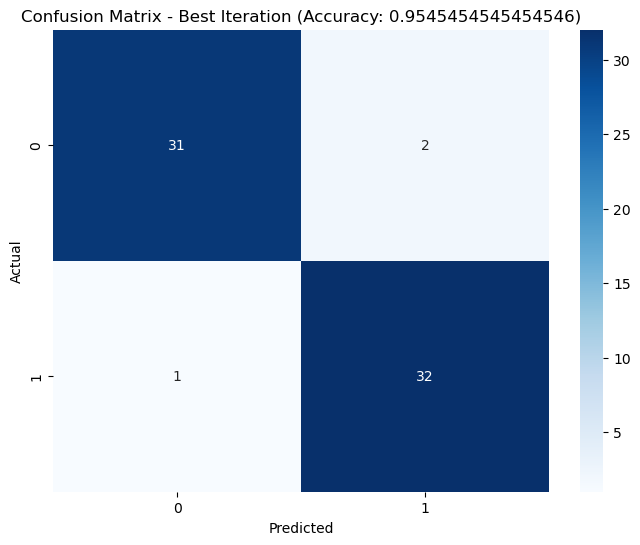

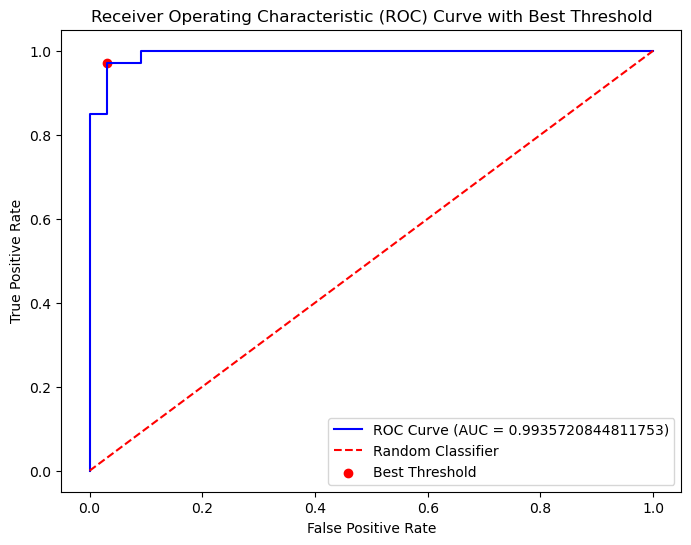

Best Threshold rf: 0.77
Sensitivity (TPR) at Best Threshold rf: 0.9696969696969697
Specificity at Best Threshold rf: 0.9696969696969697
FPR at Best Threshold rf: 0.030303030303030304


In [158]:
# Find the best iteration based on ROC AUC
best_index_rf = np.argmax(roc_aucs_rf)
best_fpr_rf = fprs_rf[best_index_rf]
best_tpr_rf = tprs_rf[best_index_rf]
best_thresholds_rf = thresholds_list_rf[best_index_rf]
best_roc_auc_rf = roc_aucs_rf[best_index_rf]

# Determine the best threshold using Youden's J statistic
J_rf = best_tpr_rf - best_fpr_rf
best_threshold_index_rf = np.argmax(J_rf)
best_threshold_rf = best_thresholds_rf[best_threshold_index_rf]

# Visualize confusion matrix and ROC curve for the best iteration
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrixes_rf[best_index_rf], annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Best Iteration (Accuracy: {accuracy_scores_rf[best_index_rf]})')
plt.show()

# Plot ROC curve with the best threshold
plt.figure(figsize=(8,6))
plt.plot(best_fpr_rf, best_tpr_rf, color='blue', label=f'ROC Curve (AUC = {best_roc_auc_rf})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.scatter(best_fpr_rf[best_threshold_index_rf], best_tpr_rf[best_threshold_index_rf], color='red', label='Best Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Best Threshold')
plt.legend(loc="lower right")
plt.show()

print("Best Threshold rf:", best_threshold_rf)
print("Sensitivity (TPR) at Best Threshold rf:", best_tpr_rf[best_threshold_index_rf])
print("Specificity at Best Threshold rf:", 1 - best_fpr_rf[best_threshold_index_rf])
print("FPR at Best Threshold rf:", best_fpr_rf[best_threshold_index_rf])

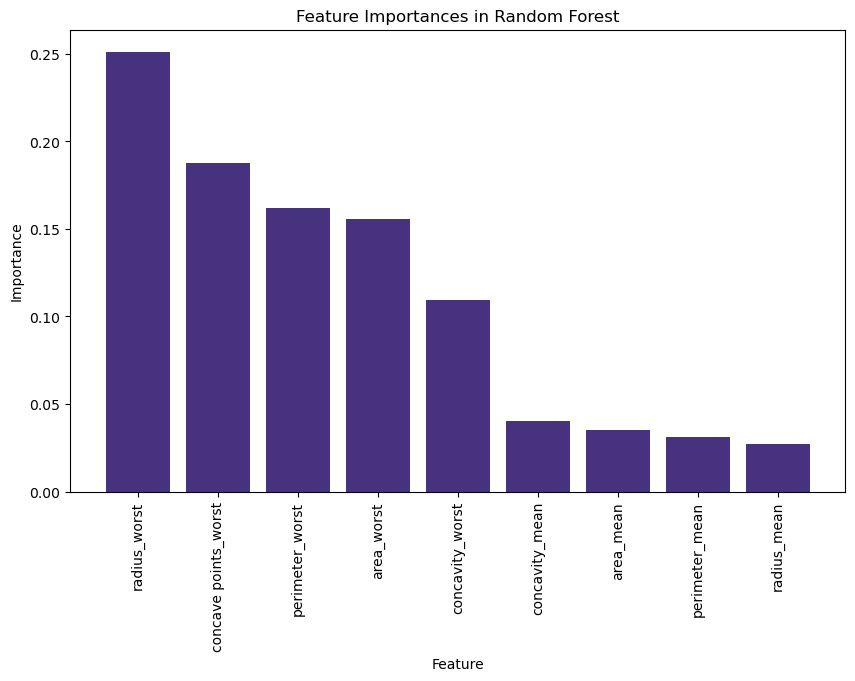

radius_mean: 0.0274
perimeter_mean: 0.0312
area_mean: 0.0352
concavity_mean: 0.0402
radius_worst: 0.2513
perimeter_worst: 0.1620
area_worst: 0.1557
concavity_worst: 0.1094
concave points_worst: 0.1877


In [145]:
# Mendapatkan nama-nama fitur sebagai daftar (berdasarkan kolom yang dipilih)
feature_names = X1.columns.tolist()

# Mendapatkan nama-nama kelas sebagai daftar
class_names = [str(cls) for cls in rf_model.classes_]

importances = rf_model.feature_importances_

# Membuat labels dan indices yang diurutkan berdasarkan kepentingan
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Random Forest')
plt.bar(range(len(importances)), sorted_importances, align='center')
plt.xticks(range(len(importances)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

# Random Forest with K Fold Cross Validation

In [159]:
from sklearn.model_selection import KFold

In [160]:
# Definisikan jumlah fold
k = 5

n_iterations = 5

In [161]:
# Initialize an empty list to store the accuracy scores
accuracy_scores_rf2 = []
sensitivitas_scores_rf2 = []
spesifisitas_scores_rf2 = []
confusion_matrixes_rf2 = []
classification_reports_rf2 = []
roc_aucs_rf2 = []
fprs_rf2 = []
tprs_rf2 = []
thresholds_list_rf2 = []

In [162]:
# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [163]:
for _ in range(n_iterations):
    # Split the data into training and testing sets
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train a Random Forest model
        rf2_model = RandomForestClassifier(random_state=42)
        rf2_model.fit(X_train, y_train)

        # Evaluate the model on the testing set
        y_pred = rf2_model.predict(X_test)
        y_prob = rf2_model.predict_proba(X_test)[:, 1]
        accuracy_rf = accuracy_score(y_test, y_pred)
        accuracy_scores_rf2.append(accuracy_rf)
        
        # Hitung sensitivitas, spesifisitas
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivitas = tp / (tp + fn)
        spesifisitas = tn / (tn + fp)
        
        sensitivitas_scores_rf2.append(sensitivitas)
        spesifisitas_scores_rf2.append(spesifisitas)
        confusion_matrixes_rf2.append(cm)
        classification_reports_rf2.append(classification_report(y_test, y_pred, output_dict=True))
        
        # ROC and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        fprs_rf2.append(fpr)
        tprs_rf2.append(tpr)
        roc_aucs_rf2.append(roc_auc)
        thresholds_list_rf2.append(thresholds)

In [164]:
# Display average results
avg_accuracy_rf2 = np.mean(accuracy_scores_rf2)
avg_sensitivitas_rf2 = np.mean(sensitivitas_scores_rf2)
avg_spesifisitas_rf2 = np.mean(spesifisitas_scores_rf2)
avg_roc_auc_rf2 = np.mean(roc_aucs_rf2)

# Function to calculate average classification report
def average_classification_reports(reports):
    avg_report = defaultdict(dict)
    
    for report in reports:
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                for metric, value in metrics.items():
                    if metric not in avg_report[label]:
                        avg_report[label][metric] = []
                    avg_report[label][metric].append(value)
            else:
                if label not in avg_report:
                    avg_report[label] = []
                avg_report[label].append(metrics)
    
    for label, metrics in avg_report.items():
        if isinstance(metrics, list):
            avg_report[label] = np.mean(metrics)
        else:
            for metric, values in metrics.items():
                avg_report[label][metric] = np.mean(values)
    
    return avg_report

# Calculate and display average classification report
avg_class_report_rf2 = average_classification_reports(classification_reports_rf2)

# Convert to DataFrame for better visualization
df_report_rf2 = pd.DataFrame(avg_class_report_rf2).T

print(f'Average Accuracy rf2: {avg_accuracy_rf2}')
print(f'Average Sensitivitas rf2: {avg_sensitivitas_rf2}')
print(f'Average Spesifisitas rf2: {avg_spesifisitas_rf2}')
print(f'Average ROC AUC rf2: {avg_roc_auc_rf2}')
print(df_report_rf2)

Average Accuracy rf2: 0.9513286713286715
Average Sensitivitas rf2: 0.9614939677439679
Average Spesifisitas rf2: 0.9421779918864097
Average ROC AUC rf2: 0.9808672762279507
              precision    recall  f1-score    support
0              0.963724  0.942178  0.952373  32.800000
1              0.937125  0.961494  0.948610  32.800000
accuracy       0.951329  0.951329  0.951329   0.951329
macro avg      0.950424  0.951836  0.950492  65.600000
weighted avg   0.952846  0.951329  0.951482  65.600000


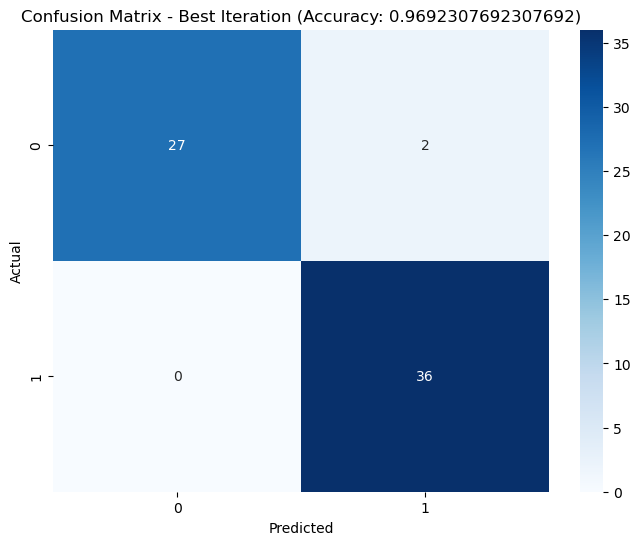

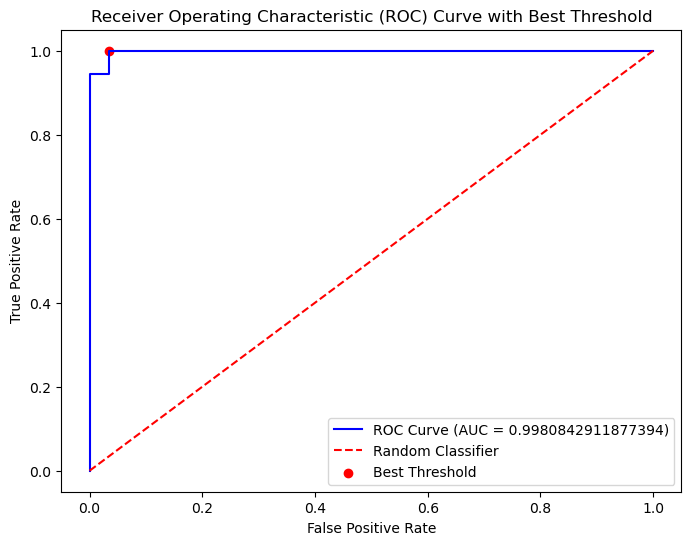

Best Threshold rf2: 0.62
Sensitivity (TPR) at Best Threshold rf2: 1.0
Specificity at Best Threshold rf2: 0.9655172413793104
FPR at Best Threshold rf2: 0.034482758620689655


In [178]:
# Find the best iteration based on ROC AUC
best_index_rf2 = np.argmax(roc_aucs_rf2)
best_fpr_rf2 = fprs_rf2[best_index_rf2]
best_tpr_rf2 = tprs_rf2[best_index_rf2]
best_thresholds_rf2 = thresholds_list_rf2[best_index_rf2]
best_roc_auc_rf2 = roc_aucs_rf2[best_index_rf2]

# Determine the best threshold using Youden's J statistic
J_rf2 = best_tpr_rf2 - best_fpr_rf2
best_threshold_index_rf2 = np.argmax(J_rf2)
best_threshold_rf2 = best_thresholds_rf2[best_threshold_index_rf2]

# Visualize confusion matrix and ROC curve for the best iteration
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrixes_rf2[best_index_rf2], annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Best Iteration (Accuracy: {accuracy_scores_rf2[best_index_rf2]})')
plt.show()

# Plot ROC curve with the best threshold
plt.figure(figsize=(8,6))
plt.plot(best_fpr_rf2, best_tpr_rf2, color='blue', label=f'ROC Curve (AUC = {best_roc_auc_rf2})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.scatter(best_fpr_rf2[best_threshold_index_rf2], best_tpr_rf2[best_threshold_index_rf2], color='red', label='Best Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Best Threshold')
plt.legend(loc="lower right")
plt.show()

print("Best Threshold rf2:", best_threshold_rf2)
print("Sensitivity (TPR) at Best Threshold rf2:", best_tpr_rf2[best_threshold_index_rf2])
print("Specificity at Best Threshold rf2:", 1 - best_fpr_rf2[best_threshold_index_rf2])
print("FPR at Best Threshold rf2:", best_fpr_rf2[best_threshold_index_rf2])

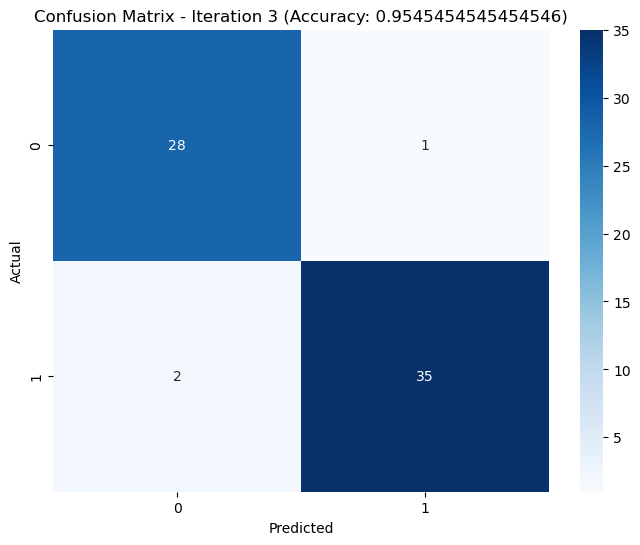

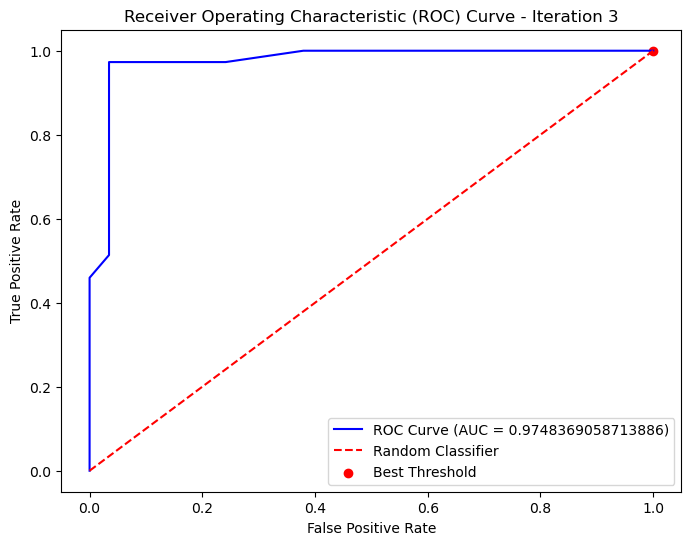

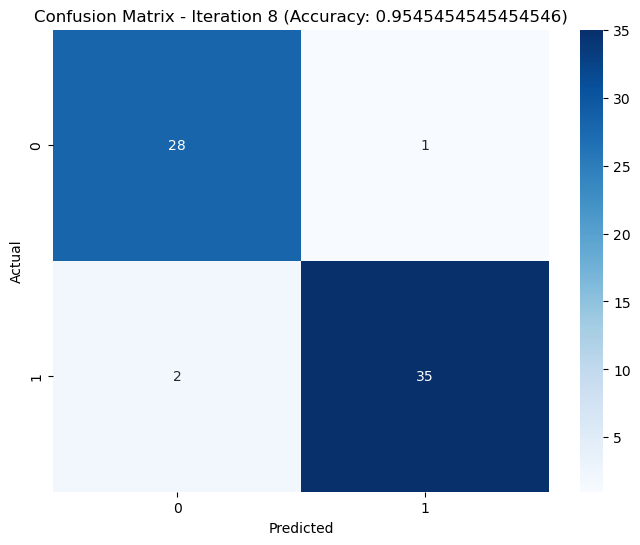

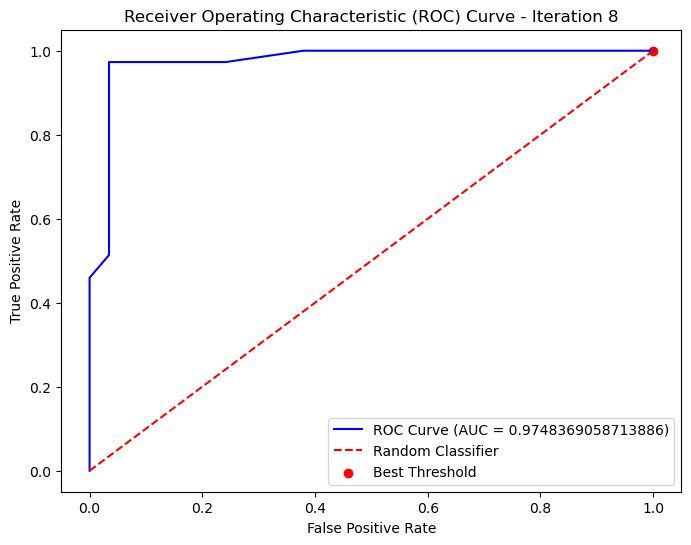

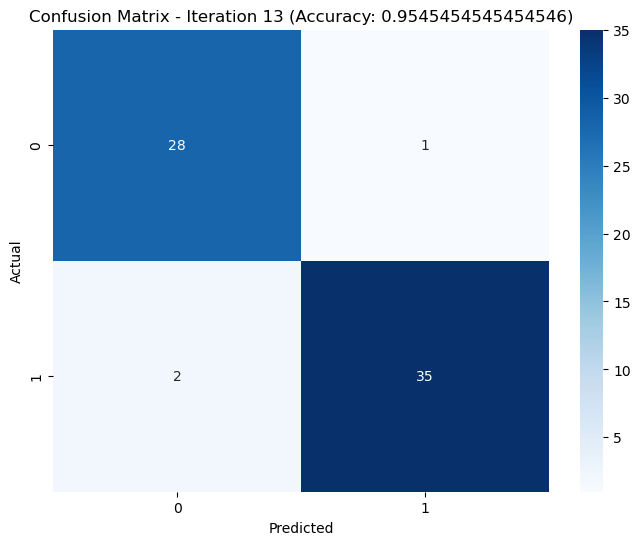

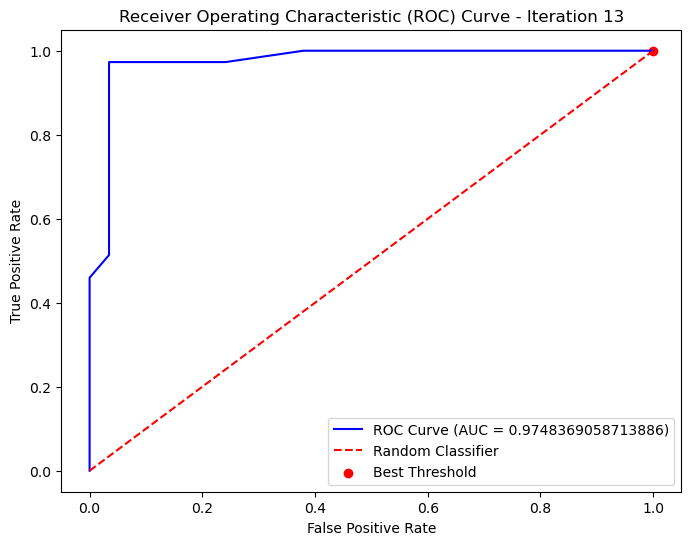

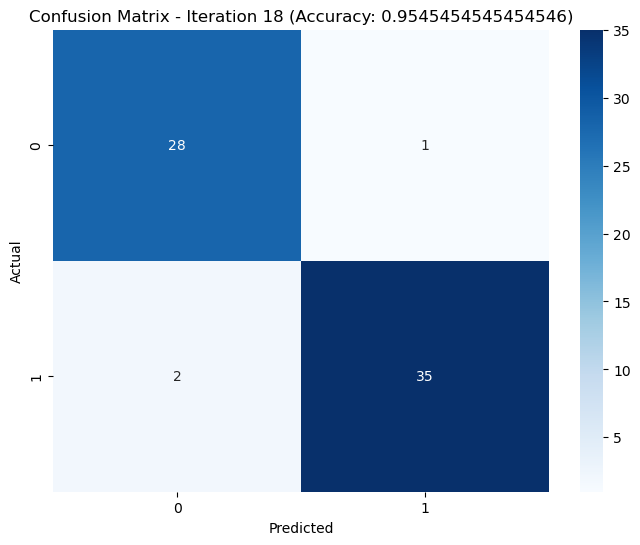

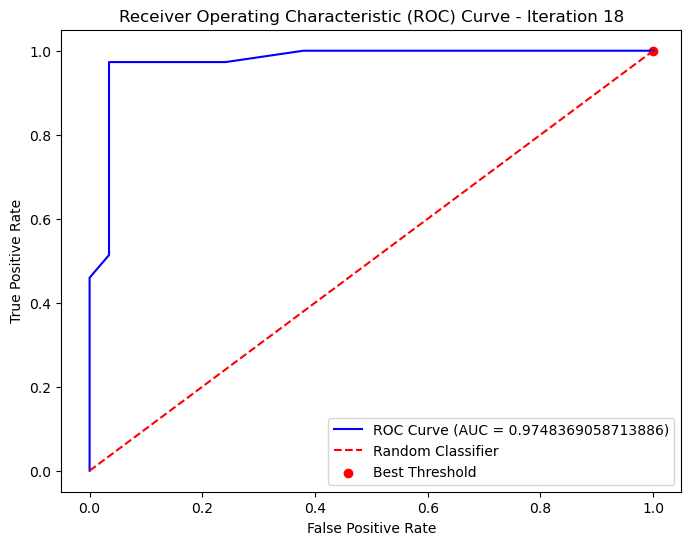

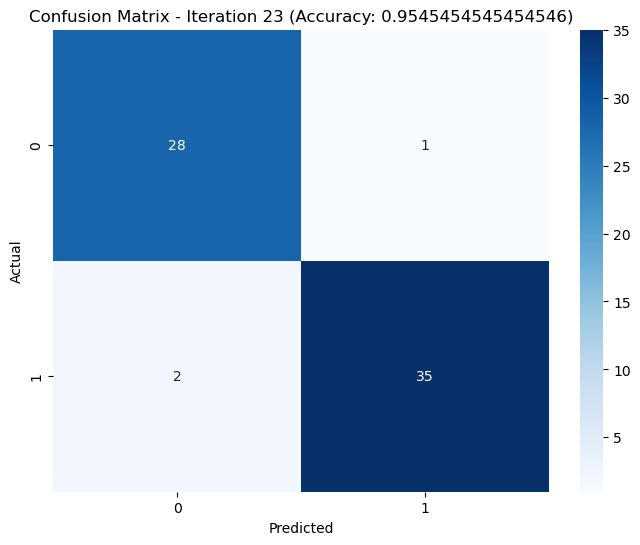

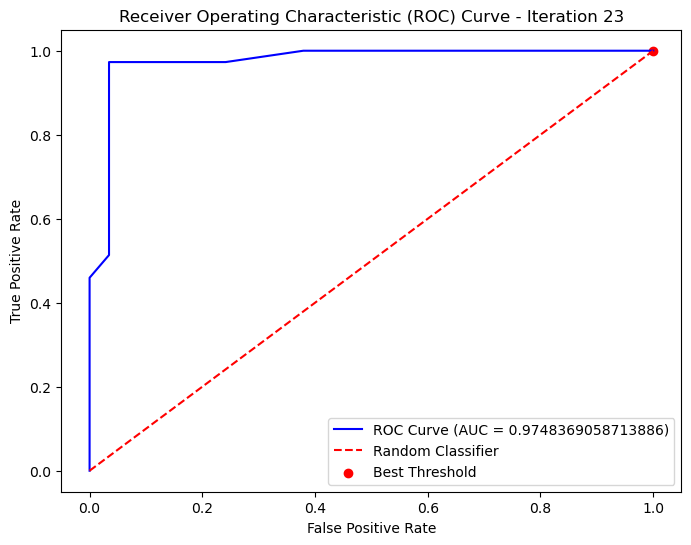

Best Threshold rf2: 0.62
Sensitivity (TPR) at Best Threshold rf2: 1.0
Specificity at Best Threshold rf2: 0.9655172413793104
FPR at Best Threshold rf2: 0.034482758620689655


In [165]:
# Find the best iteration based on ROC AUC
best_index_rf2 = np.argmax(roc_aucs_rf2)
best_fpr_rf2 = fprs_rf2[best_index_rf2]
best_tpr_rf2 = tprs_rf2[best_index_rf2]
best_thresholds_rf2 = thresholds_list_rf2[best_index_rf2]
best_roc_auc_rf2 = roc_aucs_rf2[best_index_rf2]

# Determine the best threshold using Youden's J statistic
J_rf2 = best_tpr_rf2 - best_fpr_rf2
best_threshold_index_rf2 = np.argmax(J_rf2)
best_threshold_rf2 = best_thresholds_rf2[best_threshold_index_rf2]

# Visualize confusion matrices and ROC curves for iterations with accuracy equal to average accuracy
for i, (cm, accuracy, fpr, tpr, roc_auc) in enumerate(zip(confusion_matrixes_rf2, accuracy_scores_rf2, fprs_rf2, tprs_rf2, roc_aucs_rf2)):
    if np.isclose(accuracy, avg_accuracy_rf2, atol=1e-2):  # using np.isclose for comparison with a tolerance
        # Plot confusion matrix
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - Iteration {i+1} (Accuracy: {accuracy})')
        plt.show()
        
        # Plot ROC curve
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
        plt.scatter(fpr[best_threshold_index_rf2], tpr[best_threshold_index_rf2], color='red', label='Best Threshold')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - Iteration {i+1}')
        plt.legend()
        plt.show()

# Best threshold and related metrics
print("Best Threshold rf2:", best_threshold_rf2)
print("Sensitivity (TPR) at Best Threshold rf2:", best_tpr_rf2[best_threshold_index_rf2])
print("Specificity at Best Threshold rf2:", 1 - best_fpr_rf2[best_threshold_index_rf2])
print("FPR at Best Threshold rf2:", best_fpr_rf2[best_threshold_index_rf2])

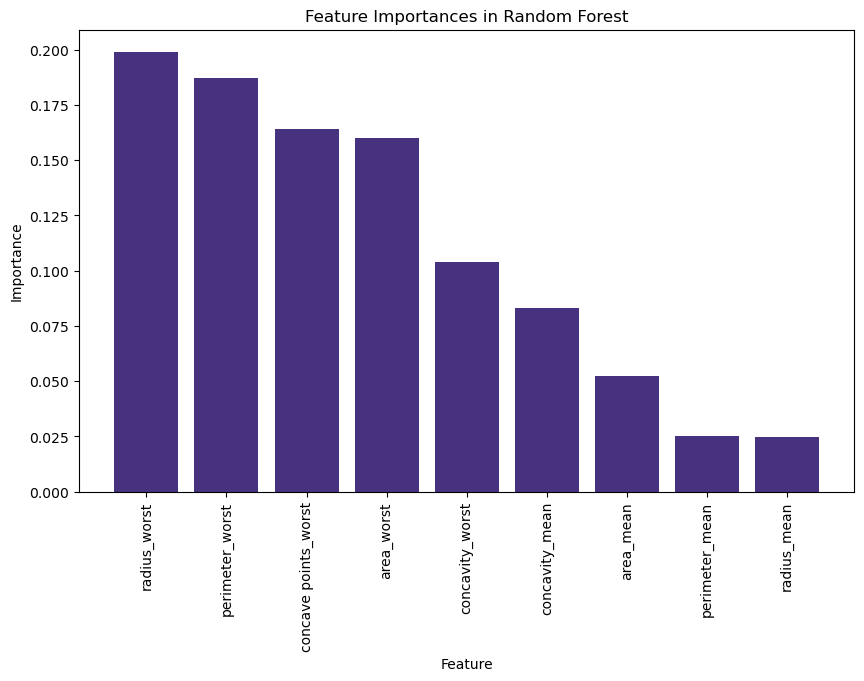

radius_mean: 0.0246
perimeter_mean: 0.0253
area_mean: 0.0524
concavity_mean: 0.0831
radius_worst: 0.1992
perimeter_worst: 0.1874
area_worst: 0.1600
concavity_worst: 0.1040
concave points_worst: 0.1642


In [166]:
# Mendapatkan nama-nama fitur sebagai daftar (berdasarkan kolom yang dipilih)
feature_names = X1.columns.tolist()

# Mendapatkan nama-nama kelas sebagai daftar
class_names = [str(cls) for cls in rf2_model.classes_]

importances = rf2_model.feature_importances_

# Membuat labels dan indices yang diurutkan berdasarkan kepentingan
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Random Forest')
plt.bar(range(len(importances)), sorted_importances, align='center')
plt.xticks(range(len(importances)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

# Visualisasi

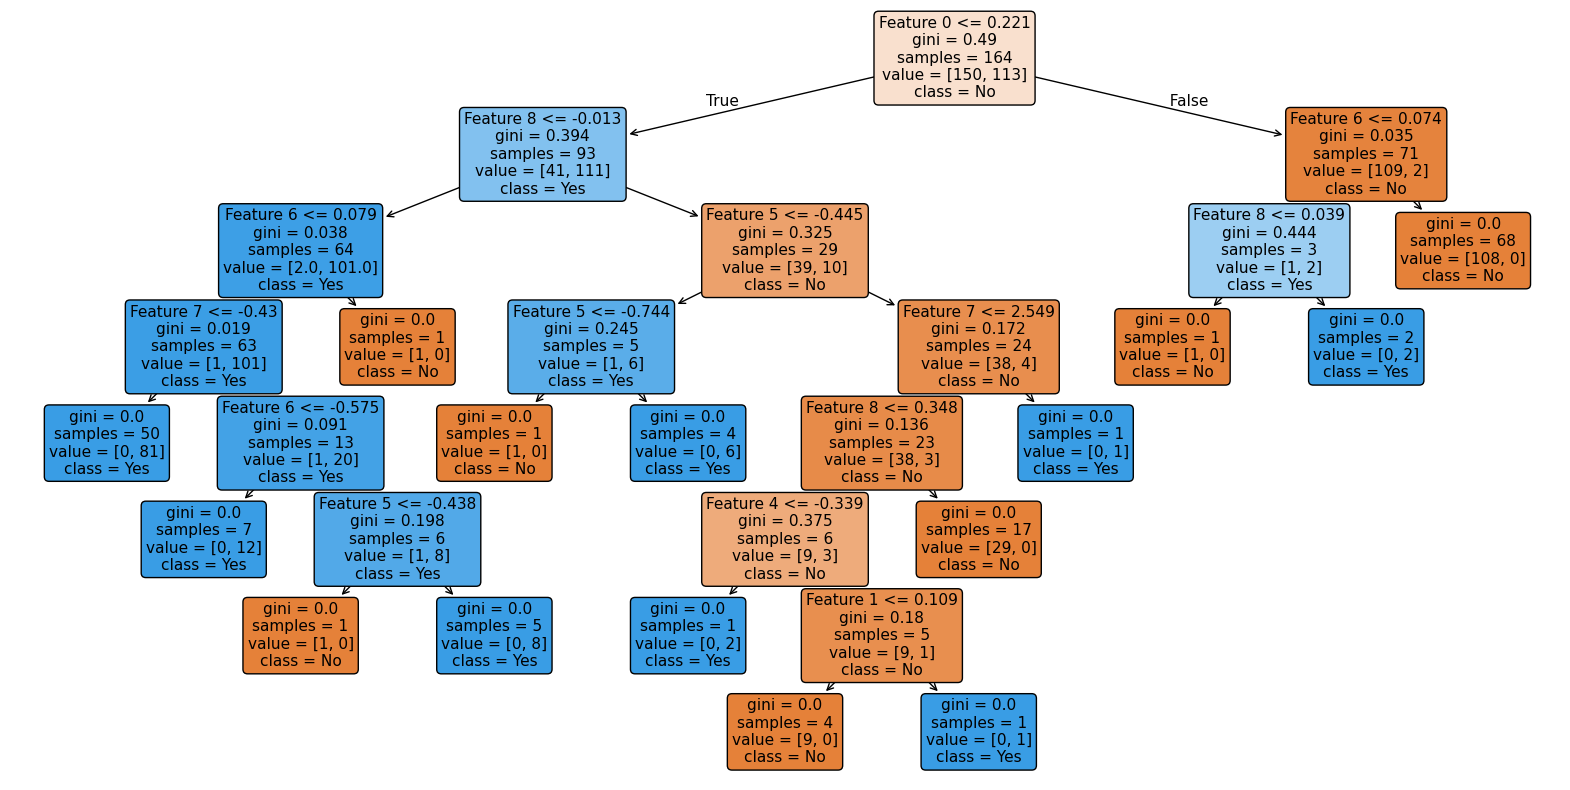

In [167]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pilih salah satu pohon dari hutan (misalnya, pohon pertama)
tree = rf_model.estimators_[0]

# Konversi X_importances.columns menjadi list jika diperlukan
feature_names_list = list(X_train.columns) if isinstance(X_importance, pd.DataFrame) else ["Feature " + str(i) for i in range(X_train.shape[1])]

# Plot pohon menggunakan matplotlib
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=feature_names_list, filled=True, rounded=True, class_names=["No", "Yes"])
plt.show()

# Logistic Regression with Repeated Stratification Hold Out

In [168]:
# Define the number of iterations for Repeated Stratification Hold Out
n_iterations = 5

# Initialize an empty list to store the accuracy scores
accuracy_scores_lr = []
sensitivitas_scores_lr = []
spesifisitas_scores_lr = []
confusion_matrixes_lr = []
classification_reports_lr = []
roc_aucs_lr = []
fprs_lr = []
tprs_lr = []
thresholds_list_lr = []

In [169]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for _ in range(n_iterations):
    # Split the data into training and testing sets
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train a Logistic Regression model
        lr_model = LogisticRegression(random_state=42, max_iter=1000)
        lr_model.fit(X_train, y_train)

        # Evaluate the model on the testing set
        y_pred = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)[:, 1]
        accuracy_lr = accuracy_score(y_test, y_pred)
        accuracy_scores_lr.append(accuracy_lr)
        
        # Hitung sensitivitas, spesifisitas
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivitas = tp / (tp + fn)
        spesifisitas = tn / (tn + fp)
        
        sensitivitas_scores_lr.append(sensitivitas)
        spesifisitas_scores_lr.append(spesifisitas)
        confusion_matrixes_lr.append(cm)
        classification_reports_lr.append(classification_report(y_test, y_pred, output_dict=True))
        
        # ROC and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        fprs_lr.append(fpr)
        tprs_lr.append(tpr)
        roc_aucs_lr.append(roc_auc)
        thresholds_list_lr.append(thresholds)

In [170]:
# Display average results
avg_accuracy_lr = np.mean(accuracy_scores_lr)
avg_sensitivitas_lr = np.mean(sensitivitas_scores_lr)
avg_spesifisitas_lr = np.mean(spesifisitas_scores_lr)
avg_roc_auc_lr = np.mean(roc_aucs_lr)

# Function to calculate average classification report
def average_classification_reports(reports):
    avg_report = defaultdict(dict)
    
    for report in reports:
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                for metric, value in metrics.items():
                    if metric not in avg_report[label]:
                        avg_report[label][metric] = []
                    avg_report[label][metric].append(value)
            else:
                if label not in avg_report:
                    avg_report[label] = []
                avg_report[label].append(metrics)
    
    for label, metrics in avg_report.items():
        if isinstance(metrics, list):
            avg_report[label] = np.mean(metrics)
        else:
            for metric, values in metrics.items():
                avg_report[label][metric] = np.mean(values)
    
    return avg_report

# Calculate and display average classification report
avg_class_report_lr = average_classification_reports(classification_reports_lr)

# Convert to DataFrame for better visualization
df_report_lr = pd.DataFrame(avg_class_report_lr).T

print(f'Average Accuracy lr: {avg_accuracy_lr}')
print(f'Average Sensitivitas lr: {avg_sensitivitas_lr}')
print(f'Average Spesifisitas lr: {avg_spesifisitas_lr}')
print(f'Average ROC AUC lr: {avg_roc_auc_lr}')
print(df_report_lr)

Average Accuracy lr: 0.9420512820512822
Average Sensitivitas lr: 0.9329545454545455
Average Spesifisitas lr: 0.9507575757575758
Average ROC AUC lr: 0.9814508723599634
              precision    recall  f1-score    support
0              0.935288  0.950758  0.942167  32.800000
1              0.952173  0.932955  0.941753  32.800000
accuracy       0.942051  0.942051  0.942051   0.942051
macro avg      0.943731  0.941856  0.941960  65.600000
weighted avg   0.943572  0.942051  0.941979  65.600000


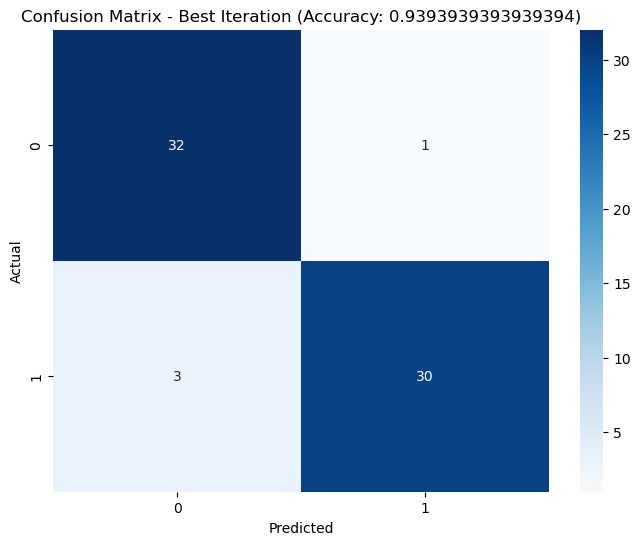

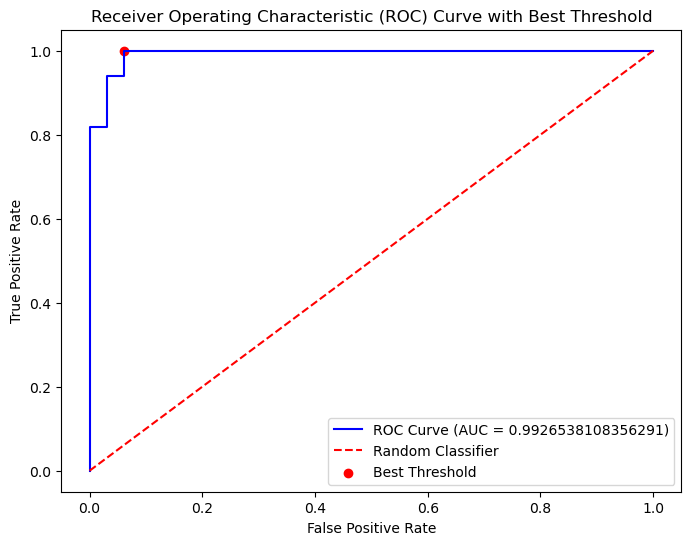

Best Threshold lr: 0.4108469020455395
Sensitivity (TPR) at Best Threshold lr: 1.0
Specificity at Best Threshold lr: 0.9393939393939394
FPR at Best Threshold lr: 0.06060606060606061


In [171]:
# Find the best iteration based on ROC AUC
best_index_lr = np.argmax(roc_aucs_lr)
best_fpr_lr = fprs_lr[best_index_lr]
best_tpr_lr = tprs_lr[best_index_lr]
best_thresholds_lr = thresholds_list_lr[best_index_lr]
best_roc_auc_lr = roc_aucs_lr[best_index_lr]

# Determine the best threshold using Youden's J statistic
J_lr = best_tpr_lr - best_fpr_lr
best_threshold_index_lr = np.argmax(J_lr)
best_threshold_lr = best_thresholds_lr[best_threshold_index_lr]

# Visualize confusion matrix and ROC curve for the best iteration
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrixes_lr[best_index_lr], annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Best Iteration (Accuracy: {accuracy_scores_lr[best_index_lr]})')
plt.show()

# Plot ROC curve with the best threshold
plt.figure(figsize=(8,6))
plt.plot(best_fpr_lr, best_tpr_lr, color='blue', label=f'ROC Curve (AUC = {best_roc_auc_lr})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.scatter(best_fpr_lr[best_threshold_index_lr], best_tpr_lr[best_threshold_index_lr], color='red', label='Best Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Best Threshold')
plt.legend(loc="lower right")
plt.show()

print("Best Threshold lr:", best_threshold_lr)
print("Sensitivity (TPR) at Best Threshold lr:", best_tpr_lr[best_threshold_index_lr])
print("Specificity at Best Threshold lr:", 1 - best_fpr_lr[best_threshold_index_lr])
print("FPR at Best Threshold lr:", best_fpr_lr[best_threshold_index_lr])

# Logistic Regression with K Fold Cross Validation

In [172]:
# Definisikan jumlah fold
k = 5

# Initialize an empty list to store the accuracy scores
accuracy_scores_lr2 = []
sensitivitas_scores_lr2 = []
spesifisitas_scores_lr2 = []
confusion_matrixes_lr2 = []
classification_reports_lr2 = []
roc_aucs_lr2 = []
fprs_lr2 = []
tprs_lr2 = []
thresholds_list_lr2 = []

In [173]:
# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

n_iterations = 5
for _ in range(n_iterations):
    # Split the data into training and testing sets
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train a Logistic Regression model
        lr2_model = LogisticRegression(random_state=42, max_iter=1000)
        lr2_model.fit(X_train, y_train)

        # Evaluate the model on the testing set
        y_pred = lr2_model.predict(X_test)
        y_prob = lr2_model.predict_proba(X_test)[:, 1]
        accuracy_lr = accuracy_score(y_test, y_pred)
        accuracy_scores_lr2.append(accuracy_lr)
        
        # Hitung sensitivitas, spesifisitas
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivitas = tp / (tp + fn)
        spesifisitas = tn / (tn + fp)
        
        sensitivitas_scores_lr2.append(sensitivitas)
        spesifisitas_scores_lr2.append(spesifisitas)
        confusion_matrixes_lr2.append(cm)
        classification_reports_lr2.append(classification_report(y_test, y_pred, output_dict=True))
        
        # ROC and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        fprs_lr2.append(fpr)
        tprs_lr2.append(tpr)
        roc_aucs_lr2.append(roc_auc)
        thresholds_list_lr2.append(thresholds)

In [174]:
# Display average results
avg_accuracy_lr2 = np.mean(accuracy_scores_lr2)
avg_sensitivitas_lr2 = np.mean(sensitivitas_scores_lr2)
avg_spesifisitas_lr2 = np.mean(spesifisitas_scores_lr2)
avg_roc_auc_lr2 = np.mean(roc_aucs_lr2)

# Function to calculate average classification report
def average_classification_reports(reports):
    avg_report = defaultdict(dict)
    
    for report in reports:
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                for metric, value in metrics.items():
                    if metric not in avg_report[label]:
                        avg_report[label][metric] = []
                    avg_report[label][metric].append(value)
            else:
                if label not in avg_report:
                    avg_report[label] = []
                avg_report[label].append(metrics)
    
    for label, metrics in avg_report.items():
        if isinstance(metrics, list):
            avg_report[label] = np.mean(metrics)
        else:
            for metric, values in metrics.items():
                avg_report[label][metric] = np.mean(values)
    
    return avg_report

# Calculate and display average classification report
avg_class_report_lr2 = average_classification_reports(classification_reports_lr2)

# Convert to DataFrame for better visualization
df_report_lr2 = pd.DataFrame(avg_class_report_lr2).T

print(f'Average Accuracy lr2: {avg_accuracy_lr2}')
print(f'Average Sensitivitas lr2: {avg_sensitivitas_lr2}')
print(f'Average Spesifisitas lr2: {avg_spesifisitas_lr2}')
print(f'Average ROC AUC lr2: {avg_roc_auc_lr2}')
print(df_report_lr2)

Average Accuracy lr2: 0.9391142191142191
Average Sensitivitas lr2: 0.9311670499170498
Average Spesifisitas lr2: 0.9509710953346857
Average ROC AUC lr2: 0.9807901512680924
              precision    recall  f1-score    support
0              0.934775  0.950971  0.941834  32.800000
1              0.941476  0.931167  0.934906  32.800000
accuracy       0.939114  0.939114  0.939114   0.939114
macro avg      0.938126  0.941069  0.938370  65.600000
weighted avg   0.941910  0.939114  0.939329  65.600000


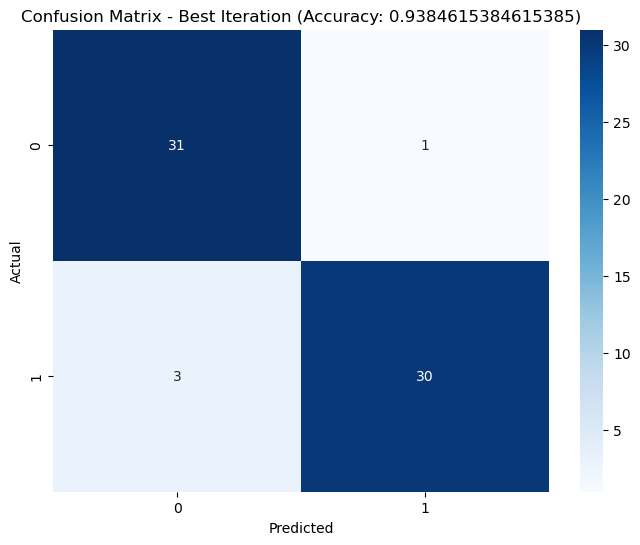

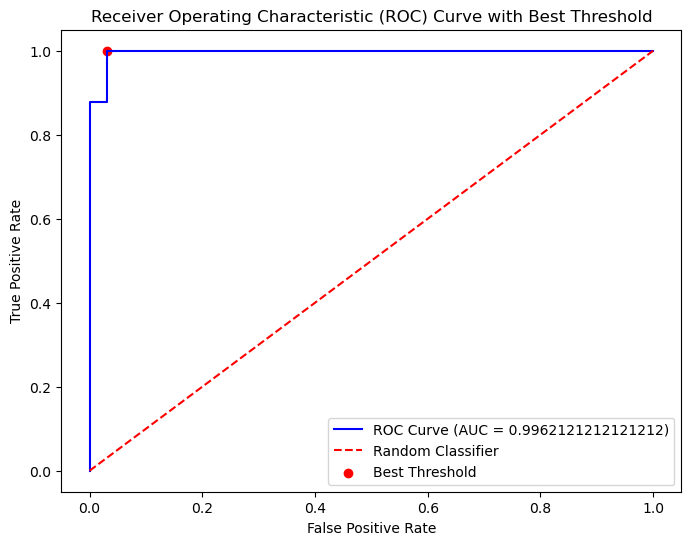

Best Threshold lr2: 0.3928255747117095
Sensitivity (TPR) at Best Threshold lr2: 1.0
Specificity at Best Threshold lr2: 0.96875
FPR at Best Threshold lr2: 0.03125


In [177]:
# Find the best iteration based on ROC AUC
best_index_lr2 = np.argmax(roc_aucs_lr2)
best_fpr_lr2 = fprs_lr2[best_index_lr2]
best_tpr_lr2 = tprs_lr2[best_index_lr2]
best_thresholds_lr2 = thresholds_list_lr2[best_index_lr2]
best_roc_auc_lr2 = roc_aucs_lr2[best_index_lr2]

# Determine the best threshold using Youden's J statistic
J_lr2 = best_tpr_lr2 - best_fpr_lr2
best_threshold_index_lr2 = np.argmax(J_lr2)
best_threshold_lr2 = best_thresholds_lr2[best_threshold_index_lr2]

# Visualize confusion matrix and ROC curve for the best iteration
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrixes_lr2[best_index_lr2], annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Best Iteration (Accuracy: {accuracy_scores_lr2[best_index_lr2]})')
plt.show()

# Plot ROC curve with the best threshold
plt.figure(figsize=(8,6))
plt.plot(best_fpr_lr2, best_tpr_lr2, color='blue', label=f'ROC Curve (AUC = {best_roc_auc_lr2})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.scatter(best_fpr_lr2[best_threshold_index_lr2], best_tpr_lr2[best_threshold_index_lr2], color='red', label='Best Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Best Threshold')
plt.legend(loc="lower right")
plt.show()

print("Best Threshold lr2:", best_threshold_lr2)
print("Sensitivity (TPR) at Best Threshold lr2:", best_tpr_lr2[best_threshold_index_lr2])
print("Specificity at Best Threshold lr2:", 1 - best_fpr_lr2[best_threshold_index_lr2])
print("FPR at Best Threshold lr2:", best_fpr_lr2[best_threshold_index_lr2])

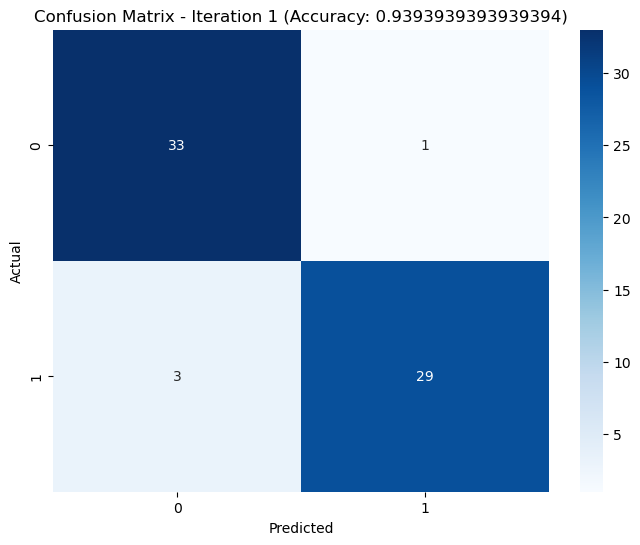

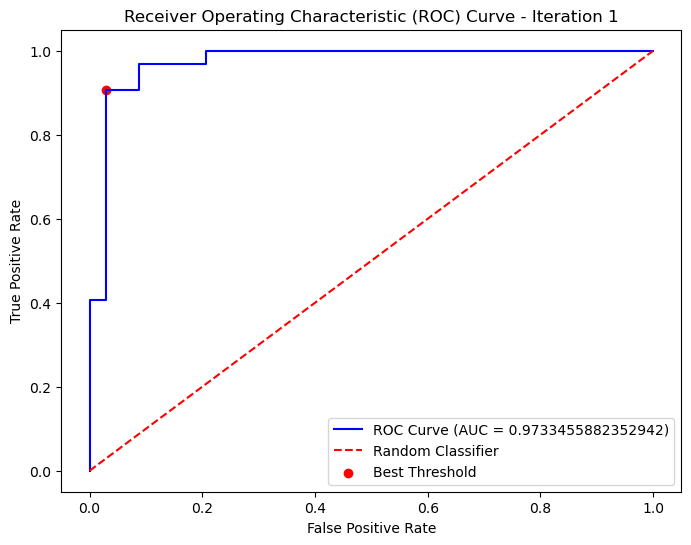

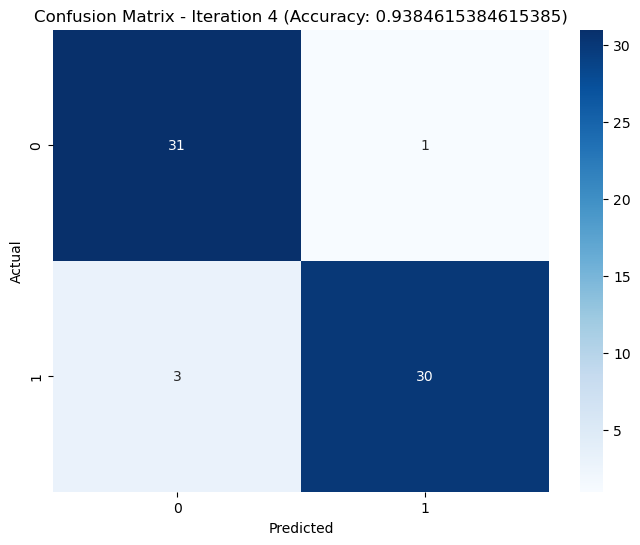

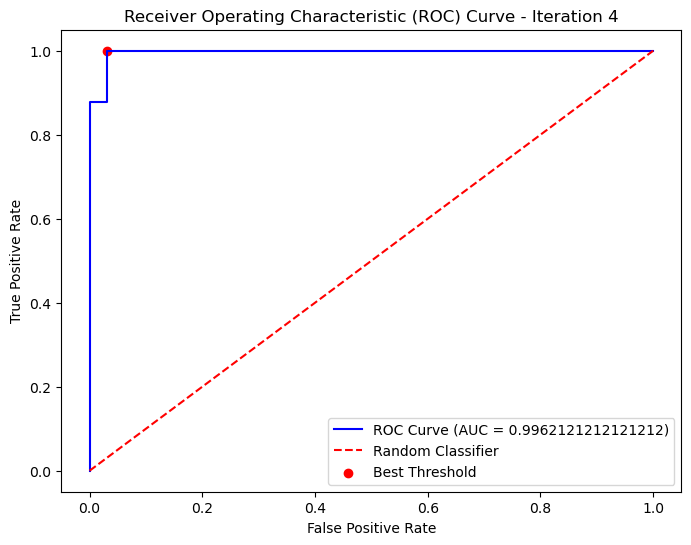

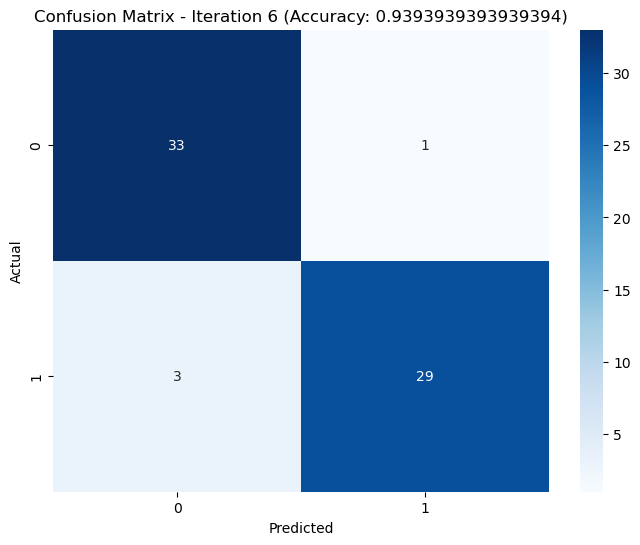

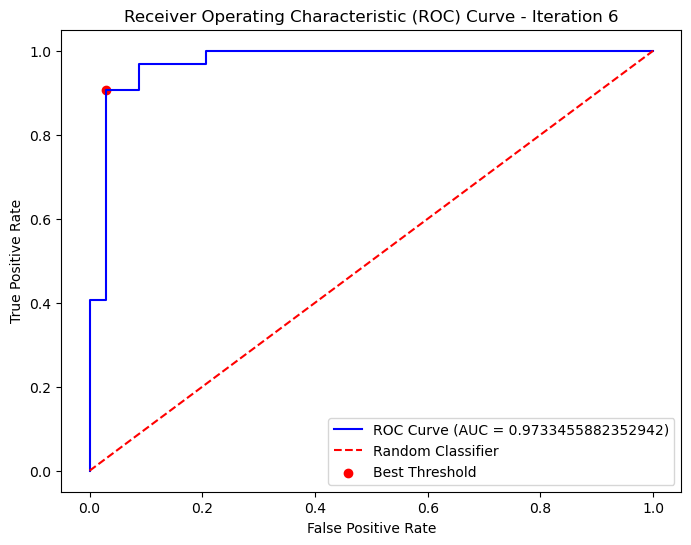

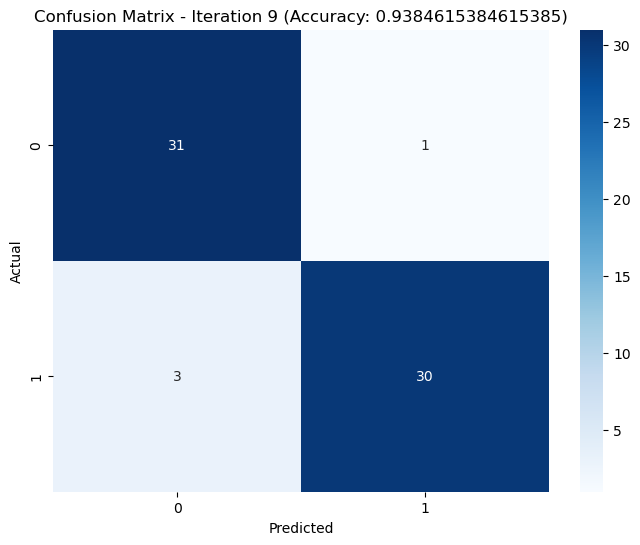

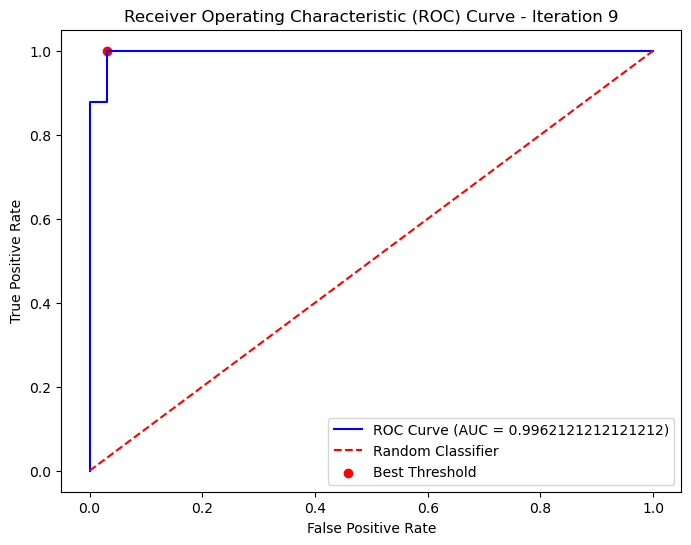

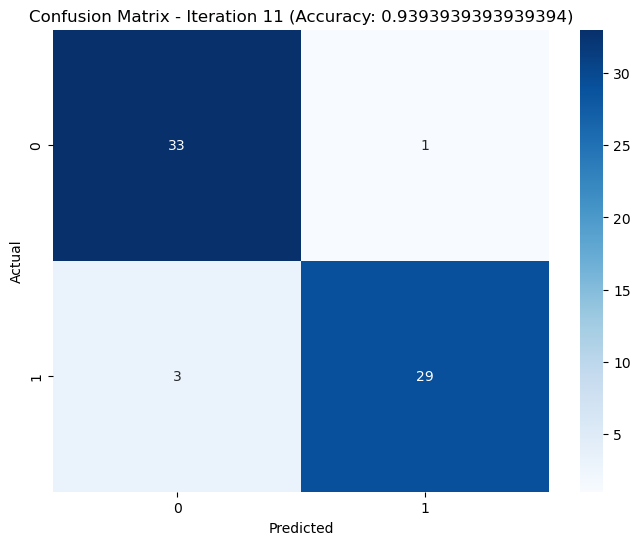

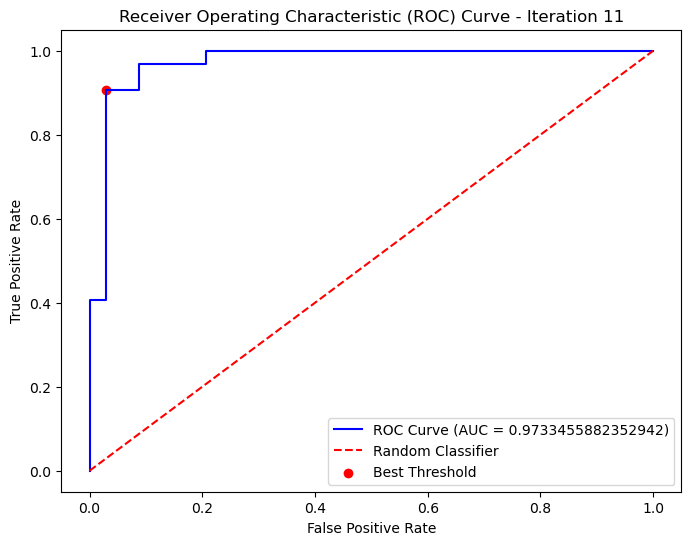

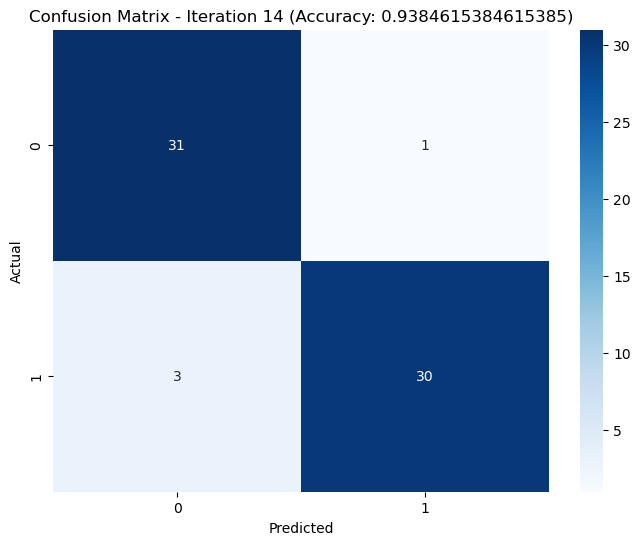

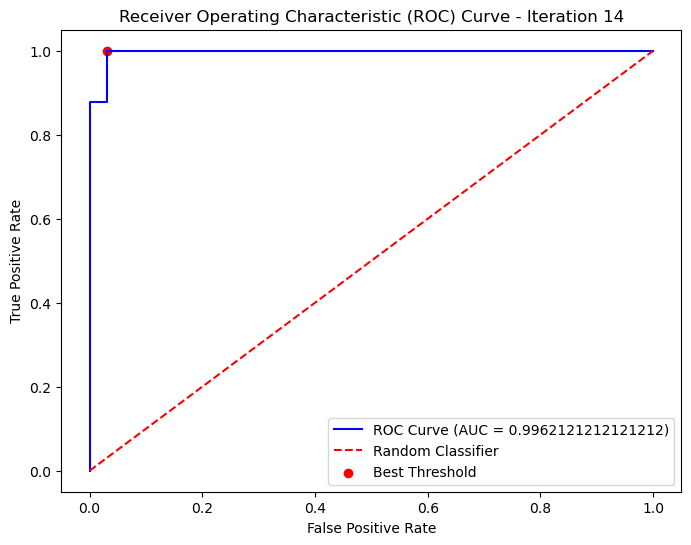

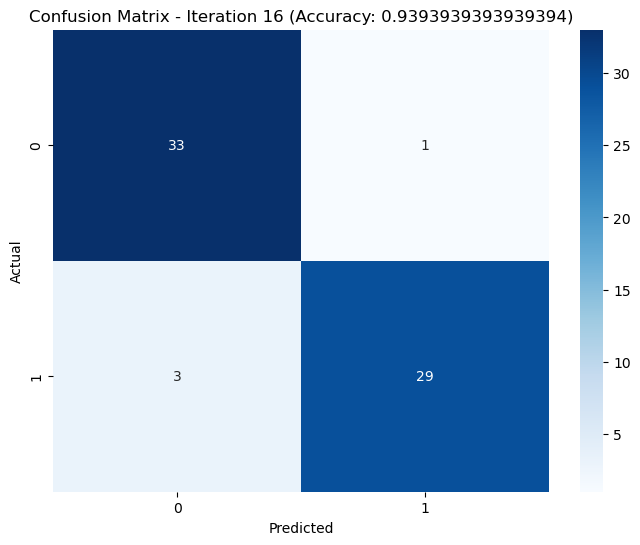

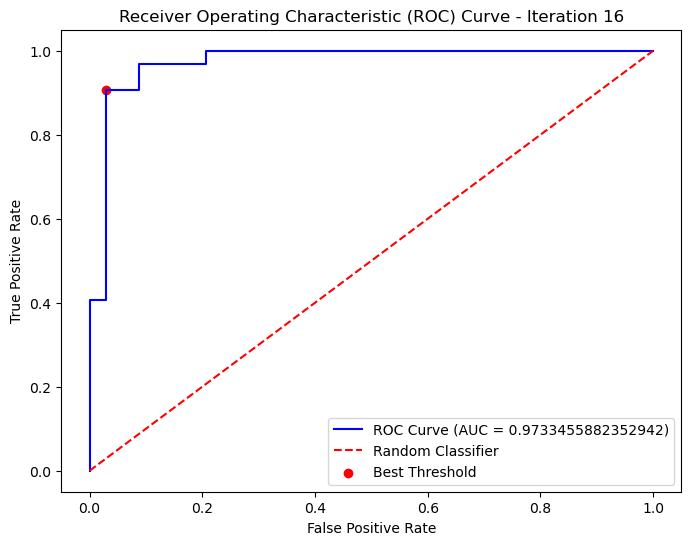

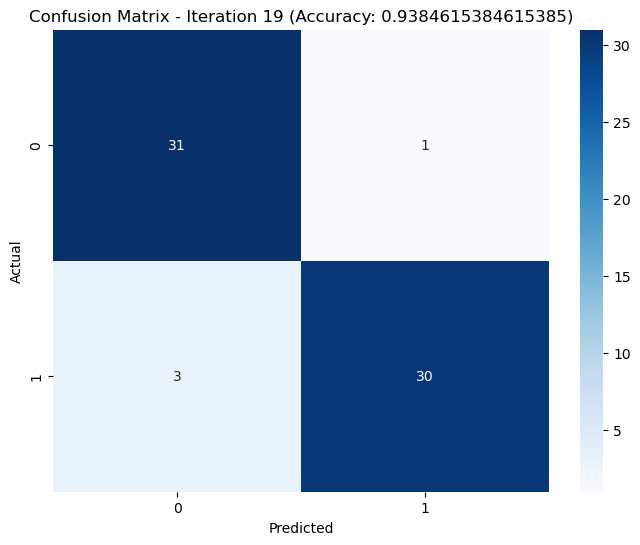

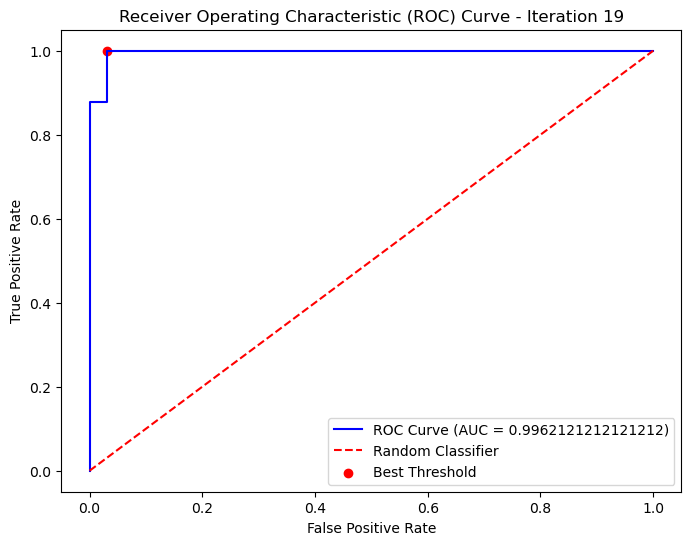

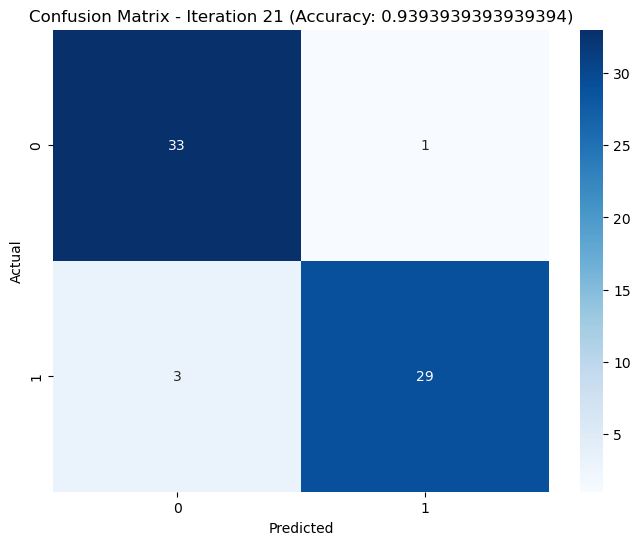

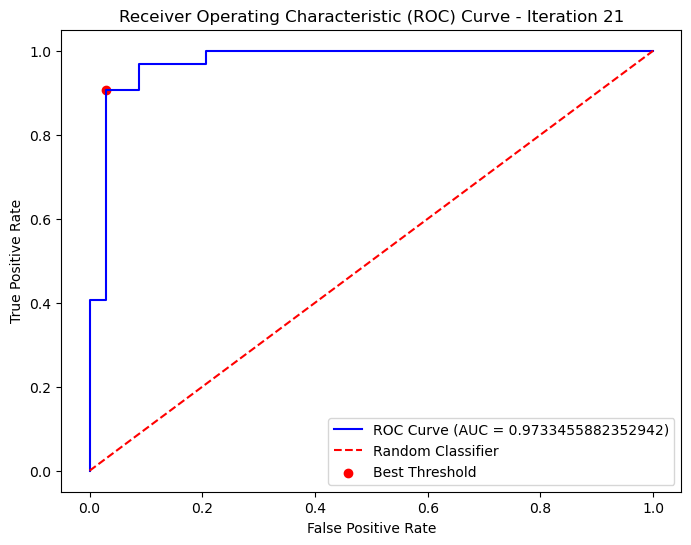

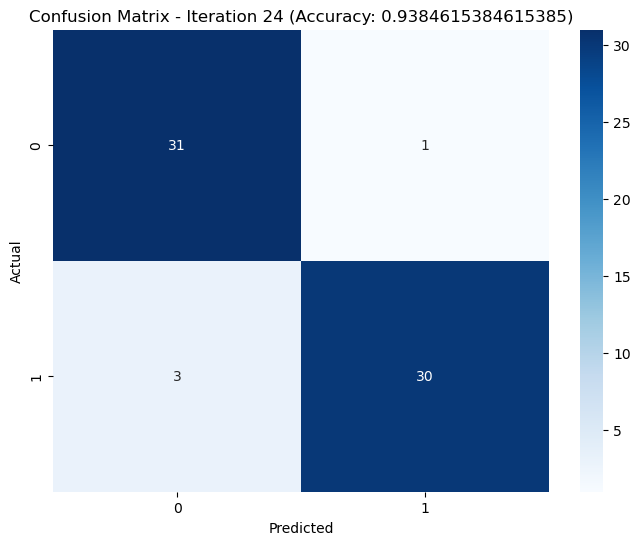

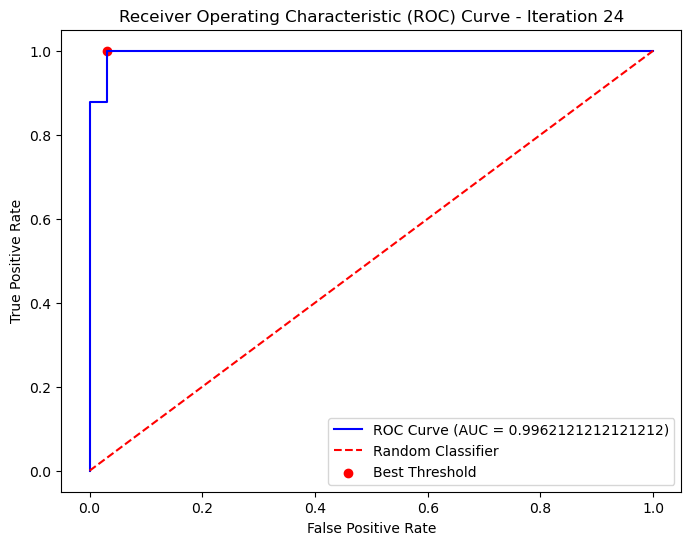

Best Threshold lr2: 0.3928255747117095
Sensitivity (TPR) at Best Threshold lr2: 1.0
Specificity at Best Threshold lr2: 0.96875
FPR at Best Threshold lr2: 0.03125


In [175]:
# Find the best iteration based on ROC AUC
best_index_lr2 = np.argmax(roc_aucs_lr2)
best_fpr_lr2 = fprs_lr2[best_index_lr2]
best_tpr_lr2 = tprs_lr2[best_index_lr2]
best_thresholds_lr2 = thresholds_list_lr2[best_index_lr2]
best_roc_auc_lr2 = roc_aucs_lr2[best_index_lr2]

# Determine the best threshold using Youden's J statistic
J_lr2 = best_tpr_lr2 - best_fpr_lr2
best_threshold_index_lr2 = np.argmax(J_lr2)
best_threshold_lr2 = best_thresholds_lr2[best_threshold_index_lr2]

# Visualize confusion matrices and ROC curves for iterations with accuracy equal to average accuracy
for i, (cm, accuracy, fpr, tpr, roc_auc) in enumerate(zip(confusion_matrixes_lr2, accuracy_scores_lr2, fprs_lr2, tprs_lr2, roc_aucs_lr2)):
    if np.isclose(accuracy, avg_accuracy_lr2, atol=1e-2):  # using np.isclose for comparison with a tolerance
        # Plot confusion matrix
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - Iteration {i+1} (Accuracy: {accuracy})')
        plt.show()
        
        # Plot ROC curve
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
        plt.scatter(fpr[best_threshold_index_lr2], tpr[best_threshold_index_lr2], color='red', label='Best Threshold')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - Iteration {i+1}')
        plt.legend()
        plt.show()

# Best threshold and related metrics
print("Best Threshold lr2:", best_threshold_lr2)
print("Sensitivity (TPR) at Best Threshold lr2:", best_tpr_lr2[best_threshold_index_lr2])
print("Specificity at Best Threshold lr2:", 1 - best_fpr_lr2[best_threshold_index_lr2])
print("FPR at Best Threshold lr2:", best_fpr_lr2[best_threshold_index_lr2])

# KNN with Repeated Stratification Hold Out

In [179]:
# Define the number of iterations for Repeated Stratification Hold Out
n_iterations = 5

# Initialize an empty list to store the accuracy scores
accuracy_scores_knn = []
sensitivitas_scores_knn = []
spesifisitas_scores_knn = []
confusion_matrixes_knn = []
classification_reports_knn = []
roc_aucs_knn = []
fprs_knn = []
tprs_knn = []
thresholds_list_knn = []

In [180]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for _ in range(n_iterations):
    # Split the data into training and testing sets
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train a K Nearest Neighbor model
        knn_model = KNeighborsClassifier()
        knn_model.fit(X_train, y_train)

        # Evaluate the model on the testing set
        y_pred = knn_model.predict(X_test)
        y_prob = knn_model.predict_proba(X_test)[:, 1]
        accuracy_knn = accuracy_score(y_test, y_pred)
        accuracy_scores_knn.append(accuracy_knn)
        
        # Hitung sensitivitas, spesifisitas
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivitas = tp / (tp + fn)
        spesifisitas = tn / (tn + fp)
        
        sensitivitas_scores_knn.append(sensitivitas)
        spesifisitas_scores_knn.append(spesifisitas)
        confusion_matrixes_knn.append(cm)
        classification_reports_knn.append(classification_report(y_test, y_pred, output_dict=True))
        
        # ROC and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        fprs_knn.append(fpr)
        tprs_knn.append(tpr)
        roc_aucs_knn.append(roc_auc)
        thresholds_list_knn.append(thresholds)

In [181]:
# Display average results
avg_accuracy_knn = np.mean(accuracy_scores_knn)
avg_sensitivitas_knn = np.mean(sensitivitas_scores_knn)
avg_spesifisitas_knn = np.mean(spesifisitas_scores_knn)
avg_roc_auc_knn = np.mean(roc_aucs_knn)

# Function to calculate average classification report
def average_classification_reports(reports):
    avg_report = defaultdict(dict)
    
    for report in reports:
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                for metric, value in metrics.items():
                    if metric not in avg_report[label]:
                        avg_report[label][metric] = []
                    avg_report[label][metric].append(value)
            else:
                if label not in avg_report:
                    avg_report[label] = []
                avg_report[label].append(metrics)
    
    for label, metrics in avg_report.items():
        if isinstance(metrics, list):
            avg_report[label] = np.mean(metrics)
        else:
            for metric, values in metrics.items():
                avg_report[label][metric] = np.mean(values)
    
    return avg_report

# Calculate and display average classification report
avg_class_report_knn = average_classification_reports(classification_reports_knn)

# Convert to DataFrame for better visualization
df_report_knn = pd.DataFrame(avg_class_report_knn).T

print(f'Average Accuracy KNN: {avg_accuracy_knn:.4f}')
print(f'Average Sensitivitas KNN: {avg_sensitivitas_knn:.4f}')
print(f'Average Spesifisitas KNN: {avg_spesifisitas_knn:.4f}')
print(f'Average ROC AUC KNN: {avg_roc_auc_knn:.4f}')
print(df_report_knn)

Average Accuracy KNN: 0.9481
Average Sensitivitas KNN: 0.9695
Average Spesifisitas KNN: 0.9265
Average ROC AUC KNN: 0.9730
              precision    recall  f1-score    support
0              0.969117  0.926515  0.946754  32.800000
1              0.930785  0.969508  0.949313  32.800000
accuracy       0.948112  0.948112  0.948112   0.948112
macro avg      0.949951  0.948011  0.948034  65.600000
weighted avg   0.949870  0.948112  0.948045  65.600000


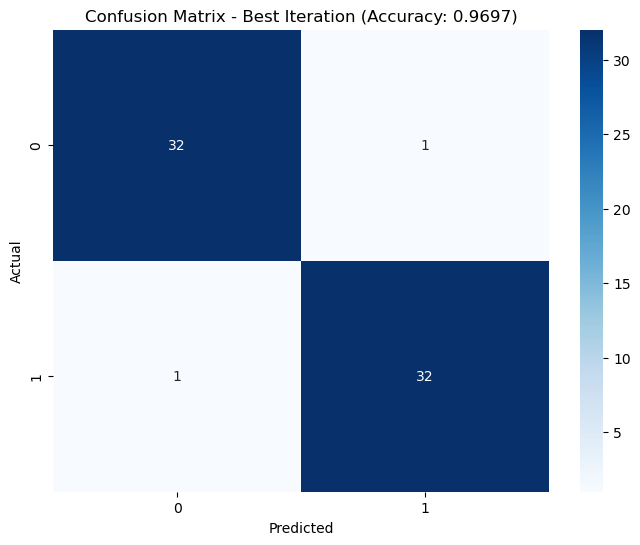

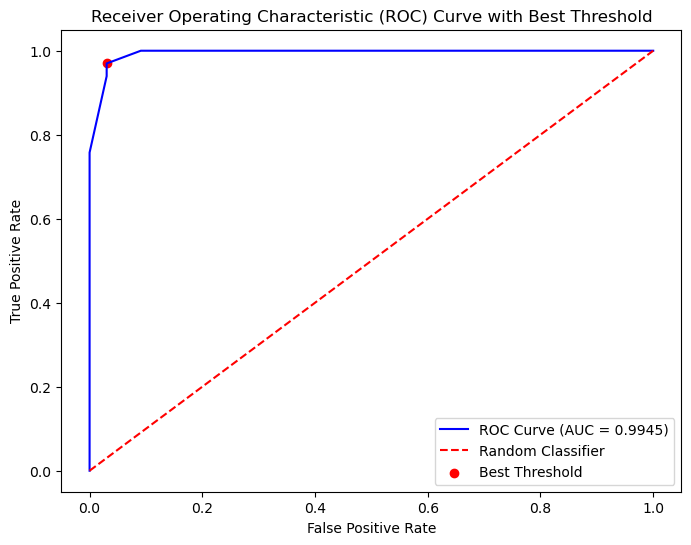

Best Threshold KNN: 0.6
Sensitivity (TPR) at Best Threshold KNN: 0.9696969696969697
Specificity at Best Threshold KNN: 0.9696969696969697
FPR at Best Threshold KNN: 0.030303030303030304


In [182]:
# Find the best iteration based on ROC AUC
best_index_knn = np.argmax(roc_aucs_knn)
best_fpr_knn = fprs_knn[best_index_knn]
best_tpr_knn = tprs_knn[best_index_knn]
best_thresholds_knn = thresholds_list_knn[best_index_knn]
best_roc_auc_knn = roc_aucs_knn[best_index_knn]

# Determine the best threshold using Youden's J statistic
J_knn = best_tpr_knn - best_fpr_knn
best_threshold_index_knn = np.argmax(J_knn)
best_threshold_knn = best_thresholds_knn[best_threshold_index_knn]

# Visualize confusion matrix and ROC curve for the best iteration
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrixes_knn[best_index_knn], annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Best Iteration (Accuracy: {accuracy_scores_knn[best_index_knn]:.4f})')
plt.show()

# Plot ROC curve with the best threshold
plt.figure(figsize=(8,6))
plt.plot(best_fpr_knn, best_tpr_knn, color='blue', label=f'ROC Curve (AUC = {best_roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.scatter(best_fpr_knn[best_threshold_index_knn], best_tpr_knn[best_threshold_index_knn], color='red', label='Best Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Best Threshold')
plt.legend(loc="lower right")
plt.show()

print("Best Threshold KNN:", best_threshold_knn)
print("Sensitivity (TPR) at Best Threshold KNN:", best_tpr_knn[best_threshold_index_knn])
print("Specificity at Best Threshold KNN:", 1 - best_fpr_knn[best_threshold_index_knn])
print("FPR at Best Threshold KNN:", best_fpr_knn[best_threshold_index_knn])

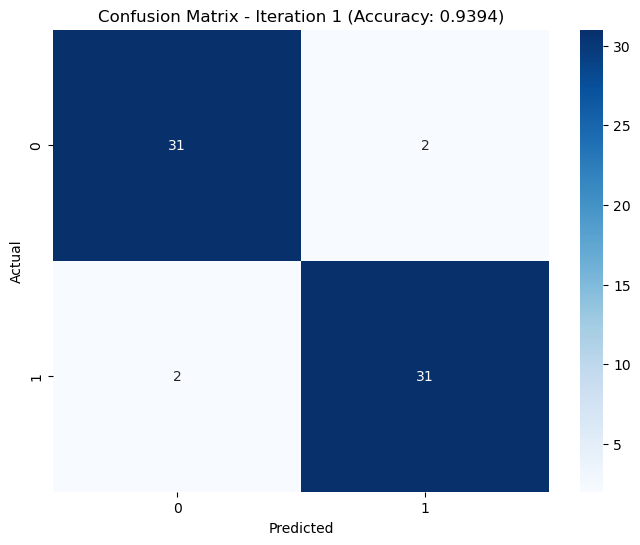

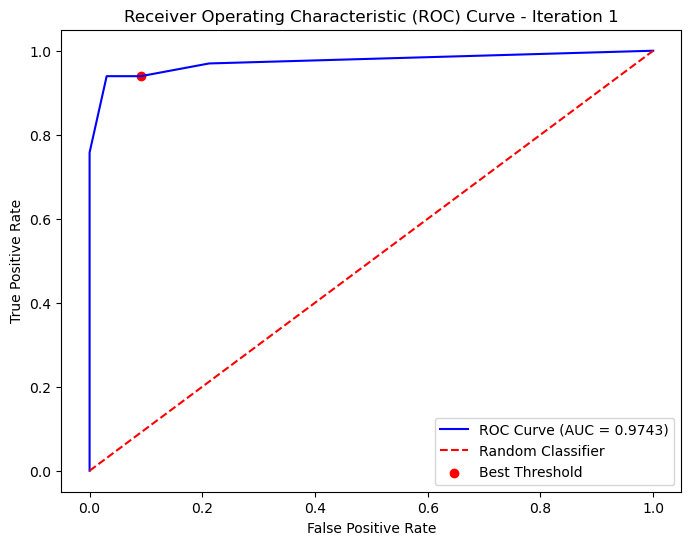

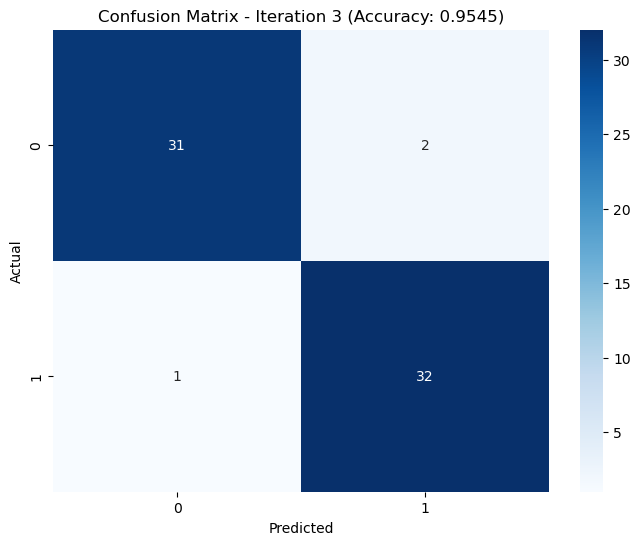

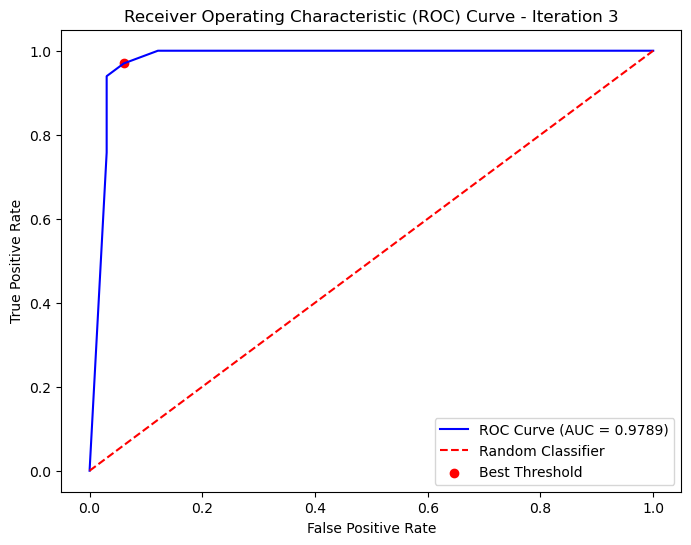

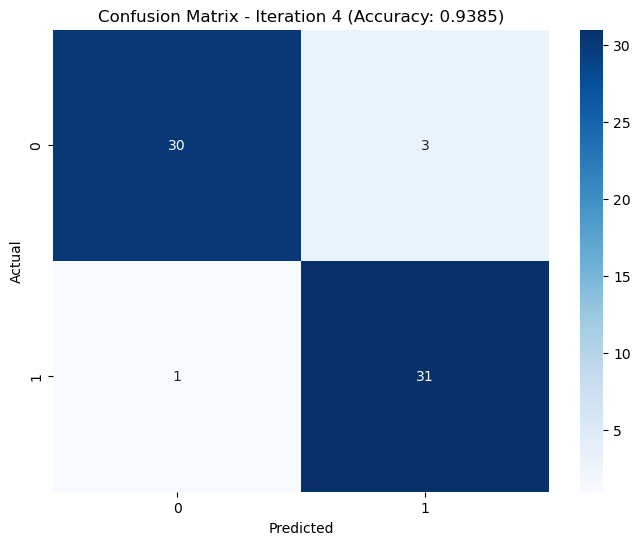

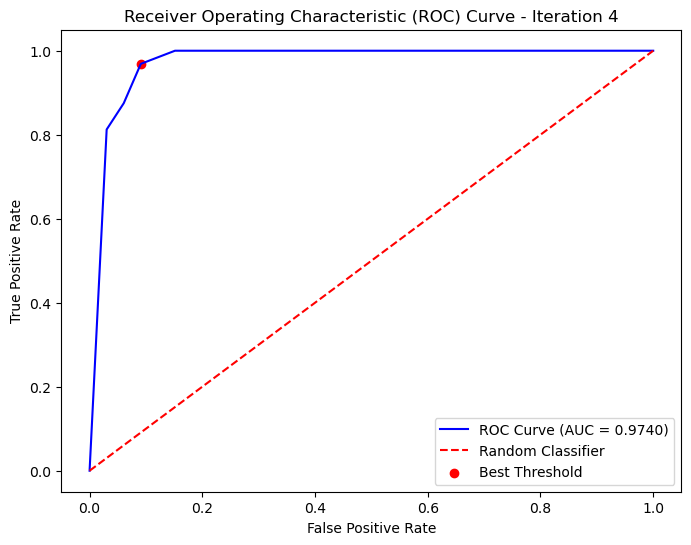

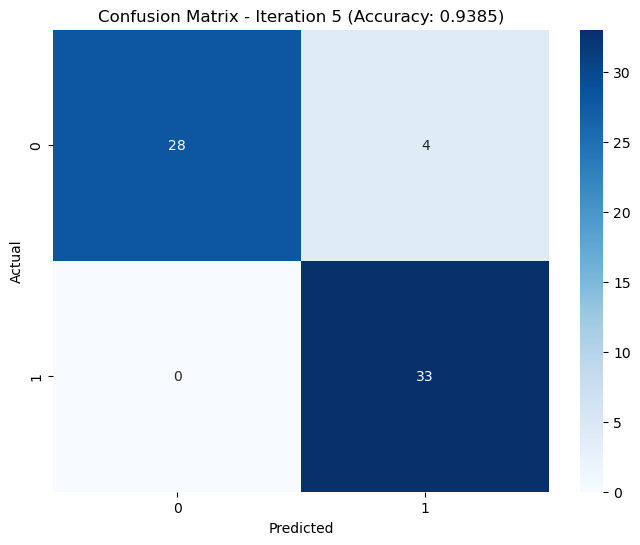

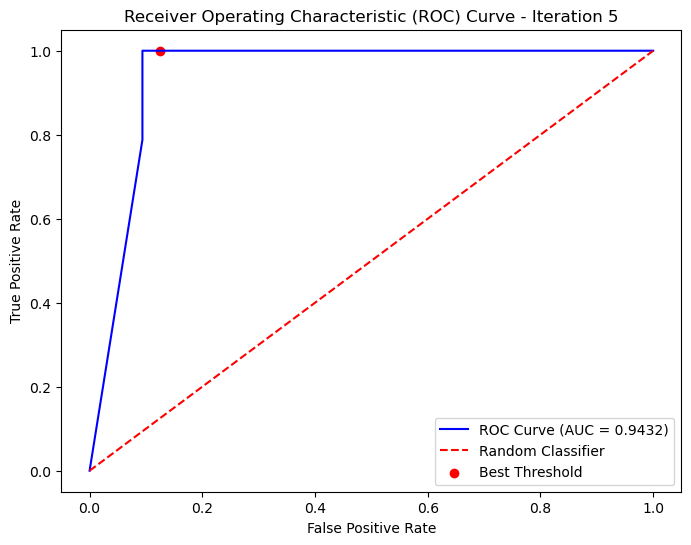

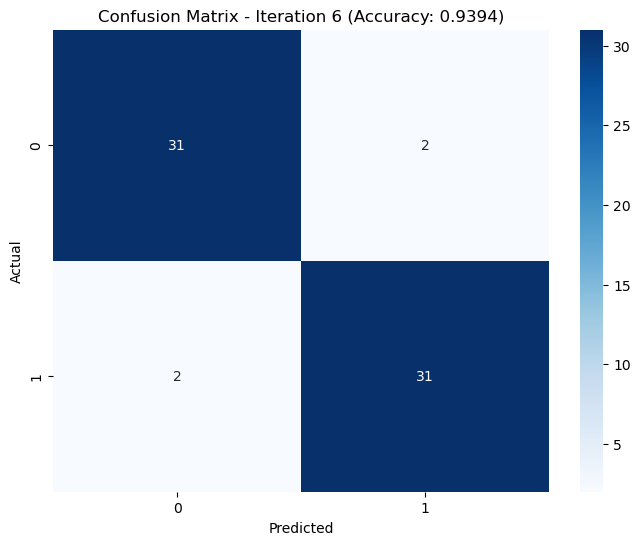

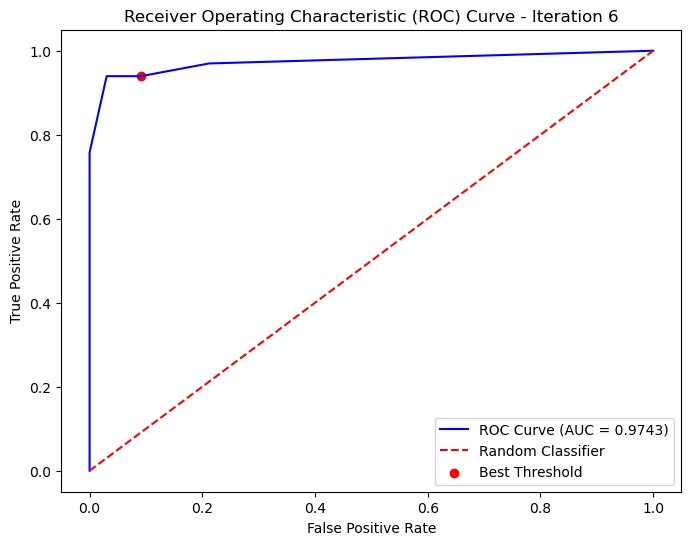

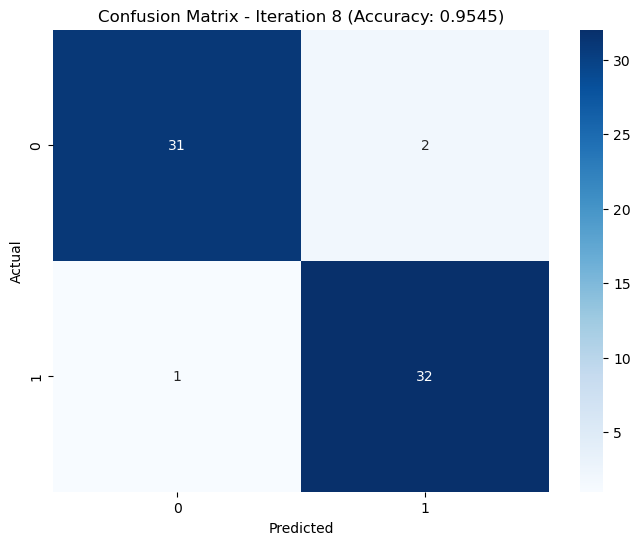

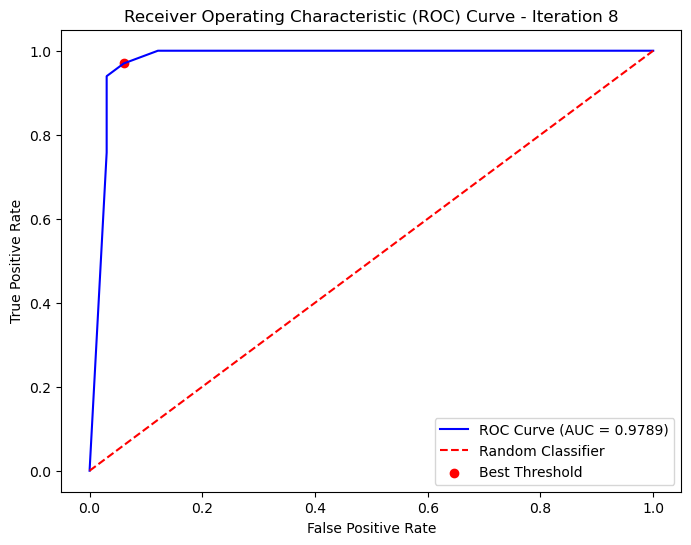

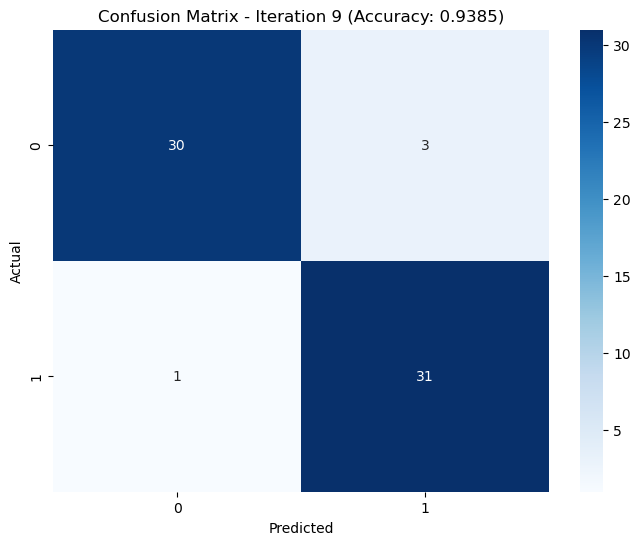

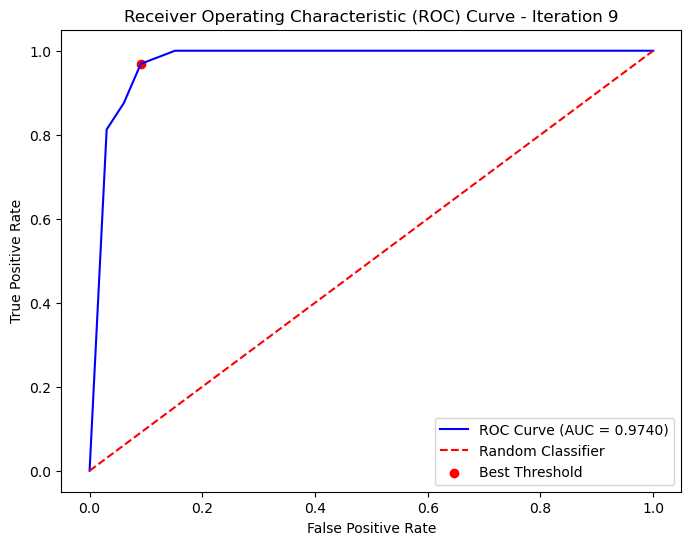

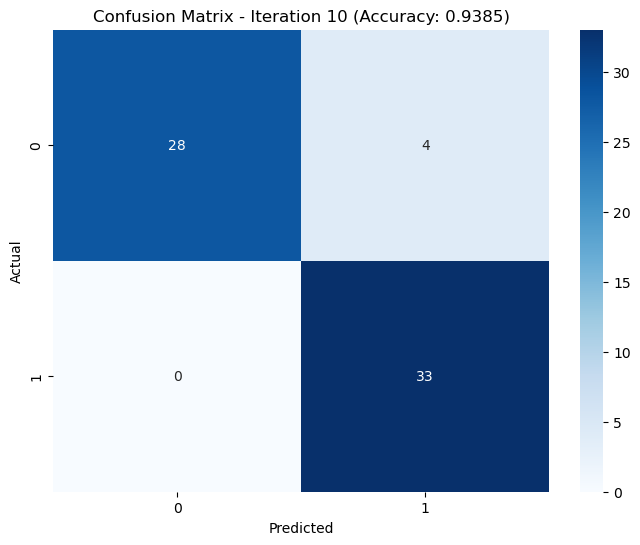

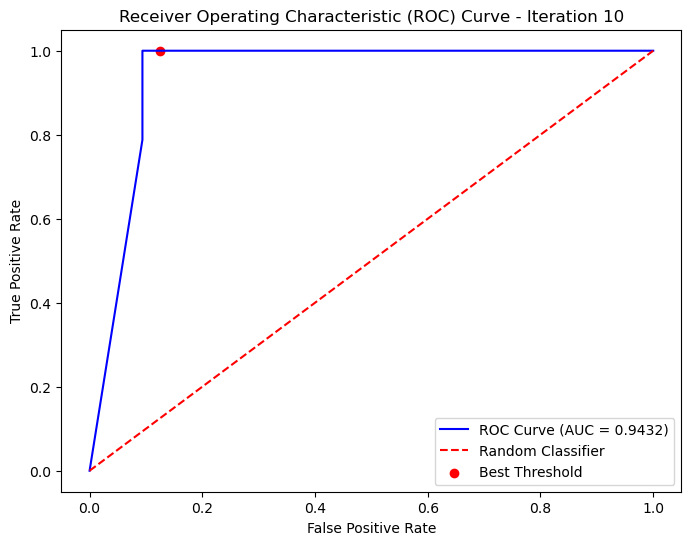

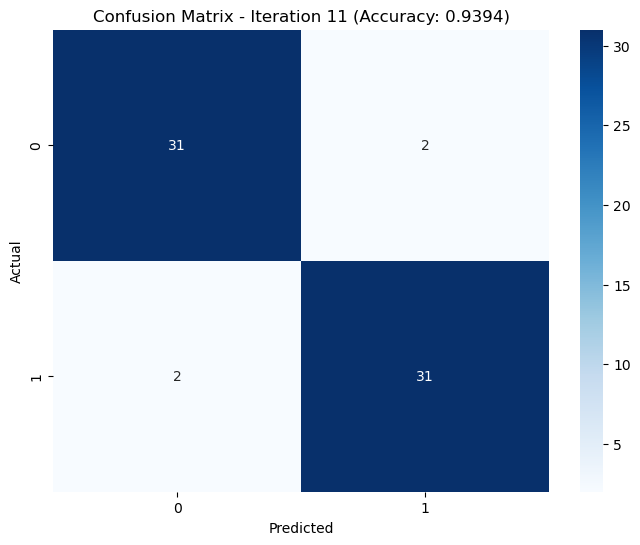

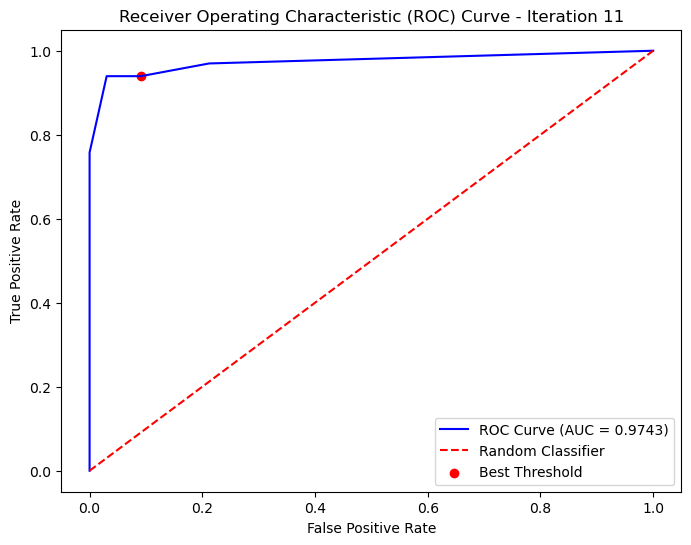

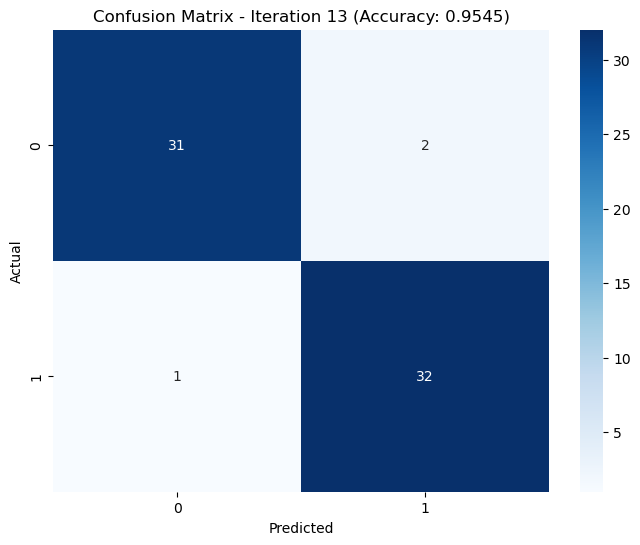

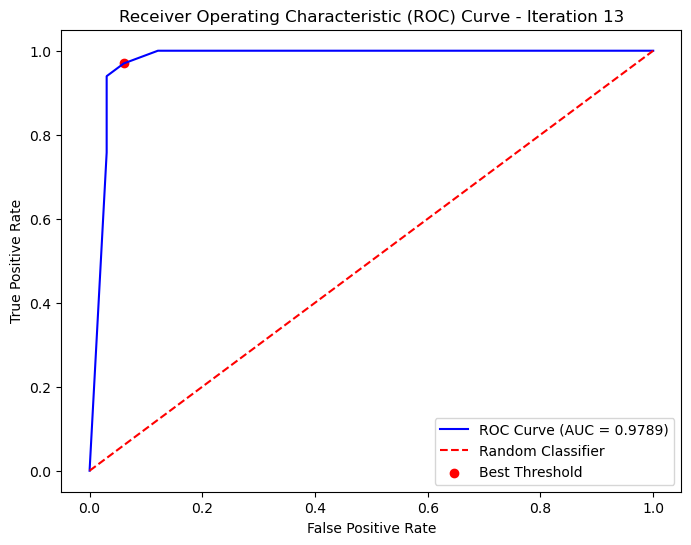

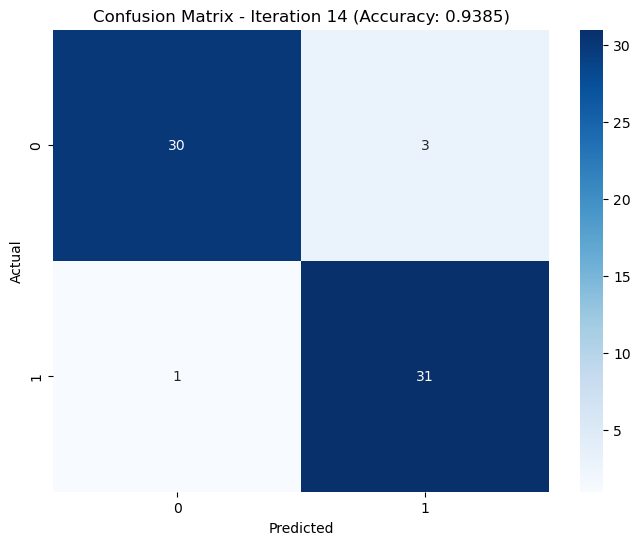

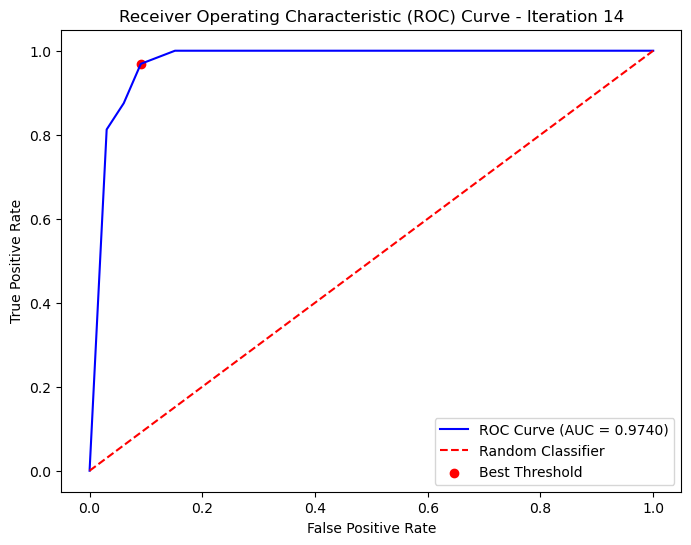

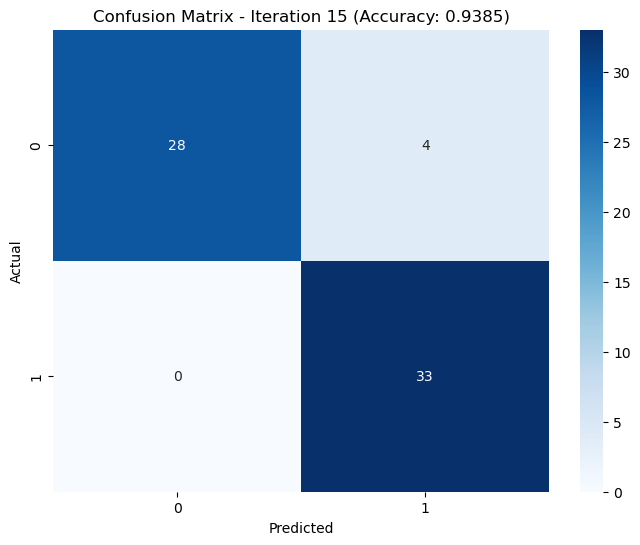

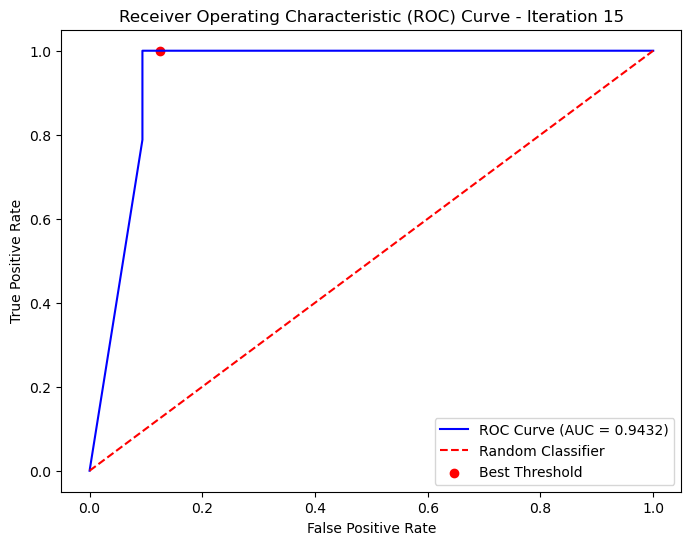

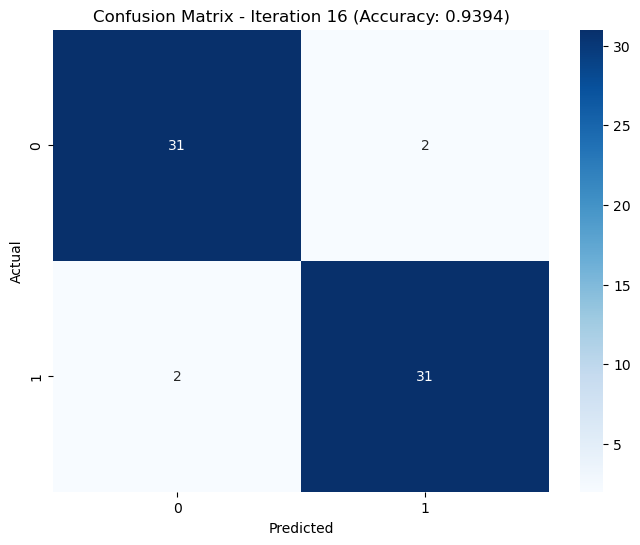

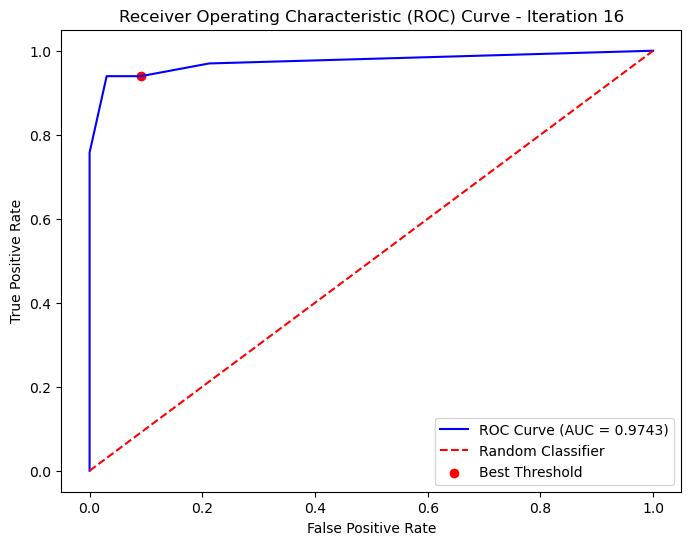

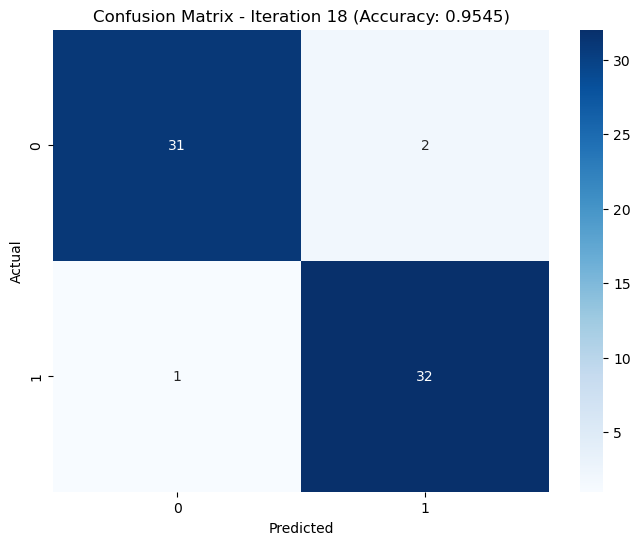

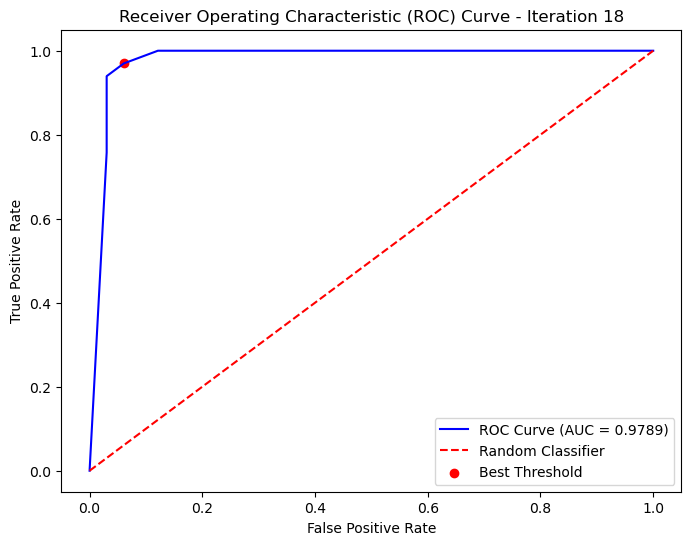

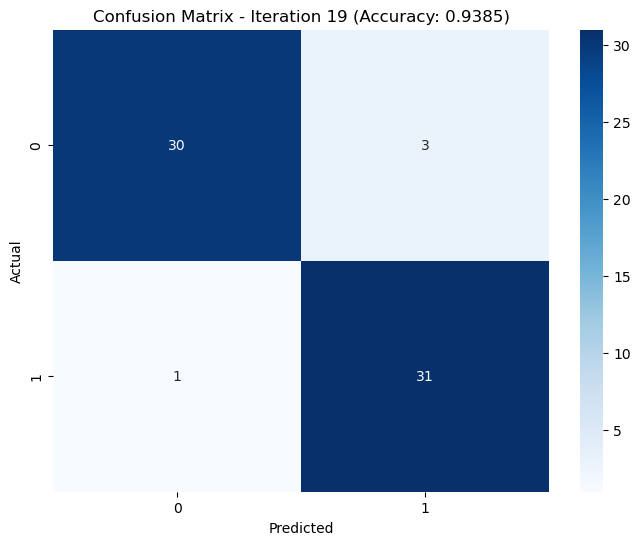

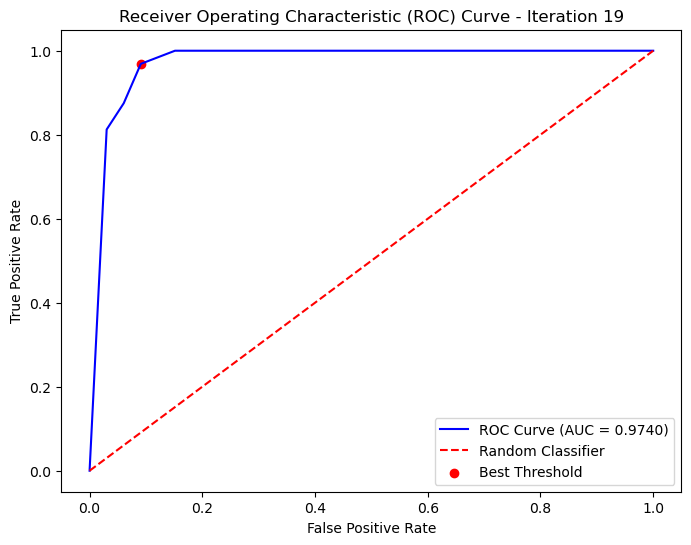

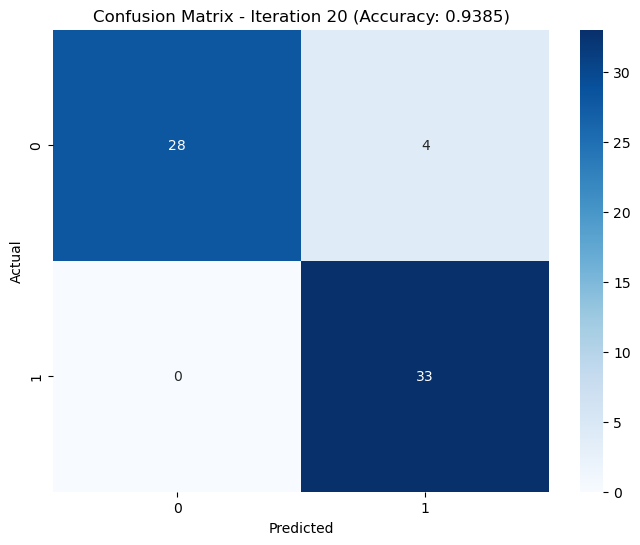

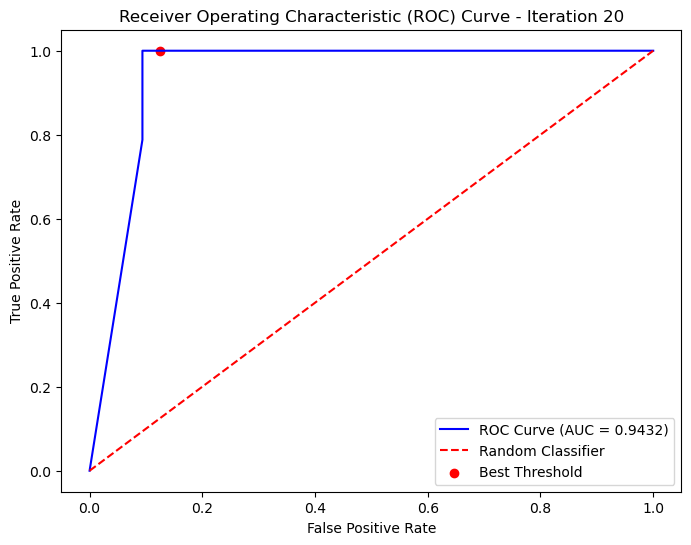

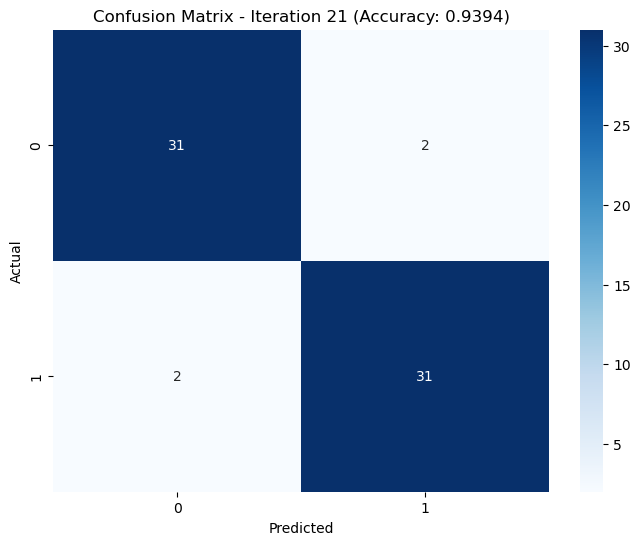

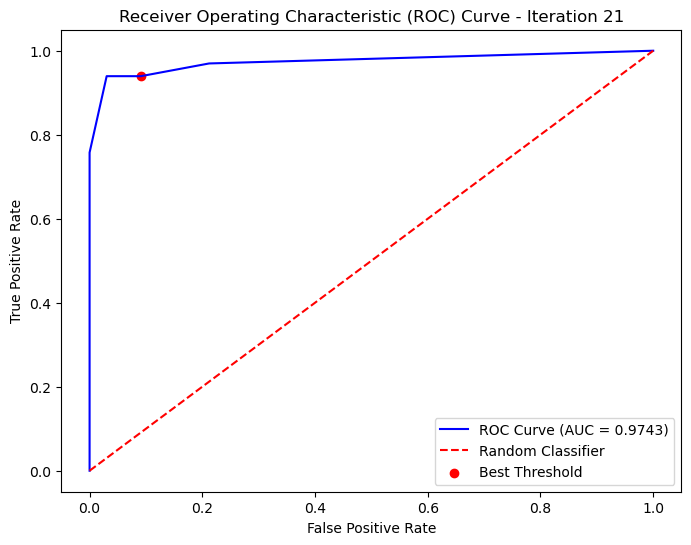

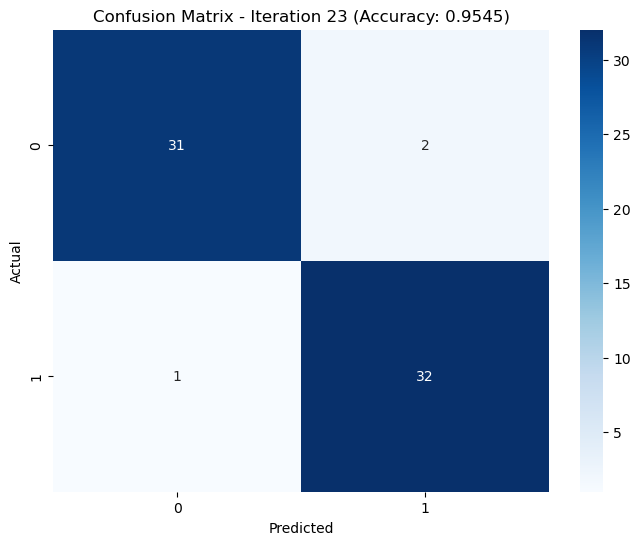

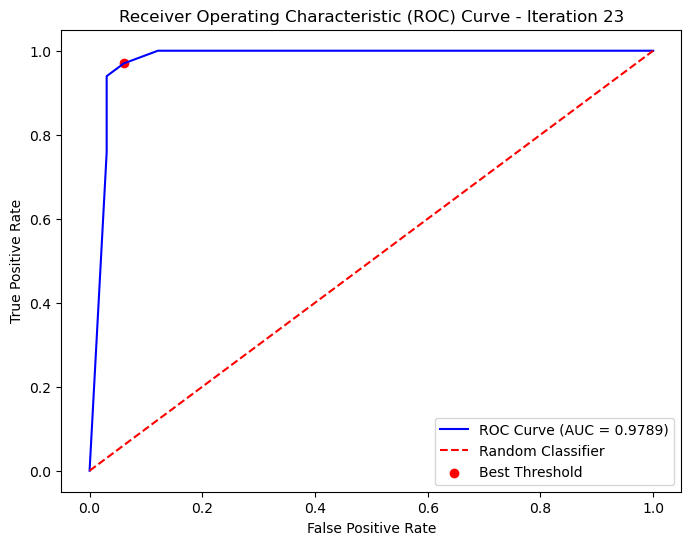

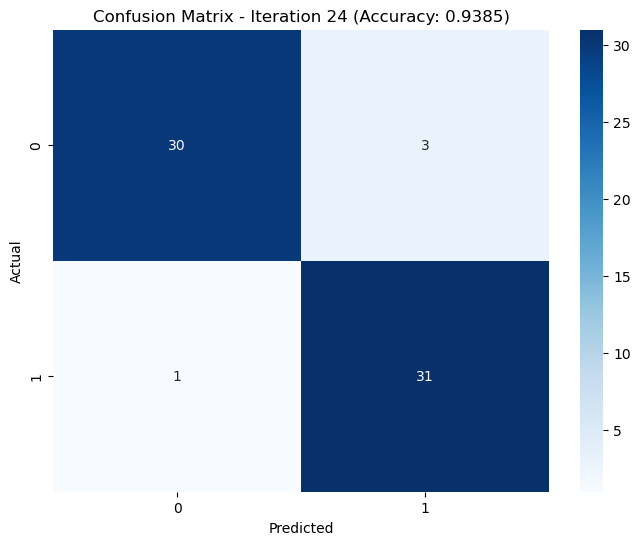

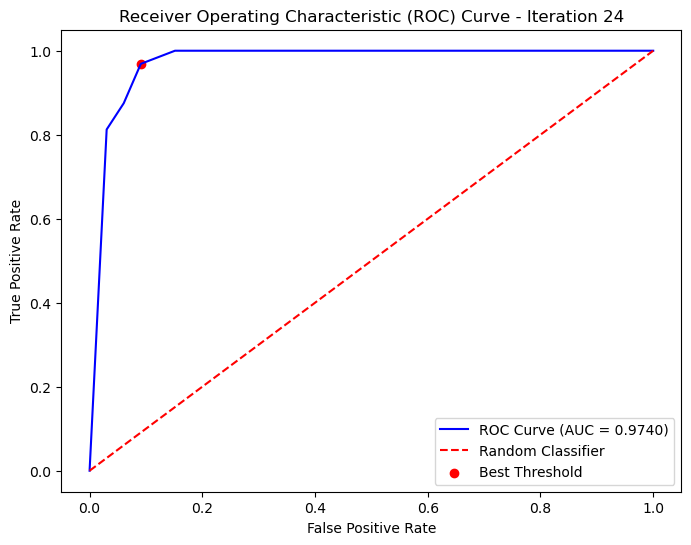

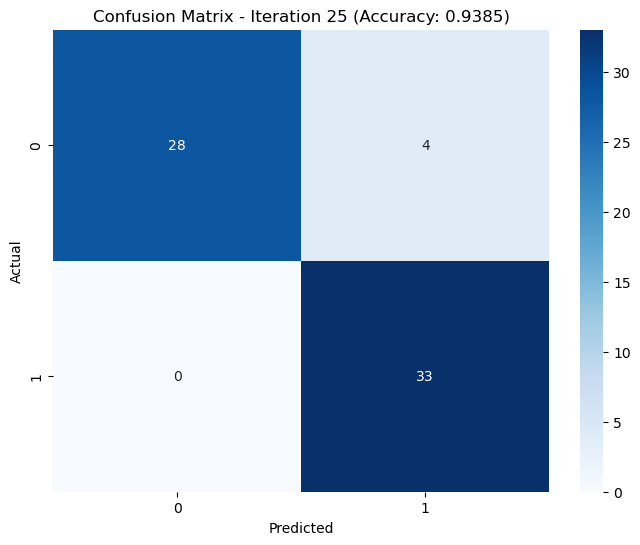

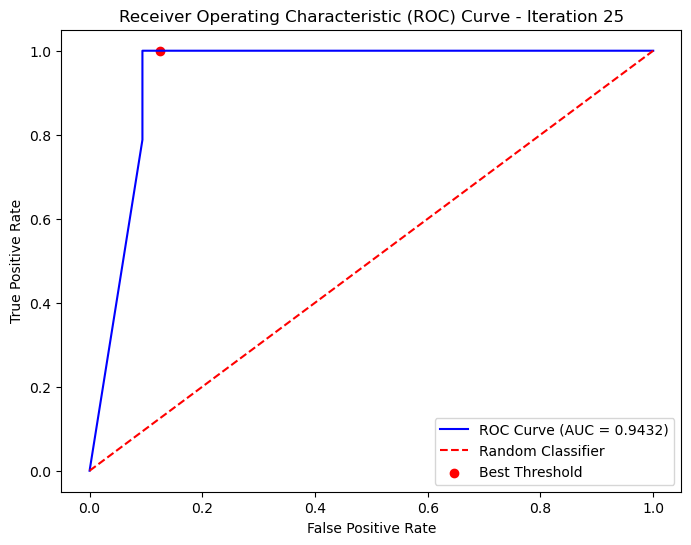

Best Threshold KNN: 0.6
Sensitivity (TPR) at Best Threshold KNN: 0.9696969696969697
Specificity at Best Threshold KNN: 0.9696969696969697
FPR at Best Threshold KNN: 0.030303030303030304


In [183]:
# Find the best iteration based on ROC AUC
best_index_knn = np.argmax(roc_aucs_knn)
best_fpr_knn = fprs_knn[best_index_knn]
best_tpr_knn = tprs_knn[best_index_knn]
best_thresholds_knn = thresholds_list_knn[best_index_knn]
best_roc_auc_knn = roc_aucs_knn[best_index_knn]

# Determine the best threshold using Youden's J statistic
J_knn = best_tpr_knn - best_fpr_knn
best_threshold_index_knn = np.argmax(J_knn)
best_threshold_knn = best_thresholds_knn[best_threshold_index_knn]

# Visualize confusion matrices and ROC curves for iterations with accuracy equal to average accuracy
for i, (cm, accuracy, fpr, tpr, roc_auc) in enumerate(zip(confusion_matrixes_knn, accuracy_scores_knn, fprs_knn, tprs_knn, roc_aucs_knn)):
    if np.isclose(accuracy, avg_accuracy_knn, atol=1e-2):  # using np.isclose for comparison with a tolerance
        # Plot confusion matrix
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - Iteration {i+1} (Accuracy: {accuracy:.4f})')
        plt.show()
        
        # Plot ROC curve
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
        plt.scatter(fpr[best_threshold_index_knn], tpr[best_threshold_index_knn], color='red', label='Best Threshold')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - Iteration {i+1}')
        plt.legend()
        plt.show()

# Best threshold and related metrics
print("Best Threshold KNN:", best_threshold_knn)
print("Sensitivity (TPR) at Best Threshold KNN:", best_tpr_knn[best_threshold_index_knn])
print("Specificity at Best Threshold KNN:", 1 - best_fpr_knn[best_threshold_index_knn])
print("FPR at Best Threshold KNN:", best_fpr_knn[best_threshold_index_knn])


# KNN with K Fold Cross Validation

In [184]:
# Definisikan jumlah fold
k = 5

# Initialize an empty list to store the accuracy scores
accuracy_scores_knn2 = []
sensitivitas_scores_knn2 = []
spesifisitas_scores_knn2 = []
confusion_matrixes_knn2 = []
classification_reports_knn2 = []
roc_aucs_knn2 = []
fprs_knn2 = []
tprs_knn2 = []
thresholds_list_knn2 = []

In [185]:
# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

n_iterations = 5
for _ in range(n_iterations):
    # Split the data into training and testing sets
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train a K Nearest Neighbors (KNN) model
        knn_model = KNeighborsClassifier()
        knn_model.fit(X_train, y_train)

        # Evaluate the model on the testing set
        y_pred = knn_model.predict(X_test)
        y_prob = knn_model.predict_proba(X_test)[:, 1]
        accuracy_knn = accuracy_score(y_test, y_pred)
        accuracy_scores_knn2.append(accuracy_knn)
        
        # Hitung sensitivitas, spesifisitas
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivitas = tp / (tp + fn)
        spesifisitas = tn / (tn + fp)
        
        sensitivitas_scores_knn2.append(sensitivitas)
        spesifisitas_scores_knn2.append(spesifisitas)
        confusion_matrixes_knn2.append(cm)
        classification_reports_knn2.append(classification_report(y_test, y_pred, output_dict=True))
        
        # ROC and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        fprs_knn2.append(fpr)
        tprs_knn2.append(tpr)
        roc_aucs_knn2.append(roc_auc)
        thresholds_list_knn2.append(thresholds)

In [187]:
# Display average results
avg_accuracy_knn2 = np.mean(accuracy_scores_knn2)
avg_sensitivitas_knn2 = np.mean(sensitivitas_scores_knn2)
avg_spesifisitas_knn2 = np.mean(spesifisitas_scores_knn2)
avg_roc_auc_knn2 = np.mean(roc_aucs_knn2)

# Function to calculate average classification report
def average_classification_reports(reports):
    avg_report = defaultdict(dict)
    
    for report in reports:
        for label, metrics in report.items():
            if isinstance(metrics, dict):
                for metric, value in metrics.items():
                    if metric not in avg_report[label]:
                        avg_report[label][metric] = []
                    avg_report[label][metric].append(value)
            else:
                if label not in avg_report:
                    avg_report[label] = []
                avg_report[label].append(metrics)
    
    for label, metrics in avg_report.items():
        if isinstance(metrics, list):
            avg_report[label] = np.mean(metrics)
        else:
            for metric, values in metrics.items():
                avg_report[label][metric] = np.mean(values)
    
    return avg_report

# Calculate and display average classification report
avg_class_report_knn2 = average_classification_reports(classification_reports_knn2)

# Convert to DataFrame for better visualization
df_report_knn2 = pd.DataFrame(avg_class_report_knn2).T

print(f'Average Accuracy KNN: {avg_accuracy_knn2}')
print(f'Average Sensitivitas KNN: {avg_sensitivitas_knn2}')
print(f'Average Spesifisitas KNN: {avg_spesifisitas_knn2}')
print(f'Average ROC AUC KNN: {avg_roc_auc_knn2}')
print(df_report_knn2)

Average Accuracy KNN: 0.9543589743589743
Average Sensitivitas KNN: 0.9608387670887671
Average Spesifisitas KNN: 0.9497210953346857
Average ROC AUC KNN: 0.9756371092622359
              precision    recall  f1-score    support
0              0.963910  0.949721  0.956539  32.800000
1              0.941741  0.960839  0.950769  32.800000
accuracy       0.954359  0.954359  0.954359   0.954359
macro avg      0.952825  0.955280  0.953654  65.600000
weighted avg   0.955435  0.954359  0.954524  65.600000


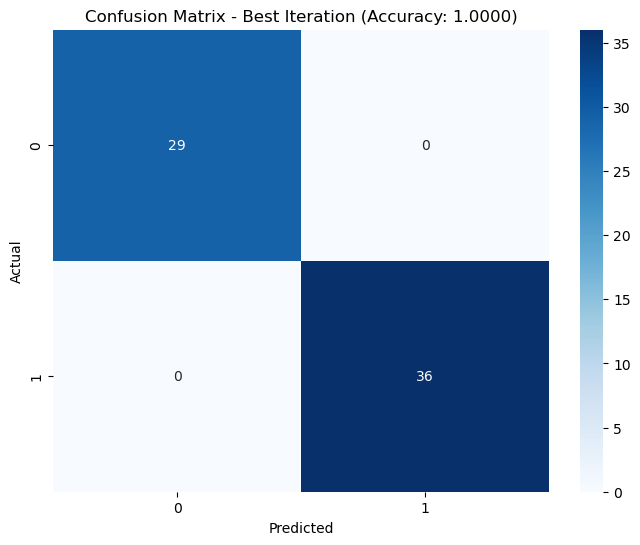

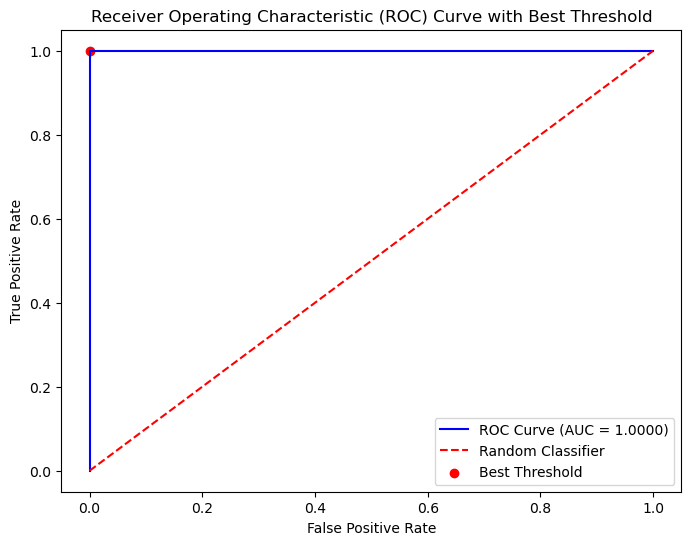

Best Threshold KNN: 0.6
Sensitivity (TPR) at Best Threshold KNN: 1.0
Specificity at Best Threshold KNN: 1.0
FPR at Best Threshold KNN: 0.0


In [190]:
# Find the best iteration based on ROC AUC
best_index_knn2 = np.argmax(roc_aucs_knn2)
best_fpr_knn2 = fprs_knn2[best_index_knn2]
best_tpr_knn2 = tprs_knn2[best_index_knn2]
best_thresholds_knn2 = thresholds_list_knn2[best_index_knn2]
best_roc_auc_knn2 = roc_aucs_knn2[best_index_knn2]

# Determine the best threshold using Youden's J statistic
J_knn2 = best_tpr_knn2 - best_fpr_knn2
best_threshold_index_knn2 = np.argmax(J_knn2)
best_threshold_knn2 = best_thresholds_knn2[best_threshold_index_knn2]

# Visualize confusion matrix and ROC curve for the best iteration
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrixes_knn2[best_index_knn2], annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Best Iteration (Accuracy: {accuracy_scores_knn2[best_index_knn2]:.4f})')
plt.show()

# Plot ROC curve with the best threshold
plt.figure(figsize=(8,6))
plt.plot(best_fpr_knn2, best_tpr_knn2, color='blue', label=f'ROC Curve (AUC = {best_roc_auc_knn2:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.scatter(best_fpr_knn2[best_threshold_index_knn2], best_tpr_knn2[best_threshold_index_knn2], color='red', label='Best Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Best Threshold')
plt.legend(loc="lower right")
plt.show()

# Best threshold and related metrics
print("Best Threshold KNN:", best_threshold_knn2)
print("Sensitivity (TPR) at Best Threshold KNN:", best_tpr_knn2[best_threshold_index_knn2])
print("Specificity at Best Threshold KNN:", 1 - best_fpr_knn2[best_threshold_index_knn2])
print("FPR at Best Threshold KNN:", best_fpr_knn2[best_threshold_index_knn2])


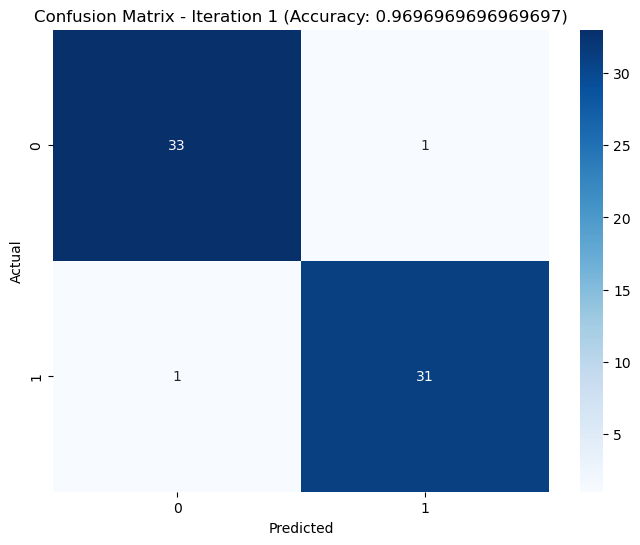

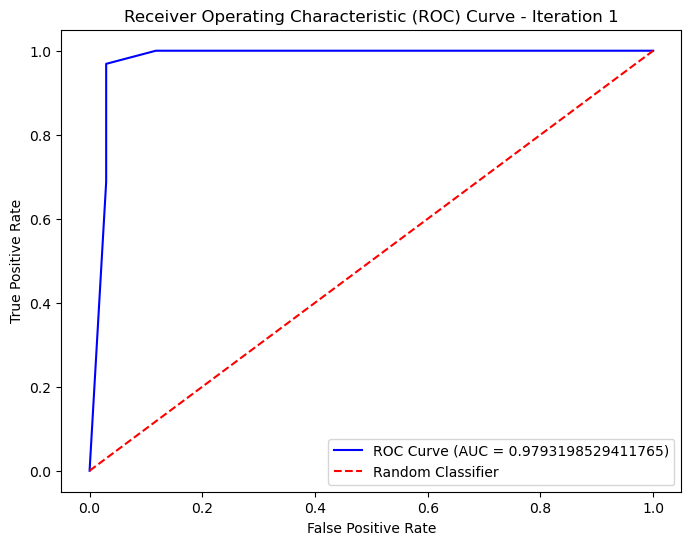

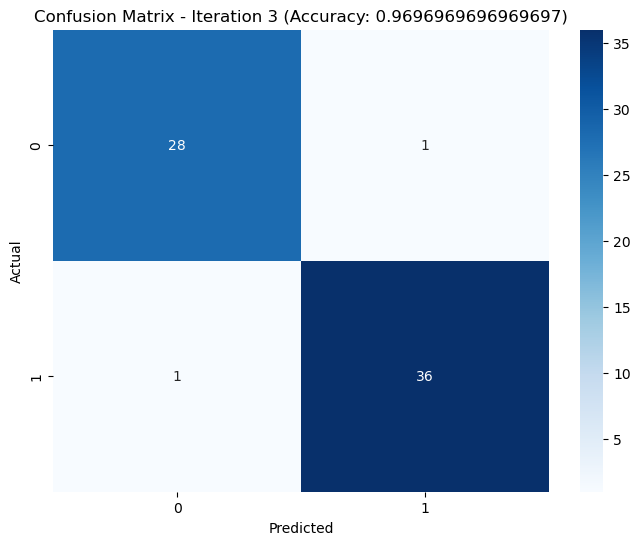

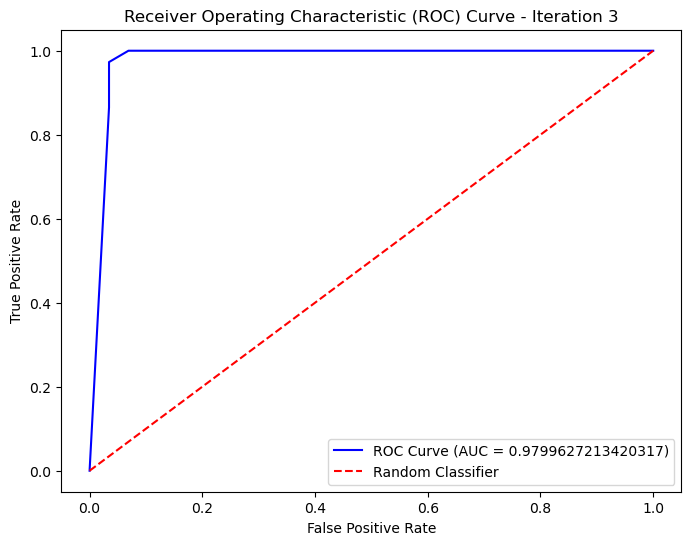

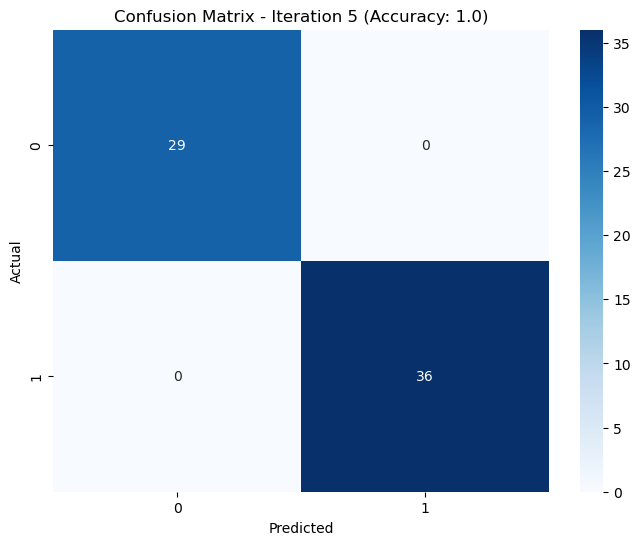

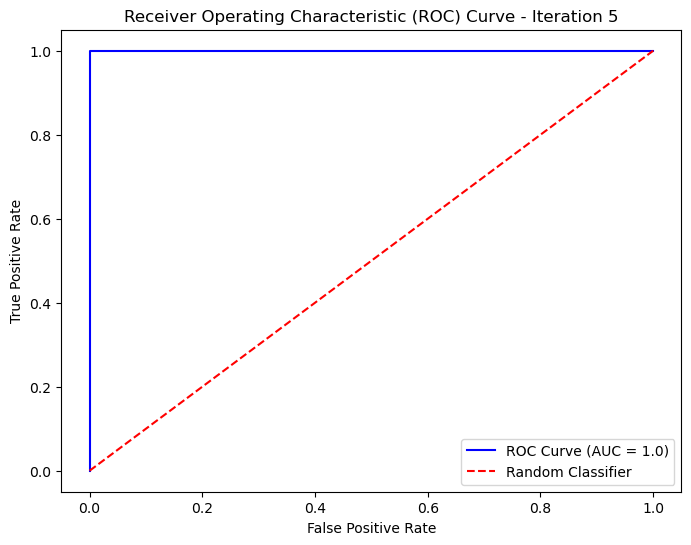

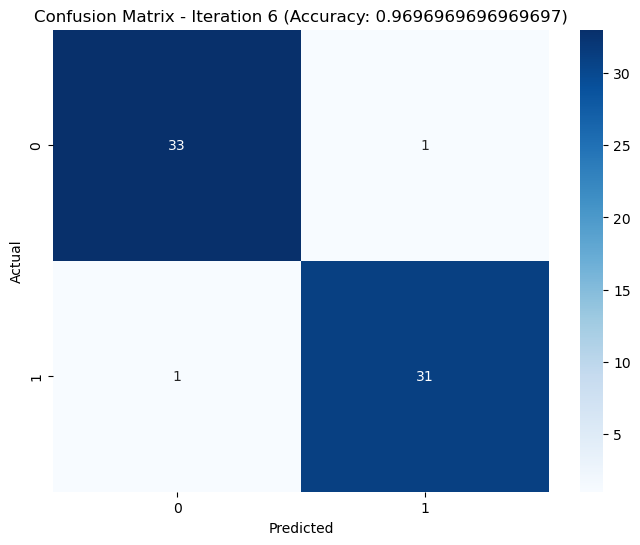

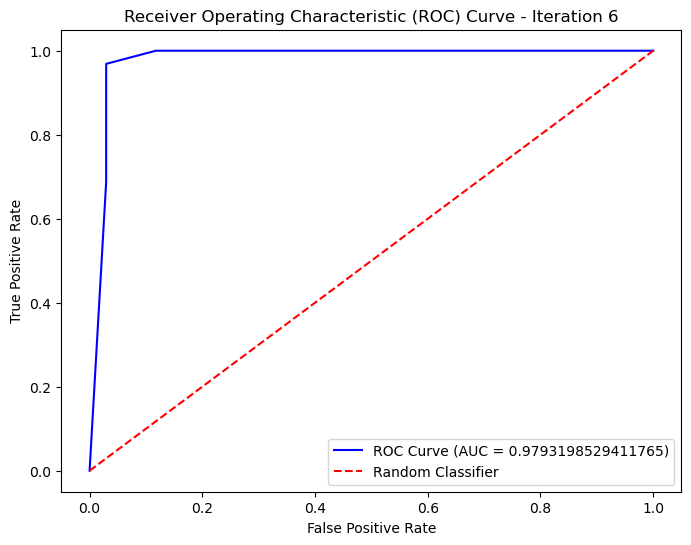

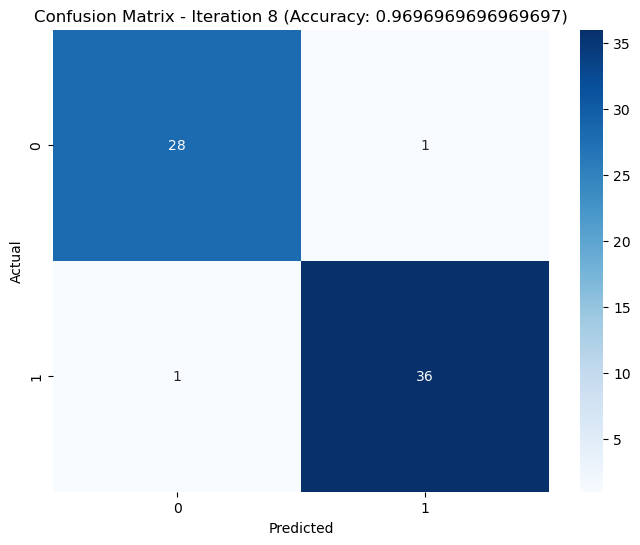

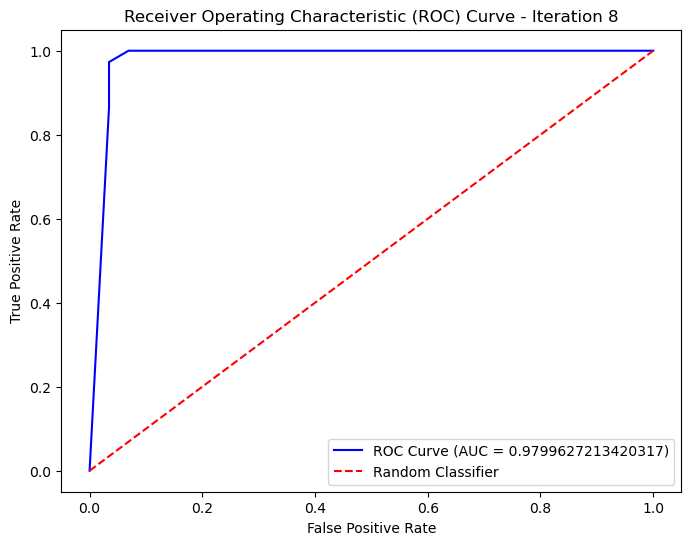

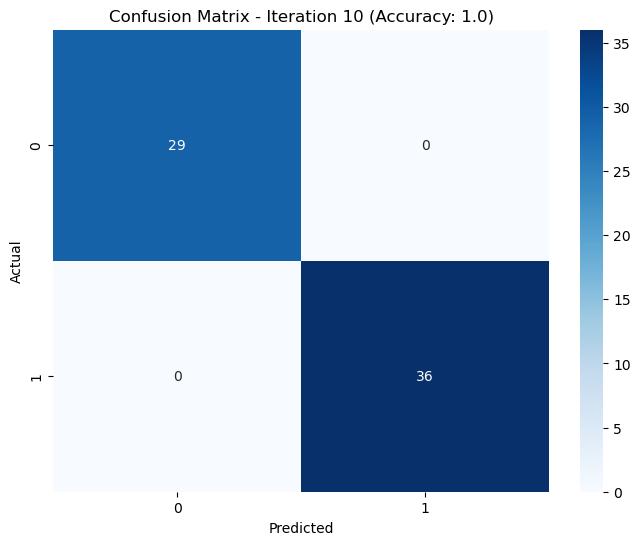

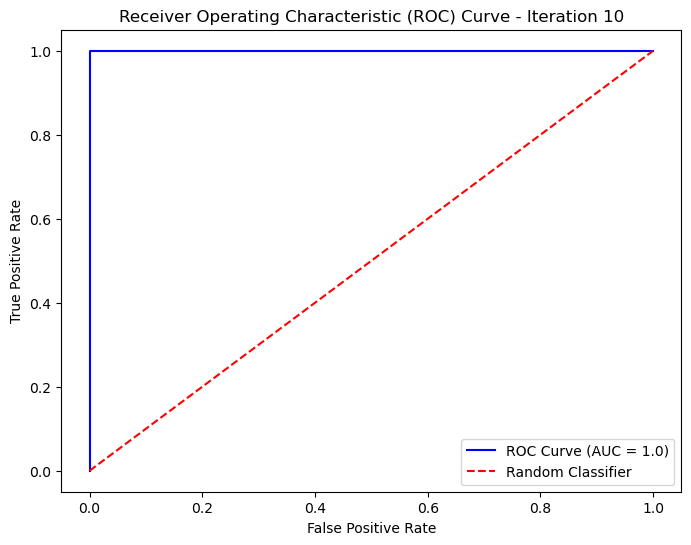

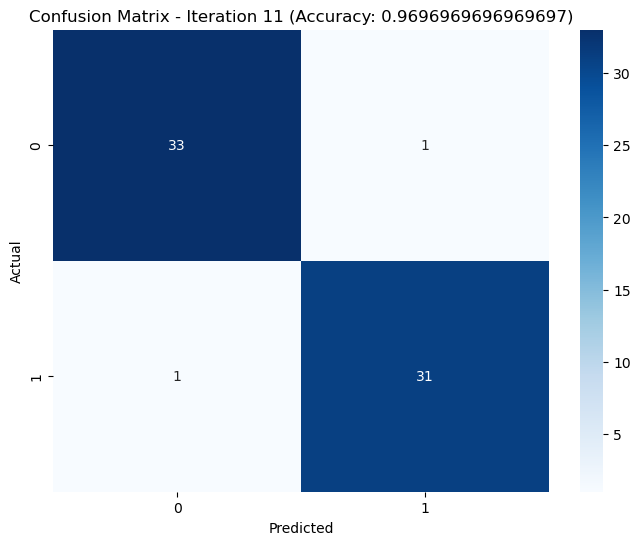

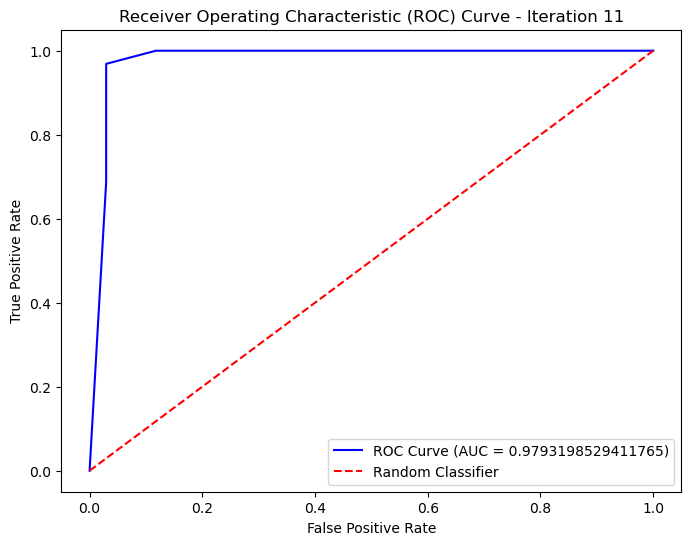

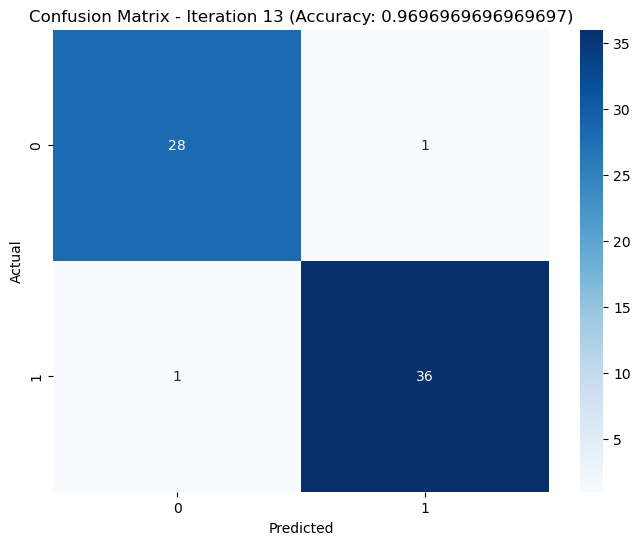

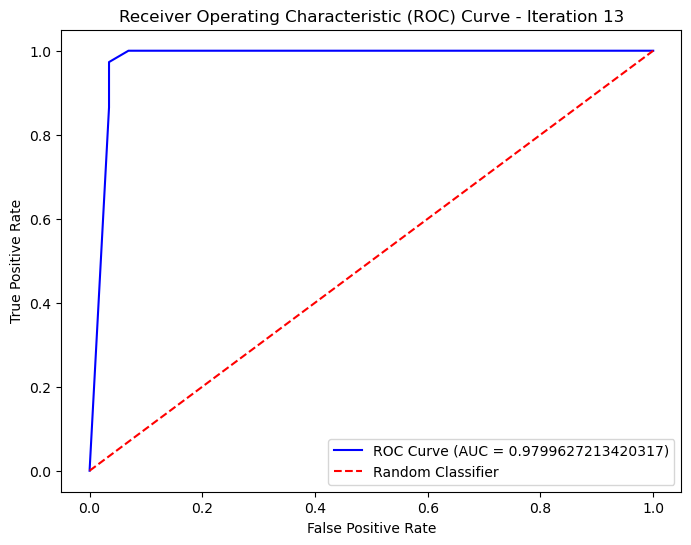

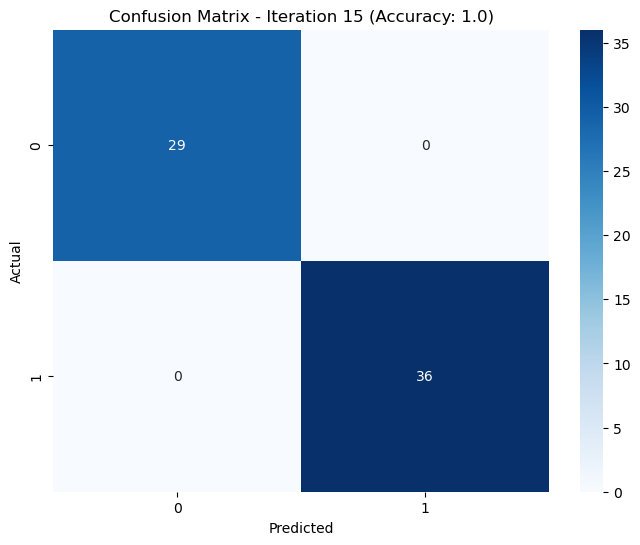

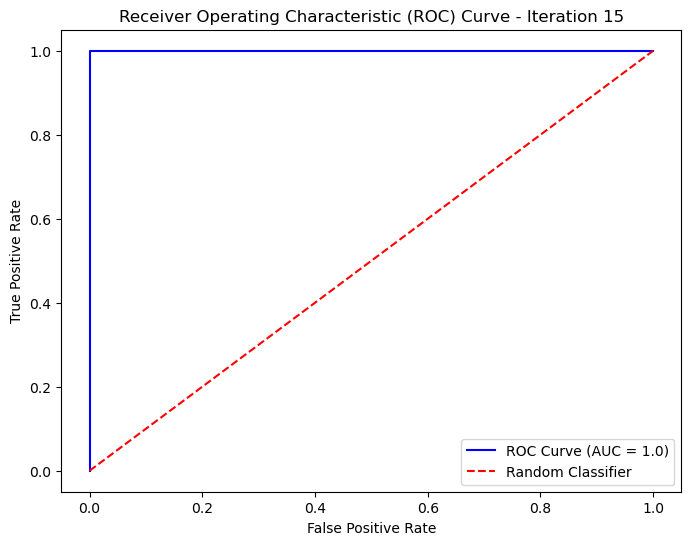

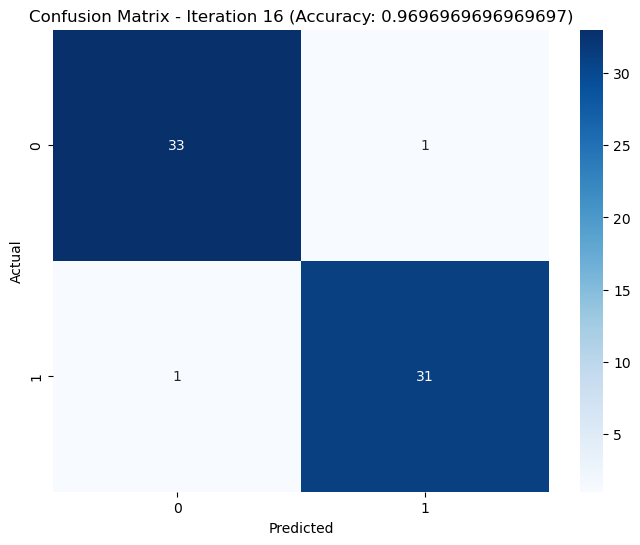

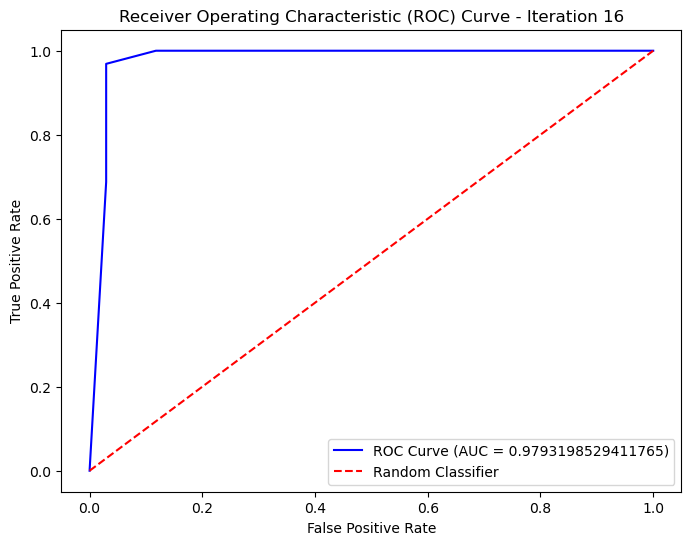

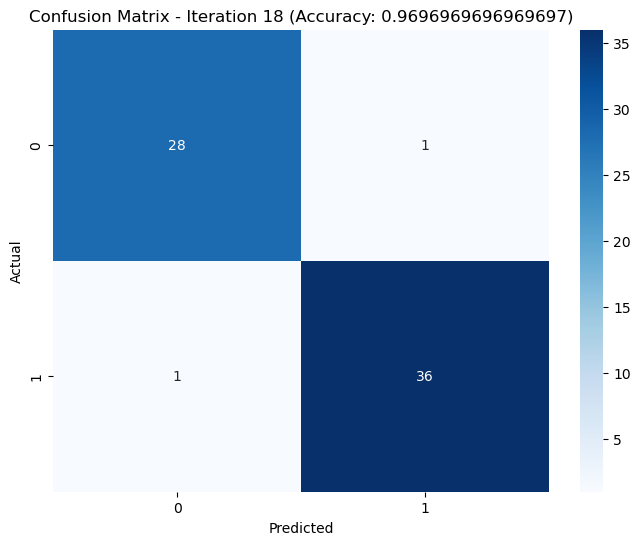

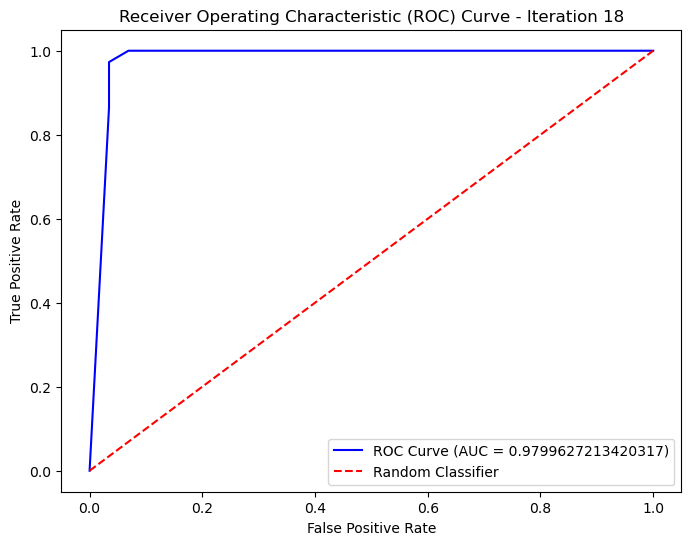

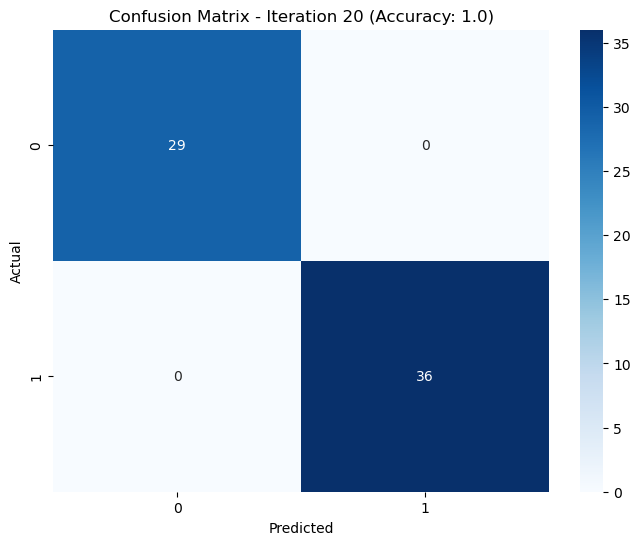

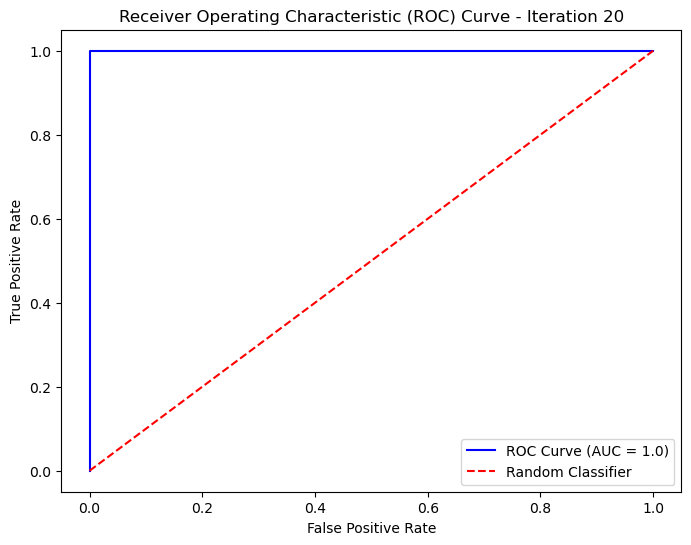

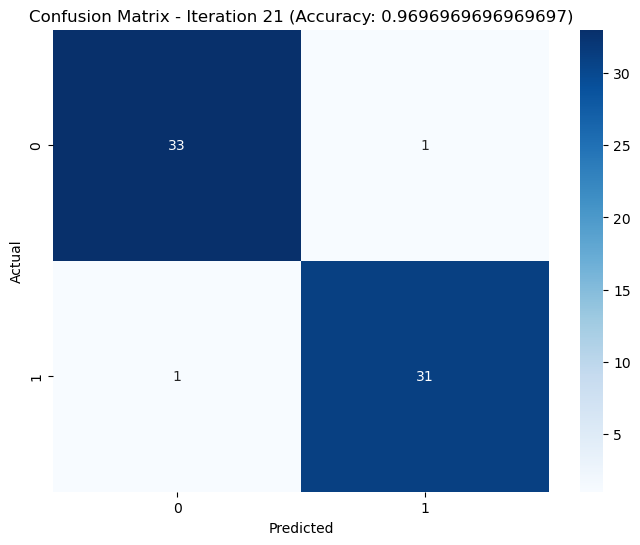

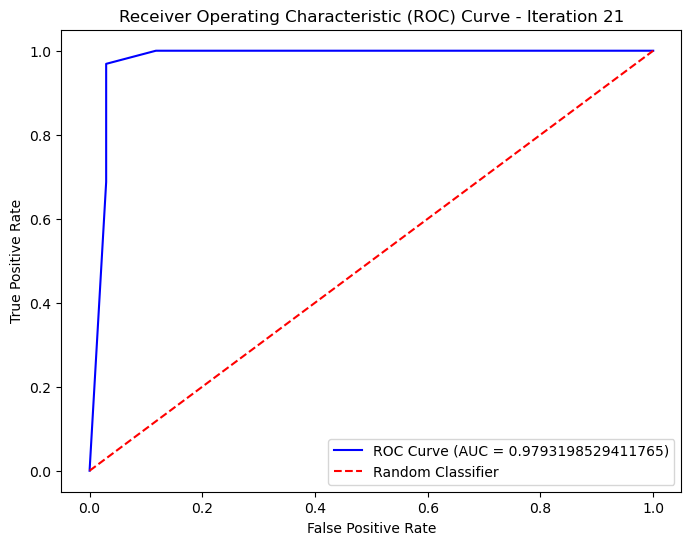

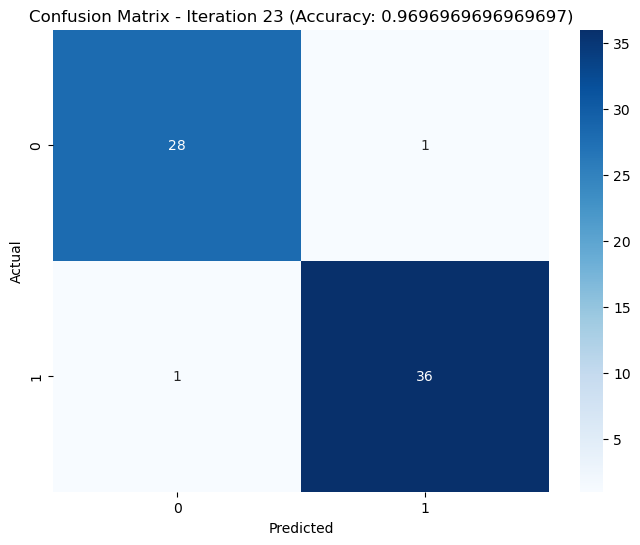

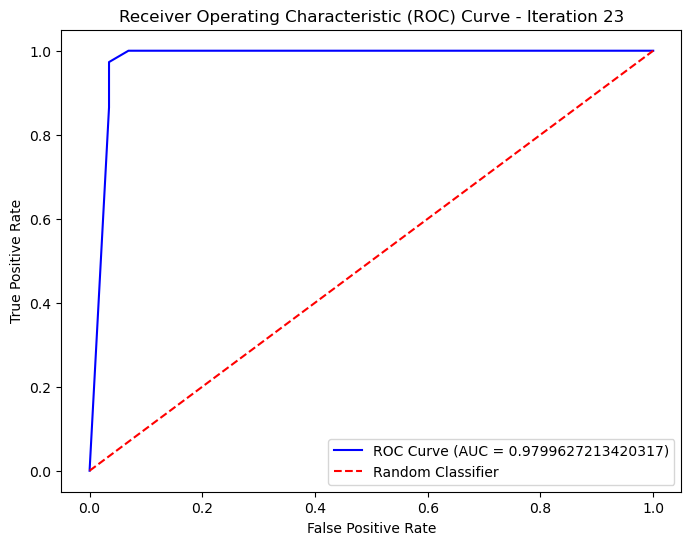

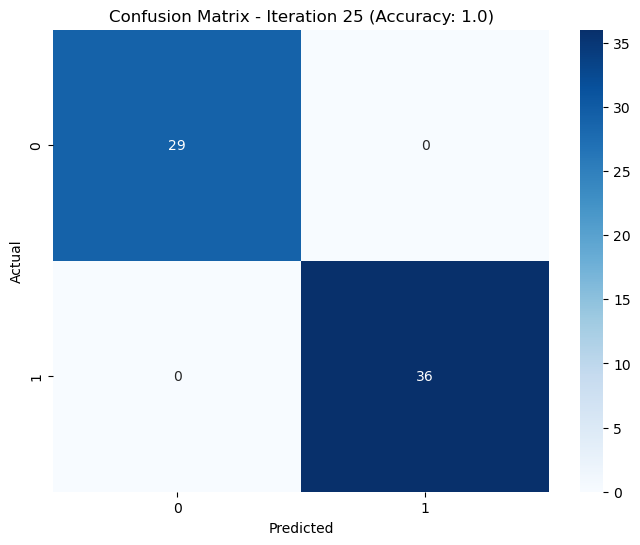

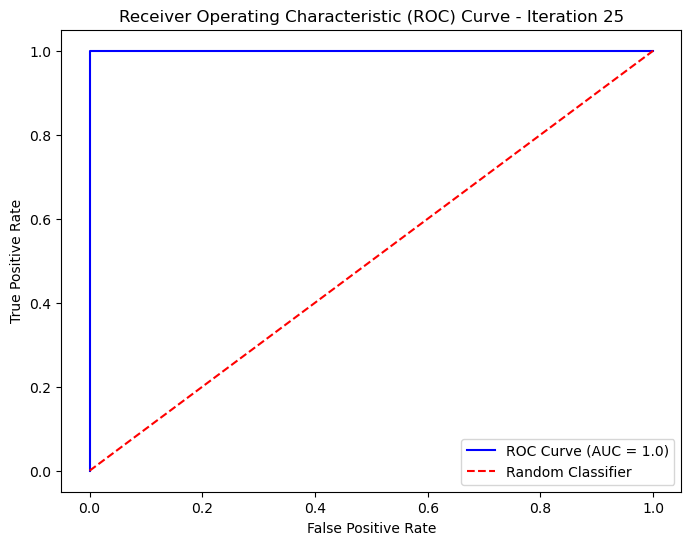

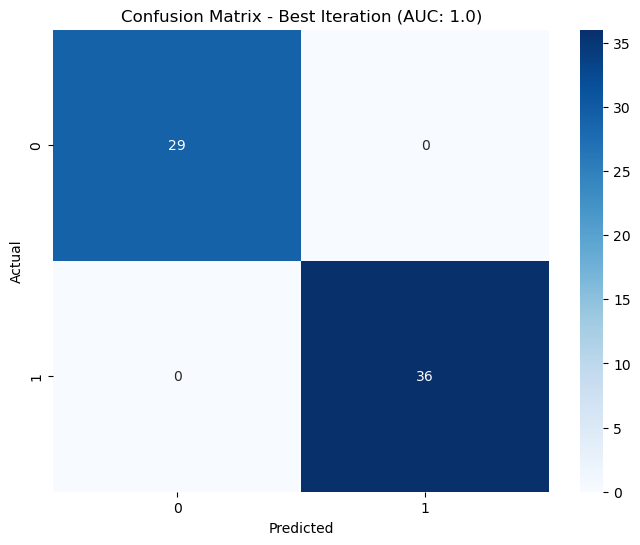

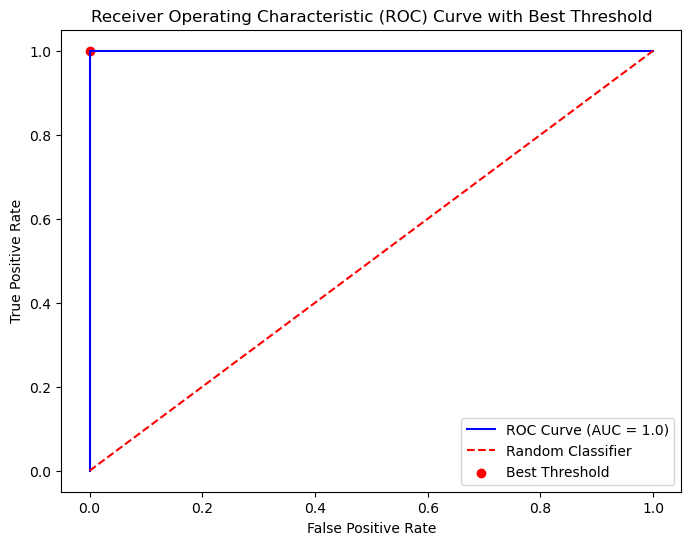

Best Threshold KNN: 0.6
Sensitivity (TPR) at Best Threshold KNN: 1.0
Specificity at Best Threshold KNN: 1.0
FPR at Best Threshold KNN: 0.0


In [188]:
# Find the best iteration based on ROC AUC
best_index_knn2 = np.argmax(roc_aucs_knn2)
best_fpr_knn2 = fprs_knn2[best_index_knn2]
best_tpr_knn2 = tprs_knn2[best_index_knn2]
best_thresholds_knn2 = thresholds_list_knn2[best_index_knn2]
best_roc_auc_knn2 = roc_aucs_knn2[best_index_knn2]

# Determine the best threshold using Youden's J statistic
J_knn2 = best_tpr_knn2 - best_fpr_knn2
best_threshold_index_knn2 = np.argmax(J_knn2)
best_threshold_knn2 = best_thresholds_knn2[best_threshold_index_knn2]

# Visualize confusion matrices and ROC curves for iterations with high accuracy
max_accuracy_knn2 = np.max(accuracy_scores_knn2)
high_accuracy_threshold_knn2 = max_accuracy_knn2 * 0.95  # Define high accuracy threshold as 95% of the maximum accuracy

for i, (cm, accuracy, fpr, tpr, roc_auc) in enumerate(zip(confusion_matrixes_knn2, accuracy_scores_knn2, fprs_knn2, tprs_knn2, roc_aucs_knn2)):
    if accuracy >= high_accuracy_threshold_knn2:
        # Plot confusion matrix
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - Iteration {i+1} (Accuracy: {accuracy})')
        plt.show()
        
        # Plot ROC curve
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - Iteration {i+1}')
        plt.legend()
        plt.show()

# Visualize confusion matrix and ROC curve for the best iteration
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrixes_knn2[best_index_knn2], annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Best Iteration (AUC: {best_roc_auc_knn2})')
plt.show()

# Plot ROC curve with the best threshold
plt.figure(figsize=(8,6))
plt.plot(best_fpr_knn2, best_tpr_knn2, color='blue', label=f'ROC Curve (AUC = {best_roc_auc_knn2})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.scatter(best_fpr_knn2[best_threshold_index_knn2], best_tpr_knn2[best_threshold_index_knn2], color='red', label='Best Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Best Threshold')
plt.legend(loc="lower right")
plt.show()

# Best threshold and related metrics
print("Best Threshold KNN:", best_threshold_knn2)
print("Sensitivity (TPR) at Best Threshold KNN:", best_tpr_knn2[best_threshold_index_knn2])
print("Specificity at Best Threshold KNN:", 1 - best_fpr_knn2[best_threshold_index_knn2])
print("FPR at Best Threshold KNN:", best_fpr_knn2[best_threshold_index_knn2])

# Perbandingan

In [191]:
result = pd.DataFrame({
    'Algorithm' : ['Random Forest with Repeated Stratification Hold Out', 'Random Forest with K Fold Cross Validation', 'Logistic Regression with Repeated Stratification Hold Out', 'Logistic Regression with K Fold Cross Validation','KNN with Repeated Stratification Hold Out', 'KNN with K Fold Cross Validation'],
    'Score' : [avg_accuracy_rf, avg_accuracy_rf2, avg_accuracy_lr, avg_accuracy_lr2, avg_accuracy_knn,avg_accuracy_knn2]})

result.sort_values(by='Score', ascending=False, inplace=True)

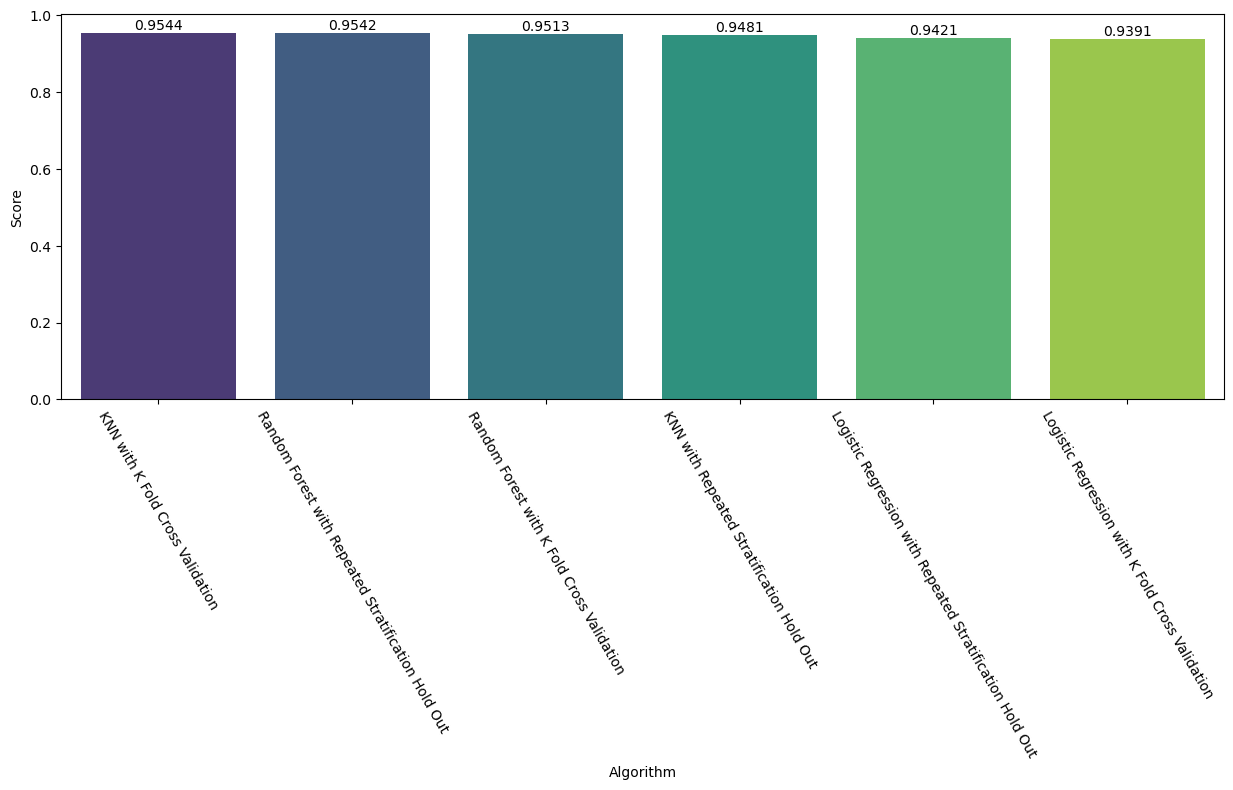

In [193]:
sns.set_palette("viridis")
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.4f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()